<img src="novaims.png" alt="Drawing" style="width: 200px;" align="left"/> 

### Data Science and Machine Learning 2021

#### Group 14:
André Lourenço m20201044@novaims.unl.pt <br>
Beatriz Crispim m20201835@novaims.unl.pt <br>
João Guerra m20201733@novaims.unl.pt <br>
Marcos Neves m20201781@novaims.unl.pt

# Table of Contents

* [0. Project Overview](#overview)
* [1. Import Data and Packages](#import)
* [2. Data Exploration](#exploration)
    * [2.1. Data Overview and Statistical Exploration](#stats)
    * [2.2. Visual Exploration](#visual)
    * [2.3. In-depth exploration](#depth)
* [3. Preprocessing Data](#preprocess)
    * [3.1. Data Cleaning](#clean)
        * [3.1.1. Missing Values](#missing)
        * [3.1.2. Outliers](#outliers)
    * [3.2. Data Transformation](#transform)
        * [3.2.1. Incoherences, Misclassifications, Binning and Reclassifications](#misc)
        * [3.2.2. Power Transform](#power)
* [4. Clustering](#clusters)                     
    * [4.1. Customer Value Perspective](#customer)
        * [4.1.1. RFM Analysis (Recency, Frequency and Monetary)](#rfm)
        * [4.1.2. Synthesizing RFM results](#resultsrfm)
        * [4.1.3. K-Means with two clusters](#kmeans1)
        * [4.1.4. Synthesizing K-Means results](#resultskmeans)
        * [4.1.5. PCA with K-Means](#pca)
        * [4.1.6. Synthesizing PCA results](#resultspca)
    * [4.2. Product Usage Perspective](#product)
        * [4.2.1. K-Means with three clusters](#kmeans2)
        * [4.2.2. K-Means with four clusters](#kmeans3)
        * [4.2.3. Synthesizing results](#results2)
    * [4.3. Channels Perspective](#channels)
        * [4.3.1. K-Means with three clusters](#kmeans4)
        * [4.3.2. K-Means with three clusters](#kmeans5)
        * [4.3.3. Synthesizing results](#results3)
* [5. Marketing Plan](#marketingplan)

# 0. Project Overview <a class="anchor" id="overview"></a>

The present project aims to identify the main customer segments within a company, in order to improve marketing activities, and ultimately campaign’s efficiency. For this, the data provided was analysed using different methodologies (K-Means, PCA and RFM anaysis), taking into consideration three essential perspectives: the customer value perspective, the product usage perspective and the channel perpective. The following steps were taken:

- Business Understanding
- Data Understanding
- Data Preparation
- Modeling
- Evaluation
- Deployment

# 1. Import Data and Packages <a class="anchor" id="import"></a>

__Step 1:__ Import the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set_style("darkgrid")
from datetime import date
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
import scipy.stats as stats
from scipy.spatial.distance import cdist

# remove warnings
import warnings
warnings.filterwarnings("ignore",category=plt.cbook.mplDeprecation)
warnings.filterwarnings("ignore",category=FutureWarning)

__Step 2:__ Import the excel file `firmographic.xlsx` and store it in the object `firmo`.

In [2]:
firmo = pd.read_csv('firmographic.csv')
firmo.head().T

0          1          2         3  \
Card_ID                     10003075   10003076   10003078  10003079   
Dt_Customer                11/3/2018  4/18/2019  7/22/2018  2/3/2018   
Recency                           66          6         10        26   
MntGroceries                     622       1014        639       806   
MntStationery                     70         15         88        56   
MntHouseKeeping                  678        643        185       350   
MntWellness_&_Beauty             NaN         74         64        54   
MntElectronics_&_Supplies         51         36         53        54   
MntLimitedEdition                 34         36        160       260   
NumDealsPurchases                  1          1          3         1   
NumWebPurchases                   12          9         13        15   
NumCatalogPurchases                7          4          5         9   
NumStorePurchases                 10          8         13        11   
NumWebVisitsMonth                  4          1          5         6   
AcceptedCmp1                       0          0          0         0   
AcceptedCmp2                       1          0          0         0   
AcceptedCmp3                       0          0          0         0   
AcceptedCmp4                       0          0          0         1   
AcceptedCmp5                       0          0          0         0   
Complain                           0          0          0         0   

                                    4  
Card_ID                      10003080  
Dt_Customer                10/31/2018  
Recency                            65  
MntGroceries                       32  
MntStationery                       1  
MntHouseKeeping                    29  
MntWellness_&_Beauty                2  
MntElectronics_&_Supplies           0  
MntLimitedEdition                  20  
NumDealsPurchases                   5  
NumWebPurchases                     9  
NumCatalogPurchases                 3  
NumStorePurchases                   3  
NumWebVisitsMonth                   9  
AcceptedCmp1                        1  
AcceptedCmp2                        0  
AcceptedCmp3                        0  
AcceptedCmp4                        0  
AcceptedCmp5                        0  
Complain                            0

__Step 3:__ Import the excel file `demographic.xlsx` and store it in the object `demo`.

In [3]:
demo = pd.read_excel('demographic.xlsx')
demo.head().T

0                     1                   2  \
Card_ID                10003075              10003076            10003078   
Name            Mr. Adam Glover  Mr. Cameron McDonald  Mr. Keith Davidson   
Year_Birth                 1981                  1993                1982   
Education                Master                   PhD                 PhD   
Marital_Status         Together                Single              Single   
Income                    90782                113023               93571   
Kidhome                       0                     0                   0   
Teenhome                      0                     0                   1   
Region                     Cork               Kinsale                Cork   
Country                 Ireland               Ireland             Ireland   

                                 3               4  
Card_ID                   10003079        10003080  
Name            Mr. Alexander Gill  Mr. Neil Piper  
Year_Birth                    1978            1968  
Education                      PhD             PhD  
Marital_Status              Single         Married  
Income                       91852           22386  
Kidhome                          0               1  
Teenhome                         1               1  
Region                     Kinsale            Cork  
Country                    Ireland         Ireland

__Step 4:__ Merge the data from the two datasets on the variable Card_ID, which is unique to each customer, and store it in the object `df`.

__Step 5:__ Define Cust_ID as the index of the dataframe using the method `set_index()`.

In [4]:
df = demo.merge(firmo, on = 'Card_ID' )
df.set_index('Card_ID', inplace = True)
df.head().T

Card_ID                           10003075              10003076  \
Name                       Mr. Adam Glover  Mr. Cameron McDonald   
Year_Birth                            1981                  1993   
Education                           Master                   PhD   
Marital_Status                    Together                Single   
Income                               90782                113023   
Kidhome                                  0                     0   
Teenhome                                 0                     0   
Region                                Cork               Kinsale   
Country                            Ireland               Ireland   
Dt_Customer                      11/3/2018             4/18/2019   
Recency                                 66                     6   
MntGroceries                           622                  1014   
MntStationery                           70                    15   
MntHouseKeeping                        678                   643   
MntWellness_&_Beauty                   NaN                    74   
MntElectronics_&_Supplies               51                    36   
MntLimitedEdition                       34                    36   
NumDealsPurchases                        1                     1   
NumWebPurchases                         12                     9   
NumCatalogPurchases                      7                     4   
NumStorePurchases                       10                     8   
NumWebVisitsMonth                        4                     1   
AcceptedCmp1                             0                     0   
AcceptedCmp2                             1                     0   
AcceptedCmp3                             0                     0   
AcceptedCmp4                             0                     0   
AcceptedCmp5                             0                     0   
Complain                                 0                     0   

Card_ID                              10003078            10003079  \
Name                       Mr. Keith Davidson  Mr. Alexander Gill   
Year_Birth                               1982                1978   
Education                                 PhD                 PhD   
Marital_Status                         Single              Single   
Income                                  93571               91852   
Kidhome                                     0                   0   
Teenhome                                    1                   1   
Region                                   Cork             Kinsale   
Country                               Ireland             Ireland   
Dt_Customer                         7/22/2018            2/3/2018   
Recency                                    10                  26   
MntGroceries                              639                 806   
MntStationery                              88                  56   
MntHouseKeeping                           185                 350   
MntWellness_&_Beauty                       64                  54   
MntElectronics_&_Supplies                  53                  54   
MntLimitedEdition                         160                 260   
NumDealsPurchases                           3                   1   
NumWebPurchases                            13                  15   
NumCatalogPurchases                         5                   9   
NumStorePurchases                          13                  11   
NumWebVisitsMonth                           5                   6   
AcceptedCmp1                                0                   0   
AcceptedCmp2                                0                   0   
AcceptedCmp3                                0                   0   
AcceptedCmp4                                0                   1   
AcceptedCmp5                                0                   0   
Complain                                    0                   0   

Card_ID                  

__Step 6:__ 
- Check if there are any duplicate entries.
- There are 5 duplicated entries in the merged dataset.
- Drop the duplicate rows with the method `drop_duplicates()`.

In [5]:
df[df.duplicated()]

Name  Year_Birth   Education Marital_Status  \
Card_ID                                                                    
10013025        Mr. Andrew Mackay        1963  Graduation         Single   
10013026         Mr. Steven Blake        1984  Graduation        Married   
10013028        Miss Ruth Jackson        1973         PhD        Married   
10013029  Mrs. Gabrielle Lawrence        1978         PhD       Divorced   
10013030       Mrs. Yvonne Slater        1979  Graduation       Together   

            Income  Kidhome  Teenhome     Region  Country Dt_Customer  ...  \
Card_ID                                                                ...   
10013025   51062.0        0         1  Killarney  Ireland    9/7/2018  ...   
10013026   47363.0        1         0    Kinsale  Ireland   10/4/2018  ...   
10013028   79525.0        0         1  Killarney  Ireland   7/16/2018  ...   
10013029  122087.0        0         0    Kinsale  Ireland    7/6/2018  ...   
10013030   61469.0        1         1  Killarney  Ireland   3/11/2019  ...   

          NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
Card_ID                                                             
10013025                7                    2                  4   
10013026                9                    2                  3   
10013028               15                    5                  6   
10013029               11                   11                 11   
10013030                7                    2                  2   

          NumWebVisitsMonth  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  \
Card_ID                                                                 
10013025                  5             0             0             0   
10013026                  7             0             0             0   
10013028                  6             1             0             0   
10013029                  2             0             0             1   
10013030                  7             0             0             0   

          AcceptedCmp4  AcceptedCmp5  Complain  
Card_ID                                         
10013025             0             0         0  
10013026             0             0         0  
10013028             0             0         0  
10013029             0             0         0  
10013030             0             0         0  

[5 rows x 28 columns]

In [6]:
df.drop_duplicates(inplace = True)

In [7]:
cols = df.columns

# 2. Data Exploration <a class="anchor" id="exploration"></a>

## 2.1. Data Overview and Statistical Exploration <a class="anchor" id="stats"></a>

__Step 1:__ Get more information on the dataset by calling `info()`.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 10003075 to 10013073
Data columns (total 28 columns):
Name                         4999 non-null object
Year_Birth                   5000 non-null int64
Education                    5000 non-null object
Marital_Status               5000 non-null object
Income                       4948 non-null float64
Kidhome                      5000 non-null int64
Teenhome                     5000 non-null int64
Region                       5000 non-null object
Country                      5000 non-null object
Dt_Customer                  5000 non-null object
Recency                      5000 non-null int64
MntGroceries                 5000 non-null float64
MntStationery                5000 non-null float64
MntHouseKeeping              4907 non-null float64
MntWellness_&_Beauty         4935 non-null float64
MntElectronics_&_Supplies    5000 non-null float64
MntLimitedEdition            5000 non-null float64
NumDealsPurchases            

__Step 2:__ Check the variables that have missing values.

In [9]:
df.isna().sum()

Name                          1
Year_Birth                    0
Education                     0
Marital_Status                0
Income                       52
Kidhome                       0
Teenhome                      0
Region                        0
Country                       0
Dt_Customer                   0
Recency                       0
MntGroceries                  0
MntStationery                 0
MntHouseKeeping              93
MntWellness_&_Beauty         65
MntElectronics_&_Supplies     0
MntLimitedEdition             0
NumDealsPurchases             0
NumWebPurchases               0
NumCatalogPurchases           0
NumStorePurchases             0
NumWebVisitsMonth             0
AcceptedCmp1                  0
AcceptedCmp2                  0
AcceptedCmp3                  0
AcceptedCmp4                  0
AcceptedCmp5                  0
Complain                      0
dtype: int64

#### First thoughts
- There is a Nan __Name__ variable for one of the entries. We should check this one in detail. 
- 3 Numerical Variables, __Income, MntHouseKeeping, MntWellness & Beauty__ , respectively 52, 93, 65, have a few missing values, we can look at them closer on how to fill the missing values later in this Notebook. It can be either filled with the median or other statistical parameter
- 6 __Non-Numerical__ Variables in the dataset
- 22 __Numerical Vairables__ in the dataset (Excluding the customer ID which was turned into the Index of the Dataset)

In [10]:
df.describe().T

count          mean           std     min  \
Year_Birth                 5000.0   1973.806600     11.870138  1946.0   
Income                     4948.0  69614.564198  28953.396355  2195.8   
Kidhome                    5000.0      0.440600      0.538265     0.0   
Teenhome                   5000.0      0.493600      0.546643    -1.0   
Recency                    5000.0     49.576400     29.000593     0.0   
MntGroceries               5000.0    363.336740    400.096463     0.0   
MntStationery              5000.0     27.041220     40.069024     0.0   
MntHouseKeeping            4907.0    185.105910    240.357283     0.0   
MntWellness_&_Beauty       4935.0     32.237285     47.312292     0.0   
MntElectronics_&_Supplies  5000.0     35.049700     54.325949     0.0   
MntLimitedEdition          5000.0     55.765500     69.240596     0.0   
NumDealsPurchases          5000.0      2.258800      1.812313     0.0   
NumWebPurchases            5000.0     10.244800      5.347990     1.0   
NumCatalogPurchases        5000.0      4.546400      2.802395     0.0   
NumStorePurchases          5000.0      5.730800      3.275191     0.0   
NumWebVisitsMonth          5000.0      5.278600      3.148677     0.0   
AcceptedCmp1               5000.0      0.080200      0.271630     0.0   
AcceptedCmp2               5000.0      0.068600      0.252798     0.0   
AcceptedCmp3               5000.0      0.077800      0.267883     0.0   
AcceptedCmp4               5000.0      0.064200      0.245133     0.0   
AcceptedCmp5               5000.0      0.011400      0.106171     0.0   
Complain                   5000.0      0.012400      0.110674     0.0   

                               25%      50%       75%        max  
Year_Birth                  1964.0   1975.0   1983.00    2002.00  
Income                     47075.5  69427.0  92119.75  187314.45  
Kidhome                        0.0      0.0      1.00       2.00  
Teenhome                       0.0      0.0      1.00       2.00  
Recency                       25.0     49.0     75.00      99.00  
MntGroceries                  30.0    209.0    605.25    1799.00  
MntStationery                  2.0      9.0     34.00     199.00  
MntHouseKeeping               18.0     73.0    256.50    1093.00  
MntWellness_&_Beauty           3.0     11.0     41.00     239.00  
MntElectronics_&_Supplies      3.0     11.0     42.00     315.00  
MntLimitedEdition             11.0     30.0     71.00     424.00  
NumDealsPurchases              1.0      2.0      3.00      15.00  
NumWebPurchases                8.0     10.0     12.00     231.00  
NumCatalogPurchases            2.0      4.0      6.00      13.00  
NumStorePurchases              3.0      5.0      8.00      13.00  
NumWebVisitsMonth              3.0      6.0      7.00     137.00  
AcceptedCmp1                   0.0      0.0      0.00       1.00  
AcceptedCmp2                   0.0      0.0      0.00       1.00  
AcceptedCmp3                   0.0      0.0      0.00       1.00  
AcceptedCmp4                   0.0      0.0      0.00       1.00  
AcceptedCmp5                   0.0      0.0      0.00       1.00  
Complain                       0.0      0.0      0.00       1.00

A few thoughts about the result ------
- `Income` there is a wide range on the yearly salary of the customers
- `5 Campaings` variables are binary so we should not treat them as numeric. Less than 25% of the customers accepted the at least one of the 5 last campaings. Plot campaign acceptance against ....
- `Kidhome & Teenhome` 25% of the customers as at least one dependent
- `Recency` 50% of the customers take 50 days to come back for a new purchase
- Customers spend most on __Grocerie items__
- Customers spend least on __Stationery items__
- Number of __web purchases__ is __twice as the `catalog` and `store pruchases`__
- Plot NumWebPurchases with NumWebVisitsMonth

In [11]:
df.skew()

Year_Birth                   -0.104376
Income                        0.074944
Kidhome                       0.653025
Teenhome                      0.429628
Recency                      -0.008955
MntGroceries                  1.163000
MntStationery                 2.073507
MntHouseKeeping               1.662145
MntWellness_&_Beauty          2.081755
MntElectronics_&_Supplies     2.392493
MntLimitedEdition             2.313686
NumDealsPurchases             1.881128
NumWebPurchases              22.185112
NumCatalogPurchases           1.083225
NumStorePurchases             0.665959
NumWebVisitsMonth            14.689330
AcceptedCmp1                  3.092209
AcceptedCmp2                  3.414368
AcceptedCmp3                  3.153379
AcceptedCmp4                  3.557038
AcceptedCmp5                  9.207698
Complain                      8.815006
dtype: float64

Moderate skewness (between |0.5| and |1.0|):
High skewness (higher than |1.0|)

__MntStationery, MntHouseKeeping, MntWellness&Beauty,MntElectronicsSupplies, MntLimitedEdition,  NumWebPurchases, NumWebVisitsMonth__ variables with high skewness. We should check their distribution visually first, before consider a transformation of the variable.

In [12]:
df.kurt()

Year_Birth                    -0.830261
Income                        -0.556396
Kidhome                       -0.752638
Teenhome                      -0.913354
Recency                       -1.201001
MntGroceries                   0.570844
MntStationery                  3.976999
MntHouseKeeping                2.004285
MntWellness_&_Beauty           4.042067
MntElectronics_&_Supplies      6.106466
MntLimitedEdition              6.498925
NumDealsPurchases              4.731187
NumWebPurchases              796.641075
NumCatalogPurchases            0.543071
NumStorePurchases             -0.652685
NumWebVisitsMonth            611.872912
AcceptedCmp1                   7.564783
AcceptedCmp2                   9.661771
AcceptedCmp3                   7.946978
AcceptedCmp4                  10.656782
AcceptedCmp5                  82.814821
Complain                      75.734630
dtype: float64

High kurtosis in a data set is an indicator that data has heavy tails or outliers. A standard normal distribution has a kurtosis of 3, so values higher than that could indicate presence of outliers. We need to check further this variable about the presence of possible outliers.

__NumWebPurchases, MntStationery, MntWellness&Beauty, MntElectronics&Supplies
MntLimitedEdition, NumWebVisitsMonth__ variables with high kurtosis. We should check their distribution visually first, before consider removing any outliers.

In [13]:
df.describe(include = ['O'])

Name Education Marital_Status   Region  Country  \
count                   4999      5000           5000     5000     5000   
unique                  4999        11              5        3        3   
top     Mr. Sebastian Arnold       PhD        Married  Kinsale  Ireland   
freq                       1      2662           2108     1695     4994   

       Dt_Customer  
count         5000  
unique         700  
top      6/24/2018  
freq            18

- The dataset is from 3 regions in Ireland and there are 3 countries, the variable needs to be inspected
- 11 unique education levels seems strange, inspection is necessary to check unique values 
- There are 4999 Name entries, with one NaN. Individual inspection of this NaN to understand if it is a entry mistake
- Almost 50% of the customers on the sample dataset are Married
- 18 cusotmers registered on the same day
- There are 5 marital status

In [14]:
df.Country.value_counts()

Ireland    4994
UK            4
France        2
Name: Country, dtype: int64

- `Country` there are 4 entries with the Country UK, this not make sense since the cities are in Ireland and Ireland is not part of the UK, this needs to be changed. The same happens for 2 data entries were the Country is stated as France but the regions are in Ireland. We should reconsider change the country Variable here to __Ireland__

In [15]:
df.Education.value_counts()

PhD           2662
Graduation    1386
Master         857
2n Cycle        39
GRADUATION      22
PHD             15
MASTER           9
MATSER           4
graduation       3
phd              2
2N CYCLE         1
Name: Education, dtype: int64

- `Education` entries need to be grouped since there are repetitions due to the use of Capital letters. We can later arrange this properly. 

In [16]:
df.Marital_Status.value_counts()

Married     2108
Together    1257
Single      1052
Divorced     437
Widow        146
Name: Marital_Status, dtype: int64

- `Marital Status` looks ok. We should discuss if we use together as married or as people who are together but not married

##  2.2. Visual Exploration <a class="anchor" id="visual"></a>

In [17]:
df_corr = df.corr(method = 'spearman')
figure = plt.figure(figsize=(16,10))
sns.heatmap(df_corr, annot=True, fmt = '.1g')

<AxesSubplot:>

- This will be looked at later when variables are tansformed
- Looking at the correlation matrix there are no strong correlation between variables. 
- However, __NumCatalogPurchases vs. MntHouseKeeping__ as a 0.9 coefficient.

## 2.3. In-depth exploration <a class="anchor" id="depth"></a>

# 3. Preprocessing Data <a class="anchor" id="preprocess"></a>

## 3.1. Data Cleaning <a class="anchor" id="clean"></a>

### 3.1.1. Missing Values <a class="anchor" id="missing"></a>

#### Fill the Nan's
Fill missing values of the numerical variables with the respective median

In [18]:
# This cell fills the missing values in the dataset

df.fillna({
    'Income': df.Income.median(),
    'MntHouseKeeping': df.MntHouseKeeping.median(),
    'MntWellness_&_Beauty':df['MntWellness_&_Beauty'].median()
    }, inplace = True)
df.isna().sum()/len(df)

Name                         0.0002
Year_Birth                   0.0000
Education                    0.0000
Marital_Status               0.0000
Income                       0.0000
Kidhome                      0.0000
Teenhome                     0.0000
Region                       0.0000
Country                      0.0000
Dt_Customer                  0.0000
Recency                      0.0000
MntGroceries                 0.0000
MntStationery                0.0000
MntHouseKeeping              0.0000
MntWellness_&_Beauty         0.0000
MntElectronics_&_Supplies    0.0000
MntLimitedEdition            0.0000
NumDealsPurchases            0.0000
NumWebPurchases              0.0000
NumCatalogPurchases          0.0000
NumStorePurchases            0.0000
NumWebVisitsMonth            0.0000
AcceptedCmp1                 0.0000
AcceptedCmp2                 0.0000
AcceptedCmp3                 0.0000
AcceptedCmp4                 0.0000
AcceptedCmp5                 0.0000
Complain                    

### 3.1.2. Outliers <a class="anchor" id="outliers"></a>

From the skweness and kurtosis analysis it is observed that the variables __NumWebPurchases, MntStationery, MntWellness&Beauty, MntElectronics&Supplies MntLimitedEdition, NumWebVisitsMonth__ variables present high kurtosis. The outliers can be observed in the following boxplots

In [19]:
fig, axes = plt.subplots(6,1, figsize = (14,25))
sns.boxplot(ax = axes[0], data = df, x = 'MntStationery')
sns.boxplot(ax = axes[1], data = df, x = 'MntWellness_&_Beauty')
sns.boxplot(ax = axes[2], data = df, x = 'MntElectronics_&_Supplies')
sns.boxplot(ax = axes[3], data = df, x = 'MntLimitedEdition')
sns.boxplot(ax = axes[4], data = df, x = 'NumWebPurchases')
sns.boxplot(ax = axes[5], data = df, x = 'NumWebVisitsMonth')

<AxesSubplot:xlabel='NumWebVisitsMonth'>

In [20]:
fig, axes = plt.subplots(6,1, figsize = (14,25))
sns.histplot(ax = axes[0], data = df, x = 'MntStationery', bins = 20)
sns.histplot(ax = axes[1], data = df, x = 'MntWellness_&_Beauty', bins = 20)
sns.histplot(ax = axes[2], data = df, x = 'MntElectronics_&_Supplies', bins = 20)
sns.histplot(ax = axes[3], data = df, x = 'MntLimitedEdition', bins = 20)
sns.histplot(ax = axes[4], data = df, x = 'NumWebPurchases', bins = 20)
sns.histplot(ax = axes[5], data = df, x = 'NumWebVisitsMonth', bins = 20)

<AxesSubplot:xlabel='NumWebVisitsMonth', ylabel='Count'>

Whne looking at the boxplots and histplotsthe following is concluded:

 - Althouhgt with a high kurtosis, no values will  be removed from MntStationery and MntWellness&Beauty;
 - MntElectronics&Supplies and MntLimitedEdition present a high kurtosis and some values are quite of the distribution. Nevertheless, after data transformation this will be looked at again, if the outliers remain there or not;
 - NumWebPurchases as 3 points which are way off the rest of the data, above 110. They can be removed.
 - NumWebVisitsMonth as 1 point which are way off the rest of the data, at about 120.

In [21]:
df[df.NumWebPurchases > 20 ].count() 

Name                         52
Year_Birth                   52
Education                    52
Marital_Status               52
Income                       52
Kidhome                      52
Teenhome                     52
Region                       52
Country                      52
Dt_Customer                  52
Recency                      52
MntGroceries                 52
MntStationery                52
MntHouseKeeping              52
MntWellness_&_Beauty         52
MntElectronics_&_Supplies    52
MntLimitedEdition            52
NumDealsPurchases            52
NumWebPurchases              52
NumCatalogPurchases          52
NumStorePurchases            52
NumWebVisitsMonth            52
AcceptedCmp1                 52
AcceptedCmp2                 52
AcceptedCmp3                 52
AcceptedCmp4                 52
AcceptedCmp5                 52
Complain                     52
dtype: int64

In [22]:
df[(df.NumWebPurchases > 20) | (df.NumStorePurchases <= 1) | (df.NumCatalogPurchases <= 1)].count()[0]

126

In [23]:
# Remove outliers
df = df.drop(df[(df['NumWebPurchases'] > 110) | (df['NumWebVisitsMonth'] > 120)].index)
df = df[(df.NumWebPurchases < 20) & (df.NumStorePurchases > 1) & (df.NumCatalogPurchases > 1)]

# Total number of purchases
df['Freq'] = df.loc[:,'NumDealsPurchases':'NumStorePurchases'].sum(axis=1)

# Calculate the ratio for each channel
#df['NumWebPurchases'] = df.NumWebPurchases/(df.NumWebPurchases+df.NumCatalogPurchases+df.NumStorePurchases)
#df['NumCatalogPurchases'] = df.NumCatalogPurchases/(df.NumWebPurchases+df.NumCatalogPurchases+df.NumStorePurchases)
#df['NumStorePurchases'] = df.NumStorePurchases/(df.NumWebPurchases+df.NumCatalogPurchases+df.NumStorePurchases)

- The groups which most visit the web (>10 visits Month) do not buy much from either channel. They count for 43 customers; 
- Similarly there is a group of customers who visit most frequently the web (>20 times a month), and their purchase is low (0 or 1 for all channels), these are 48 customers;
- There is also a group of customers who buy 0 and 1 products from the store and catalog. These are decided to be removed for the cluster analysis
- In total counting as 121 costumer/observations, will be excluded for the clustering as this may interfer with it, and they represent a niche in our analysis 

## 3.2. Data Transformation <a class="anchor" id="transform"></a>

### 3.2.1. Incoherences, Misclassifications, Binning and Reclassifications <a class="anchor" id="misc"></a>

##### Year_birth
This is transformed to age

In [24]:
df['Age'] = date.today().year - df['Year_Birth']

In [25]:
df.Age.describe().T

count    4874.000000
mean       47.193270
std        11.831413
min        19.000000
25%        38.000000
50%        46.000000
75%        56.000000
max        75.000000
Name: Age, dtype: float64

In [26]:
sns.violinplot(y=df['Age'])
plt.title('Ages Frequency')

Text(0.5, 1.0, 'Ages Frequency')

We can observe that the ages vary between 20 and 75 years old.
Ages group between 30 and 50 outweighs every other age group.

Definir melhor os patamares!

In [27]:
Age_20_30 = df.Age[(df.Age >= 20) & (df.Age <= 30)]
Age_31_50 = df.Age[(df.Age >= 31) & (df.Age <= 50)]
Age_51_60 = df.Age[(df.Age >= 51) & (df.Age <= 60)]
Age_61plus = df.Age[df.Age >= 61]

x = ['20-30','31-50','51-60','61+']
y = [len(Age_20_30.values),len(Age_31_50.values),len(Age_51_60.values),len(Age_61plus.values)]

sns.barplot(x=x, y=y)
plt.title('Number of customers per Age')

Text(0.5, 1.0, 'Number of customers per Age')

##### Income

In [28]:
df.Income.describe().T

count      4874.000000
mean      69490.995486
std       27275.394159
min       10000.000000
25%       47718.000000
50%       69427.000000
75%       91219.250000
max      136213.000000
Name: Income, dtype: float64

In [29]:
sns.violinplot(y=df['Income'])
plt.title('Income Frequency')

Text(0.5, 1.0, 'Income Frequency')

We can also add a bar plot to visualize the number of customers based on their annual income.
Incomes between represent the majority of customers.

Definir melhor os patamares!

In [30]:
Age_2500_5000 = df.Age[(df.Age >= 20) & (df.Age <= 30)]
Age_5001_10000 = df.Age[(df.Age >= 31) & (df.Age <= 40)]
Age_10001_15000 = df.Age[(df.Age >= 41) & (df.Age <= 50)]
Age_15001plus = df.Age[df.Age >= 61]

x = ['2500-5000','5001-10000','10001-15000','15001+']
y = [len(Age_2500_5000.values),len(Age_5001_10000.values),len(Age_10001_15000.values),len(Age_15001plus.values)]

sns.barplot(x=x, y=y)
plt.title('Number of customers per Income')

Text(0.5, 1.0, 'Number of customers per Income')

##### Seniority
How long are the customers with the store

In [31]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Seniority'] = (df['Dt_Customer'].max() - df['Dt_Customer']).dt.days+1

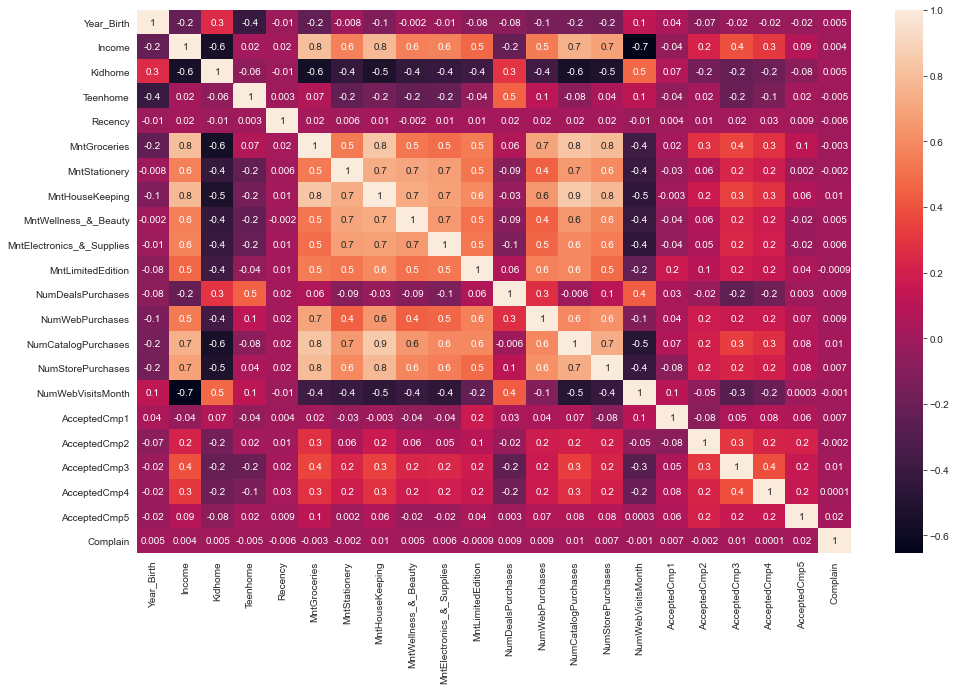

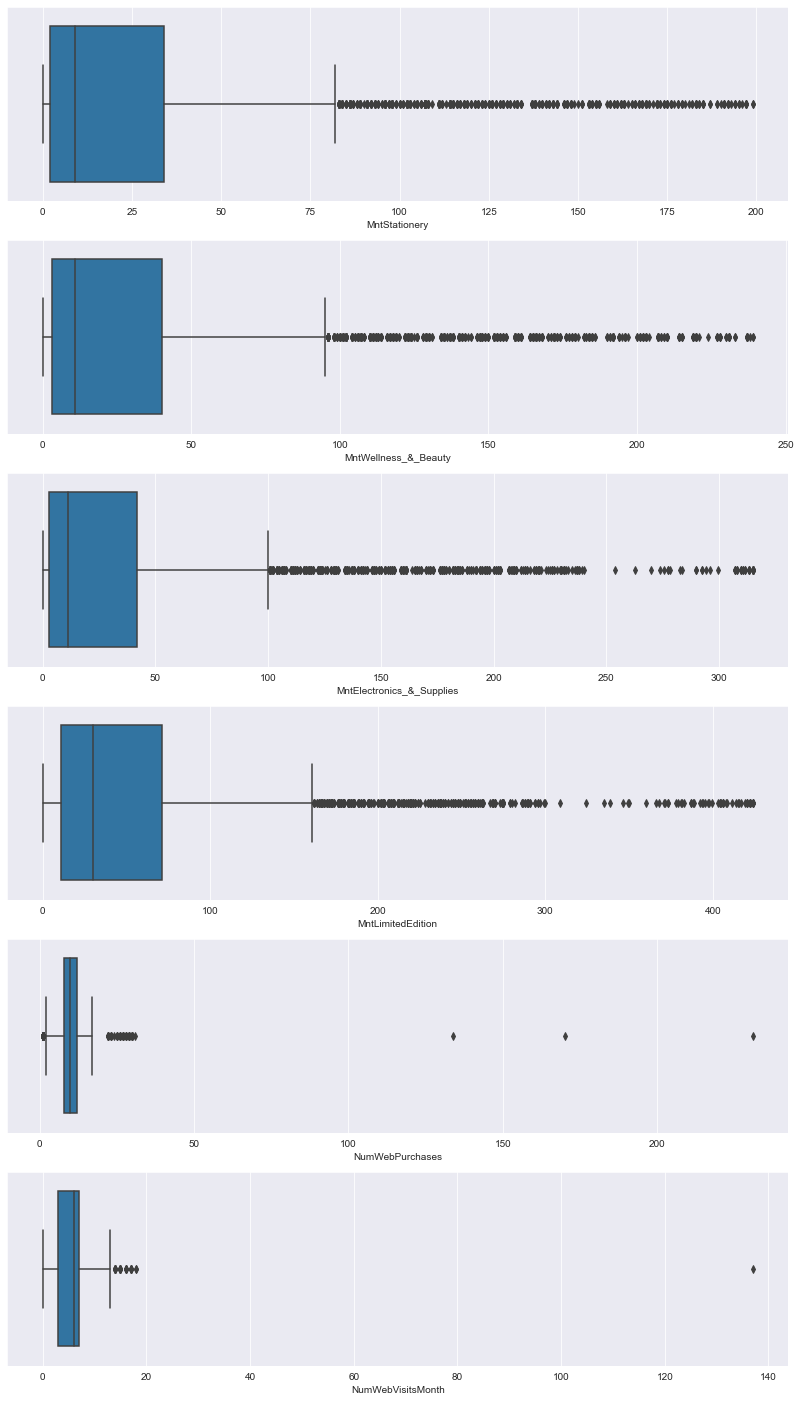

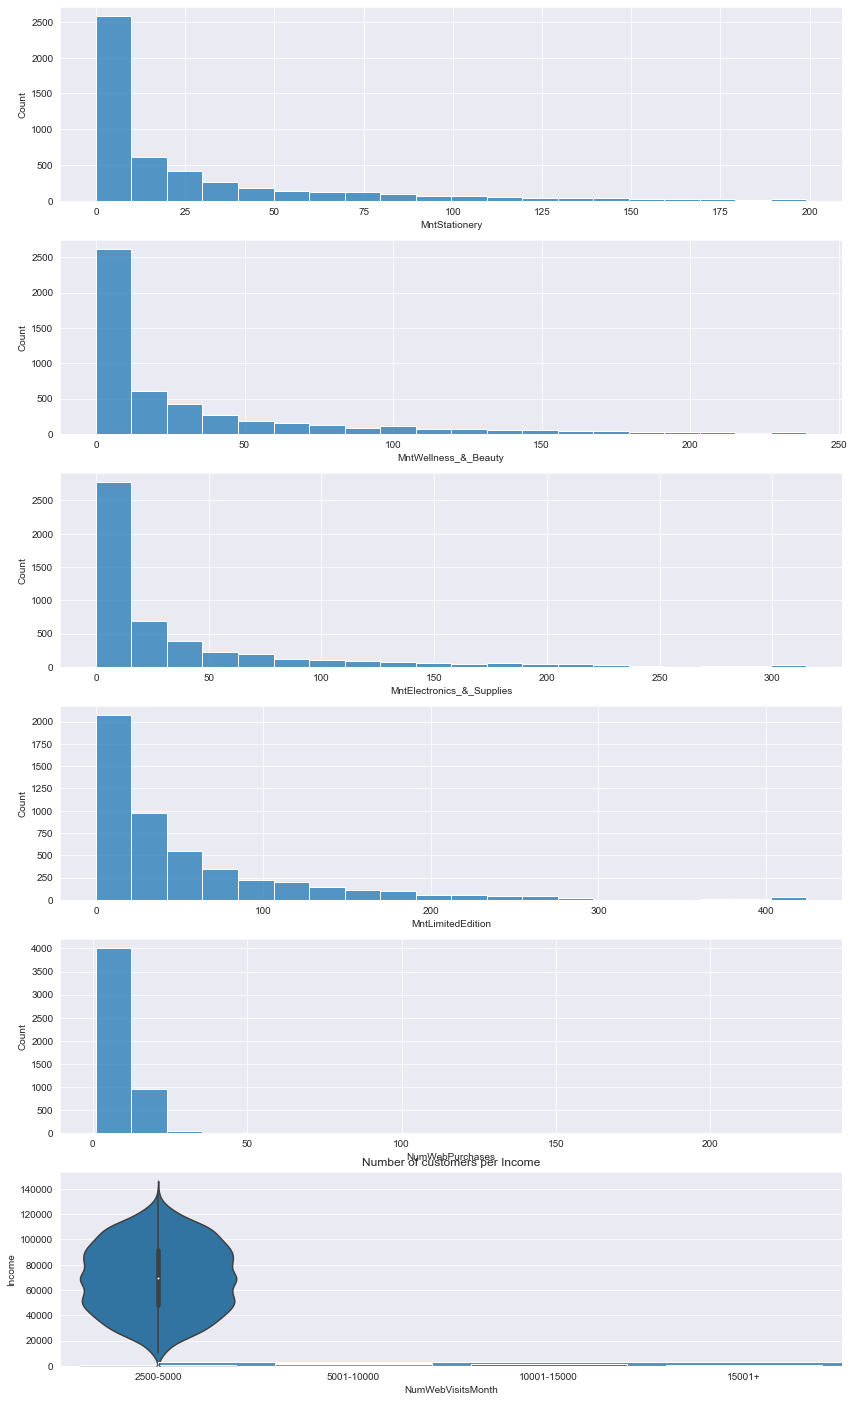

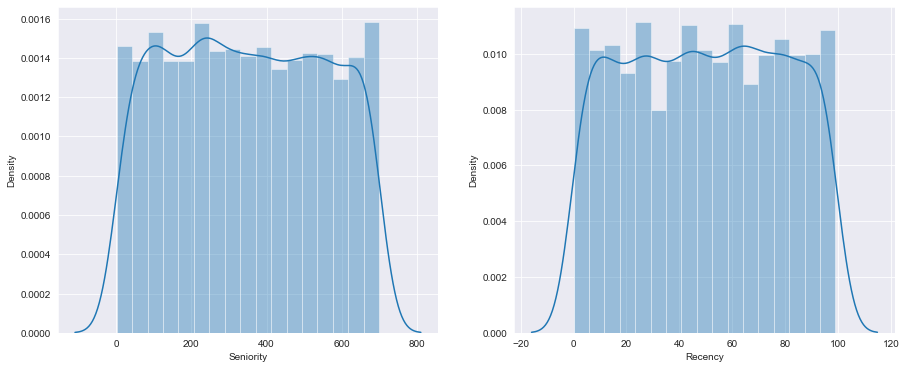

In [32]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df['Seniority'])
plt.subplot(1,2,2)
sns.distplot(df['Recency'])
plt.show()

##### Mnt Ratios
Calculate the ratio ammount spend on each category. The variables of the Mnt will now contain ratios of Mnt by category for each customer

In [33]:
df['Total_Mnt'] = df.loc[:,'MntGroceries':'MntLimitedEdition'].sum(axis=1)

In [34]:
categories = ['MntGroceries', 'MntStationery','MntHouseKeeping', 
              'MntWellness_&_Beauty', 'MntElectronics_&_Supplies',
               'MntLimitedEdition']


def print_correlations(x, y):
    fig, axes = plt.subplots(3, 2, sharex=True, figsize=(12,18))
    row = 0
    col = 0
    for cat in categories:
        g = sns.scatterplot(ax=axes[row, col], x="Income", y=cat, data=df);
        #g._legend.remove()

        if col % 2:
            row += 1
            col = 0
        else:
            col += 1

print_correlations(0, 0)

In [35]:
df[df['Income'] ==0]["Income"].value_counts()

Series([], Name: Income, dtype: int64)

In [36]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Total_Mnt"])
plt.subplot(1,2,2)
sns.boxplot(y=df["Income"])

<AxesSubplot:ylabel='Income'>

The range of total amount spent is less than the annual income range.

colcocar graf ratio of spending per Age?
<p>escolher gráficos do marcos

##### Purchase Channels

In [37]:
df_channels = df[['NumWebPurchases',
    'NumCatalogPurchases','NumStorePurchases']].copy()

sns.pairplot(df_channels,corner = True)

In [38]:
figure = plt.figure(figsize=(12,8))
ax = plt.subplot(111)

line1 = sns.kdeplot(df.NumWebPurchases/df['Freq']*100, label='Web Purchases')
line2 = sns.kdeplot(df.NumCatalogPurchases/df['Freq']*100, label='Catalog Purchases')
line3 = sns.kdeplot(df.NumStorePurchases/df['Freq']*100, label='Store Purchases')

plt.xlim(0,None)
plt.title('Which channel type is mostly used by the customers', fontsize= 16, color = 'blue')
# define the legend using matplotlib.pyplot.legend
#plt.legend(loc = 'upper left', title = 'Recomendation')
# define the label for x axis using matplotlib.pyplot.xlabel
plt.xlabel("Percentage of items bought per channel (%)")

plt.legend()

The above illustration clarifies the difference between the 3 possible channels to buy products. 

The clients who buy more on the web are buy less trought the catalog and the store
There is no exclusivity between the Web channel and the other options to buy the products.
All channels are relevant => 1/2 = web ; 1/4 = store; 1/4 = catalog

In [39]:
df['Campaign Acceptance'] = df.loc[:,'AcceptedCmp1':'AcceptedCmp5'].sum(axis = 1)/5

#### Education
 - Correct miss spellings and all to lower case. 
 - The number with 2nd Cycle customers is 40 (<1%). These are either kept or removed

In [40]:
# Educations are in upper case letters or there is a miss spelling in Master
# All variables are set to low case

df['Education'] = df['Education'].str.lower().replace('matser','master')

sns.countplot(y = 'Education', hue = 'Region', data = df,
          order = ['phd','master','graduation'])

print(df.Education.value_counts())

# Remove 2n cycle
df = df[df['Education'] != '2n cycle']

phd           2610
graduation    1374
master         851
2n cycle        39
Name: Education, dtype: int64


In [41]:
sns.stripplot(x = 'Income', y = 'Education', data = df)

<AxesSubplot:title={'center':'Which channel type is mostly used by the customers'}, xlabel='Income', ylabel='Education'>

#### Marital Status
Solve Teenhome incoherence and transform variables, Marital Status, Teenhome, and Kidhome, into a single variable containing the total number of family members  / households

In [42]:
# Number of family members is created from the 3 variables 
# Marital Status, Teenhome, and Kidhome, by summing them all together

# treat incoherence in Teenhome = -1 this is not possible
df.Teenhome.replace(-1, 0,inplace = True)

df['Marital_Status'] = df['Marital_Status'].replace('Together','Married')

df["Num_family"] = np.where(
    (df["Marital_Status"] == "Married"),2,1) + df["Kidhome"] + df["Teenhome"]


In [43]:
sns.countplot(y = 'Marital_Status', hue = 'Region', data = df,
             order = ['Single','Divorced','Widow','Married'])

<AxesSubplot:title={'center':'Which channel type is mostly used by the customers'}, xlabel='count', ylabel='Marital_Status'>

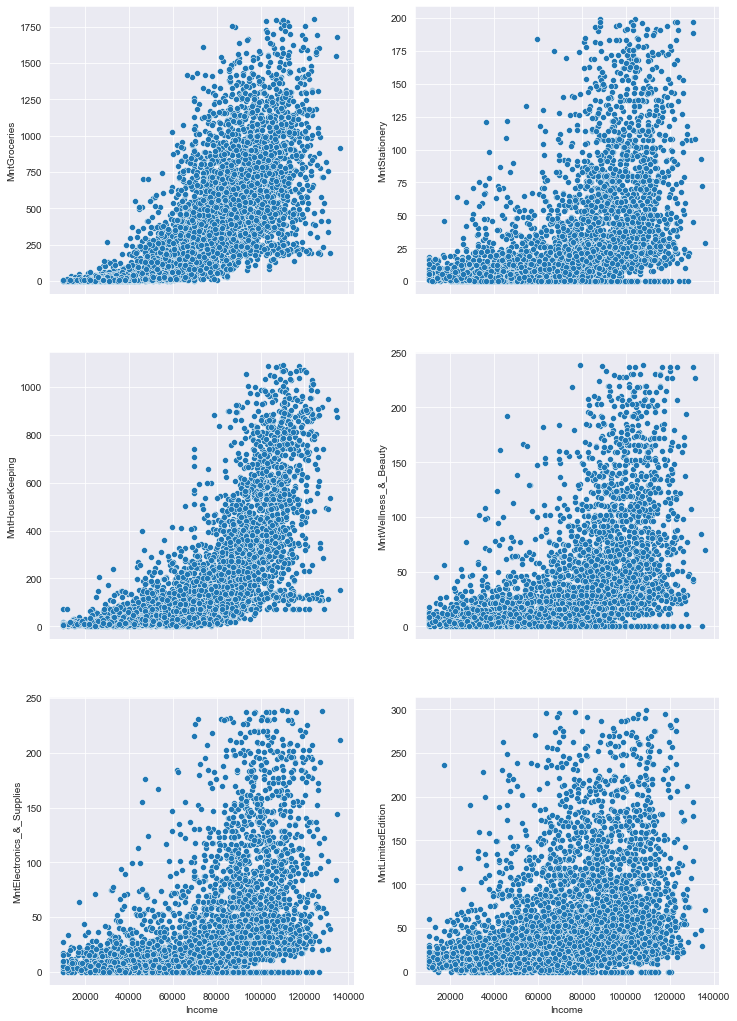

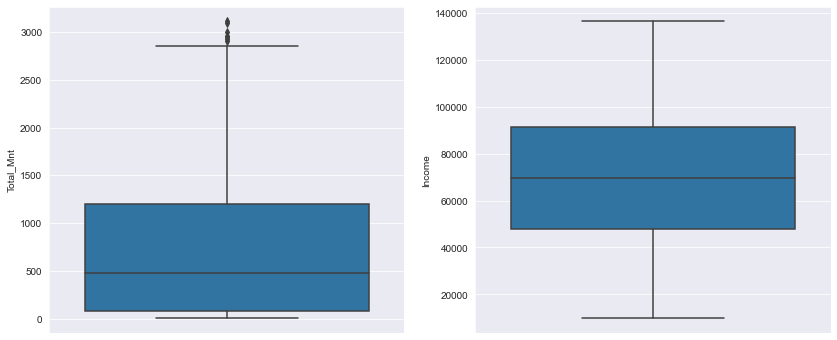

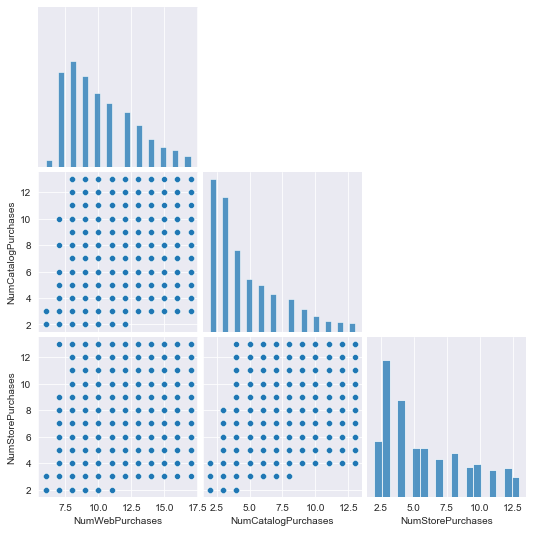

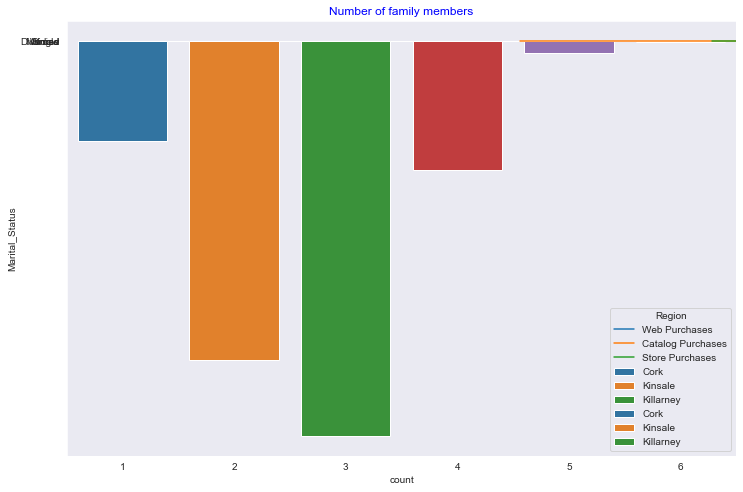

In [44]:
sns.barplot(x=df.Num_family.value_counts().index, y=df.Num_family.value_counts().values)
plt.title("Number of family members")
plt.show()

#### Gender
A new variable is create from the "Name" column

In [45]:
## Gender Variable creation
# A extra variable is created by using the Mr. or Mrs from the variable Name

df["Gender"] = df["Name"].str[:4]
#df["Gender"].unique()
df["Gender"] = df["Gender"].replace("Mr. ","Mr").replace("Miss","Ms").replace("Mrs.","Ms")
df["Gender"] = df["Gender"].replace("Mr","M").replace("Ms", "F")
#df["Gender"].value_counts()

# There is a missing value for the Gender variable
# The mode for that variable is M. The Nan entry is replaced by M

df["Gender"].fillna(df["Gender"].mode()[0], inplace = True)


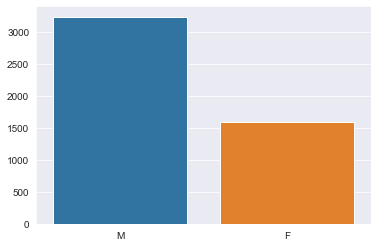

In [46]:
sns.barplot(x=df.Gender.value_counts().index, y=df.Gender.value_counts().values)
plt.show()

#### Droping irrelevant and redundant columns
- `Name` is dropped since it has no use, __Gender__ is generated out of this variable; 
- `Year_birth` is transformed into __Age__;
- `Marital Status, Kidhome and Teenhome`, is transformed to the total Number of Familiy members __Num_family__;
- `Country` is not relevant since it the costumers are all from the 3 regions of Ireland;
- `Dt_Customer` is now transformed into __Seniority__ in days;
- `AcceptedCmp1:5` is now one single variable of how many campaings a customer accepted __Campaign Acceptance__
- 'Complain__ is dropped because there are only 62 observations (in a universe of 5,000).

In [47]:
df_proc = df

In [48]:
df_proc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4835 entries, 10003075 to 10013073
Data columns (total 35 columns):
Name                         4834 non-null object
Year_Birth                   4835 non-null int64
Education                    4835 non-null object
Marital_Status               4835 non-null object
Income                       4835 non-null float64
Kidhome                      4835 non-null int64
Teenhome                     4835 non-null int64
Region                       4835 non-null object
Country                      4835 non-null object
Dt_Customer                  4835 non-null datetime64[ns]
Recency                      4835 non-null int64
MntGroceries                 4835 non-null float64
MntStationery                4835 non-null float64
MntHouseKeeping              4835 non-null float64
MntWellness_&_Beauty         4835 non-null float64
MntElectronics_&_Supplies    4835 non-null float64
MntLimitedEdition            4835 non-null float64
NumDealsPurchases    

In [49]:
# Create a list of all column numbers to keep
columns_to_drop = [0,1,3,5,6,8,9,22,23,24,25,26,27]
columns_to_keep = [x for x in range(df_proc.shape[1]) if x not in columns_to_drop]

# Delete columns by column number using iloc selection
df_proc = df_proc.iloc[:, columns_to_keep]

#### Transforming categorical variables
- `Education` encode into 3 categories;
- `Region` encode Variable Region to 0, 1 and 2
- `Gender` encode Variable Gender to M = 0 and F = 1

In [50]:
# Encode Variable Gender to M = 0 and F = 1
df_proc["Gender"] = np.where((df_proc["Gender"] == "M"),0,1)

# Transform the variables to a category and then encode it
# Region
df_proc["Region"] = df_proc.Region.astype('category').cat.codes

# Education
df_proc["Education"] = df_proc.Education.astype('category').cat.codes


/Users/marcosneves/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/marcosneves/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/marcosneves/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

 ### 3.2.2. Power Transform <a class="anchor" id="power"></a>

#### Transforming numerical variables
- `Income`  do not present high skweness therefore a power transformation is not need. Only scalling of the variables to be done;
- `MntStationery, MntWellness_&_Beauty` presents skewness a power transform is applied to these variables followed by scalling
- `Recency` and `Seniority` present an uniform distribution. Only scalling of the variables to be done;
- `NumWebVisitsMonth` present high skweness therefore a power transformation is needed. Scalling of the variables to be done
- `MntElectronics&Supplies and MntLimitedEdition` present high skweness therefore a power transformation is needed. Also recheck of the outliers
- `NumStorePurchases` is skewed and a power transform is applied

In [51]:
df_proc.skew()

Education                   -0.519062
Income                       0.004991
Region                      -0.029184
Recency                     -0.010142
MntGroceries                 1.122088
MntStationery                2.027580
MntHouseKeeping              1.647594
MntWellness_&_Beauty         2.057729
MntElectronics_&_Supplies    2.094449
MntLimitedEdition            1.741112
NumDealsPurchases            1.921834
NumWebPurchases              0.704636
NumCatalogPurchases          1.131629
NumStorePurchases            0.702166
NumWebVisitsMonth           -0.295814
Freq                         0.216244
Age                          0.107901
Seniority                    0.028203
Total_Mnt                    0.847877
Campaign Acceptance          2.554818
Num_family                   0.078763
Gender                       0.721859
dtype: float64

In [52]:
df_proc.kurt()

Education                   -1.483682
Income                      -0.905250
Region                      -1.490578
Recency                     -1.197651
MntGroceries                 0.477663
MntStationery                3.761315
MntHouseKeeping              1.950996
MntWellness_&_Beauty         3.921171
MntElectronics_&_Supplies    4.019167
MntLimitedEdition            2.716767
NumDealsPurchases            4.822110
NumWebPurchases             -0.292049
NumCatalogPurchases          0.531460
NumStorePurchases           -0.709604
NumWebVisitsMonth           -0.976547
Freq                        -1.002089
Age                         -0.824664
Seniority                   -1.195102
Total_Mnt                   -0.296280
Campaign Acceptance          6.971388
Num_family                  -0.217969
Gender                      -1.479532
dtype: float64

In [53]:
### Mnt Variables
## Power Transform
#
# Since data is skewed to the right square root power transfrom for the 6 Mnt variables
# For these variables scalling is not neeeded since data is already between 0 and 1
df_proc.loc[:,'MntGroceries':'MntLimitedEdition'] = np.sqrt(df_proc.loc[:,'MntGroceries':'MntLimitedEdition'])


# Transform variable NumStorePurchases
# power of 2 is used since the data is skewed to the left
# df_proc.loc[:,"NumStorePurchases"] = np.power(df_proc.loc[:,"NumStorePurchases"],2)

/Users/marcosneves/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [54]:
df_proc.skew()

Education                   -0.519062
Income                       0.004991
Region                      -0.029184
Recency                     -0.010142
MntGroceries                 0.351312
MntStationery                0.901213
MntHouseKeeping              0.852247
MntWellness_&_Beauty         0.907320
MntElectronics_&_Supplies    0.944208
MntLimitedEdition            0.745119
NumDealsPurchases            1.921834
NumWebPurchases              0.704636
NumCatalogPurchases          1.131629
NumStorePurchases            0.702166
NumWebVisitsMonth           -0.295814
Freq                         0.216244
Age                          0.107901
Seniority                    0.028203
Total_Mnt                    0.847877
Campaign Acceptance          2.554818
Num_family                   0.078763
Gender                       0.721859
dtype: float64

In [55]:
df_proc.kurt()

Education                   -1.483682
Income                      -0.905250
Region                      -1.490578
Recency                     -1.197651
MntGroceries                -1.053633
MntStationery                0.036480
MntHouseKeeping             -0.309065
MntWellness_&_Beauty         0.110337
MntElectronics_&_Supplies    0.192187
MntLimitedEdition           -0.060489
NumDealsPurchases            4.822110
NumWebPurchases             -0.292049
NumCatalogPurchases          0.531460
NumStorePurchases           -0.709604
NumWebVisitsMonth           -0.976547
Freq                        -1.002089
Age                         -0.824664
Seniority                   -1.195102
Total_Mnt                   -0.296280
Campaign Acceptance          6.971388
Num_family                  -0.217969
Gender                      -1.479532
dtype: float64

# 4. Clustering <a class="anchor" id="clusters"></a>


## 4.1. Customer Value Perspective <a class="anchor" id="customer"></a>

To address this business problem, we started by exploring the data and trying to have a overview about the average behavior of customers, as well as extreme cases.

We decided to start with RFM model (1), as it is a simpler but widely recognized technique in database marketing. It comes down to grouping customers by Score according to only three dimensions (Recency, requency, and Monetary) as previously described. This reduces the problem to something easier to interpret and helps to understand more about the different groups of customers.

### 4.1.1. RFM Analysis (Recency, Frequency and Monetary)  <a class="anchor" id="rfm"></a>

    Is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors:

    - Recency: How recently a customer has made a purchase
    - Frequency: How often a customer makes a purchase
    - Monetary Value: How much money a customer spends on purchases

In [56]:
# Copy from cleaned Dataframe
df_raw = df_proc.copy()

print(df_raw.columns)
df_raw.head()

Index(['Education', 'Income', 'Region', 'Recency', 'MntGroceries',
       'MntStationery', 'MntHouseKeeping', 'MntWellness_&_Beauty',
       'MntElectronics_&_Supplies', 'MntLimitedEdition', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Freq', 'Age', 'Seniority', 'Total_Mnt',
       'Campaign Acceptance', 'Num_family', 'Gender'],
      dtype='object')


Education    Income  Region  Recency  MntGroceries  MntStationery  \
Card_ID                                                                       
10003075          1   90782.0       0       66     24.939928       8.366600   
10003076          2  113023.0       2        6     31.843367       3.872983   
10003078          2   93571.0       0       10     25.278449       9.380832   
10003079          2   91852.0       2       26     28.390139       7.483315   
10003080          2   22386.0       0       65      5.656854       1.000000   

          MntHouseKeeping  MntWellness_&_Beauty  MntElectronics_&_Supplies  \
Card_ID                                                                      
10003075        26.038433              3.316625                   7.141428   
10003076        25.357445              8.602325                   6.000000   
10003078        13.601471              8.000000                   7.280110   
10003079        18.708287              7.348469                   7.348469   
10003080         5.385165              1.414214                   0.000000   

          MntLimitedEdition  ...  NumCatalogPurchases  NumStorePurchases  \
Card_ID                      ...                                           
10003075           5.830952  ...                    7                 10   
10003076           6.000000  ...                    4                  8   
10003078          12.649111  ...                    5                 13   
10003079          16.124515  ...                    9                 11   
10003080           4.472136  ...                    3                  3   

          NumWebVisitsMonth  Freq  Age  Seniority  Total_Mnt  \
Card_ID                                                        
10003075                  4    30   40        240     1466.0   
10003076                  1    22   28         74     1818.0   
10003078                  5    34   39        344     1189.0   
10003079                  6    36   43        513     1580.0   
10003080                  9    20   53        243       84.0   

          Campaign Acceptance  Num_family  Gender  
Card_ID                                            
10003075                  0.2           2       0  
10003076                  0.0           1       0  
10003078                  0.0           2       0  
10003079                  0.2           2       0  
10003080                  0.2           4       0  

[5 rows x 22 columns]

#### 4.1.1.1 - Prepare RFM Dataset

In [57]:
df_RFM = (df_raw[['Recency', 'Freq', 'Total_Mnt']]
          .rename(columns = {'Freq': 'Frequency',  'Total_Mnt': 'Monetary'})
         )

df_RFM.head()

Recency  Frequency  Monetary
Card_ID                               
10003075       66         30    1466.0
10003076        6         22    1818.0
10003078       10         34    1189.0
10003079       26         36    1580.0
10003080       65         20      84.0

#### 4.1.1.4 -  Compute RFM Score and RFM Group 


In [58]:
r_labels, f_labels, m_labels = range(5, 0, -1), range(1,6), range(1,6)

df_RFM['R_Score'] = pd.qcut(df_RFM['Recency'], q=5, labels=r_labels).astype(int)
df_RFM['F_Score'] = pd.qcut(df_RFM['Frequency'], q=5, labels=f_labels).astype(int)
df_RFM['M_Score'] = pd.qcut(df_RFM['Monetary'], q=5, labels=m_labels).astype(int)

df_RFM['RFM_Score'] = df_RFM['R_Score'] + df_RFM['F_Score'] + df_RFM['M_Score']
df_RFM['RFM_Group'] = df_RFM['R_Score'].astype(str) + df_RFM['F_Score'].astype(str) + df_RFM['M_Score'].astype(str)


#### Assign Label base on RFM Score

In [59]:
def assign_label(df, r_rule, fm_rule, label, colname='RFM_Label'):
    df.loc[(df['R_Score'].between(r_rule[0], r_rule[1]))
            & (df['F_Score'].between(fm_rule[0], fm_rule[1])), colname] = label
    return df

df_RFM['RFM_Label'] = ''
df_RFM = assign_label(df_RFM, (5,5), (4,5), 'champions')
df_RFM = assign_label(df_RFM, (3,4), (4,5), 'loyal customers')
df_RFM = assign_label(df_RFM, (4,5), (2,3), 'potential loyalist')
df_RFM = assign_label(df_RFM, (5,5), (1,1), 'new customers')
df_RFM = assign_label(df_RFM, (4,4), (1,1), 'promising')
df_RFM = assign_label(df_RFM, (3,3), (3,3), 'needing attention')
df_RFM = assign_label(df_RFM, (3,3), (1,2), 'about to sleep')
df_RFM = assign_label(df_RFM, (1,2), (3,4), 'at risk')
df_RFM = assign_label(df_RFM, (1,2), (5,5), 'cant loose them')
df_RFM = assign_label(df_RFM, (1,2), (1,2), 'hibernating')
df_RFM.head()

Recency  Frequency  Monetary  R_Score  F_Score  M_Score  RFM_Score  \
Card_ID                                                                        
10003075       66         30    1466.0        2        4        5         11   
10003076        6         22    1818.0        5        3        5         13   
10003078       10         34    1189.0        5        5        4         14   
10003079       26         36    1580.0        4        5        5         14   
10003080       65         20      84.0        2        2        2          6   

         RFM_Group           RFM_Label  
Card_ID                                 
10003075       245             at risk  
10003076       535  potential loyalist  
10003078       554           champions  
10003079       455     loyal customers  
10003080       222         hibernating

#### 4.1.1.4 - Explore Results

In [60]:
print(df_RFM.columns)

df_RFM.groupby('RFM_Score').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count'] }).round(1).head(5)




Index(['Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score',
       'RFM_Score', 'RFM_Group', 'RFM_Label'],
      dtype='object')


Recency Frequency Monetary      
             mean      mean     mean count
RFM_Score                                 
3            89.7      13.5     43.0   168
4            76.6      13.8     55.9   222
5            67.4      15.1     78.6   370
6            50.9      15.5     97.9   413
7            43.2      17.1    178.4   527

#### * Comparing Distributions*

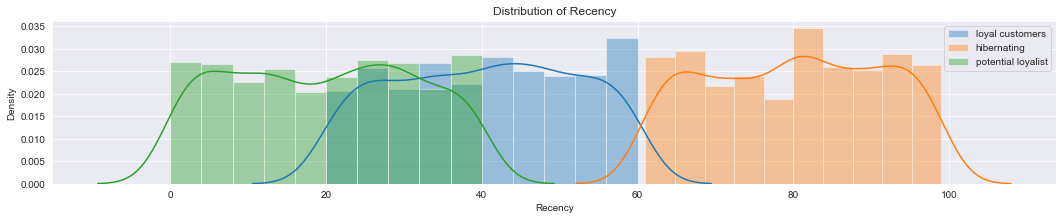

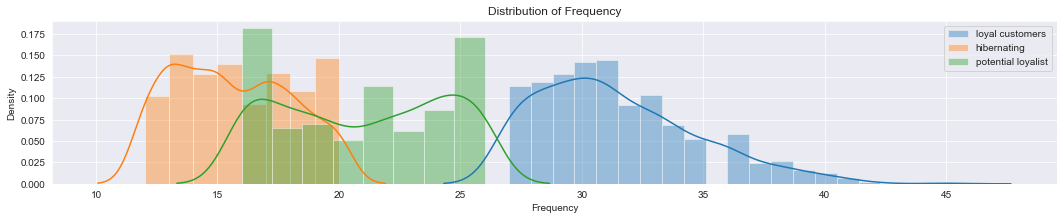

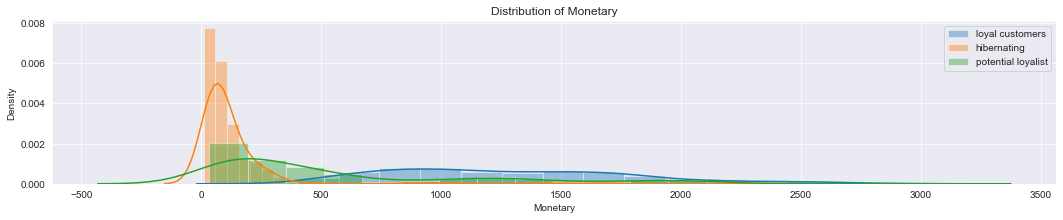

In [61]:
segments = ['loyal customers', 'hibernating', 'potential loyalist']
colnames = ['Recency', 'Frequency', 'Monetary']
for col in colnames:
    fig, ax = plt.subplots(figsize=(18,3))
    for segment in segments:
        sns.distplot(df_RFM[df_RFM['RFM_Label']==segment][col], label=segment)
    ax.set_title('Distribution of %s' % col)
    plt.legend()
    plt.show()

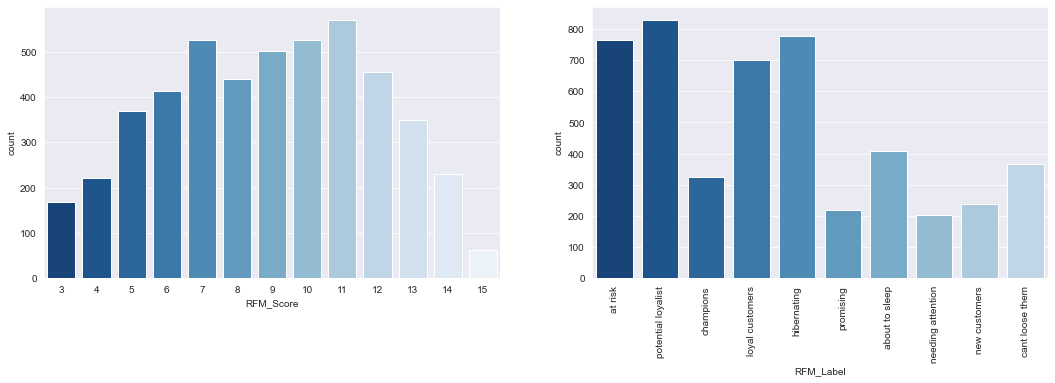

In [62]:
palette = sns.color_palette("Blues_r", n_colors=13)

fig, axes = plt.subplots(1, 2, sharex=False, figsize=(18,5))
sns.countplot(ax=axes[0], x='RFM_Score', data=df_RFM, palette=palette)
sns.countplot(ax=axes[1], x='RFM_Label', data=df_RFM, palette=palette)
#fig.set_title('Number of customers in each RFM cluster (%s)' % rfm_type)
plt.xticks(rotation=90)
plt.show()

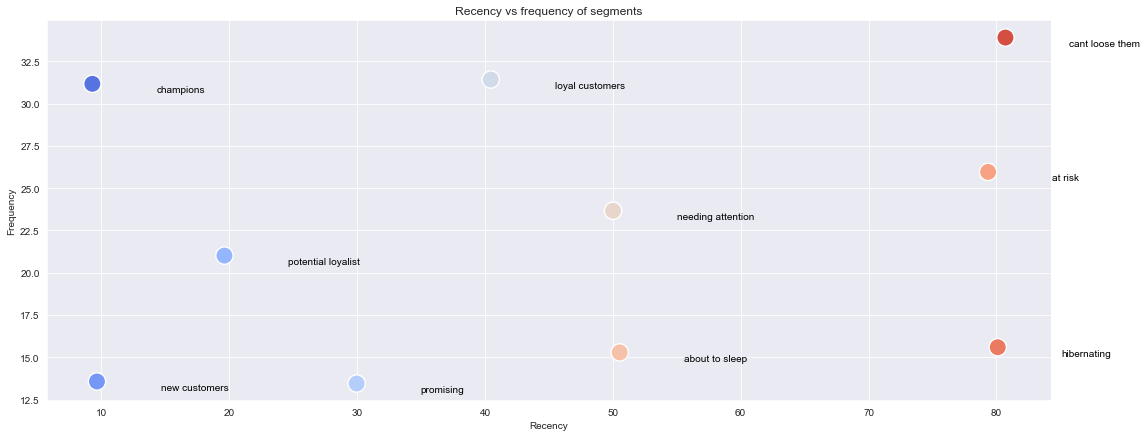

In [63]:
agg_dict = {
    'Card_ID': 'count',
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'sum'
}

df_temp = df_RFM.reset_index().groupby('RFM_Label').agg(agg_dict).sort_values(by='Recency').reset_index()
df_temp.rename({'RFM_Label': 'Label', 'Card_ID': 'Count'}, axis=1, inplace=True)
df_temp['Count_Share'] = df_temp['Count'] / df_temp['Count'].sum()
df_temp['Monetary_Share'] = df_temp['Monetary'] / df_temp['Monetary'].sum()
df_temp['Monetary'] = df_temp['Monetary'] / df_temp['Count']


palette = sns.color_palette("coolwarm", 10)

fig, ax = plt.subplots(figsize=(18,7))
plot = sns.scatterplot(x='Recency', y='Frequency', data=df_temp, hue='Label', s=300, palette=palette)

for i in range(len(df_temp)):
     plot.text(df_temp['Recency'][i]+5,
               df_temp['Frequency'][i]-0.5,
               df_temp['Label'][i],
               horizontalalignment='left',
               size='medium', color='black')

ax.set_title('Recency vs frequency of segments')
ax.get_legend().remove()
plt.show()

#### 4.1.1.5 -  Merge with loaded Dataset to plot and check

In [64]:
df_RFM_final = df_raw.merge(df_RFM[['Frequency', 'RFM_Score',  'RFM_Group', 'RFM_Label']], left_index=True, right_index=True) 

print(f"Columns: {df_RFM_final.columns}")
df_RFM_final.head(3)

Columns: Index(['Education', 'Income', 'Region', 'Recency', 'MntGroceries',
       'MntStationery', 'MntHouseKeeping', 'MntWellness_&_Beauty',
       'MntElectronics_&_Supplies', 'MntLimitedEdition', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Freq', 'Age', 'Seniority', 'Total_Mnt',
       'Campaign Acceptance', 'Num_family', 'Gender', 'Frequency', 'RFM_Score',
       'RFM_Group', 'RFM_Label'],
      dtype='object')


Education    Income  Region  Recency  MntGroceries  MntStationery  \
Card_ID                                                                       
10003075          1   90782.0       0       66     24.939928       8.366600   
10003076          2  113023.0       2        6     31.843367       3.872983   
10003078          2   93571.0       0       10     25.278449       9.380832   

          MntHouseKeeping  MntWellness_&_Beauty  MntElectronics_&_Supplies  \
Card_ID                                                                      
10003075        26.038433              3.316625                   7.141428   
10003076        25.357445              8.602325                   6.000000   
10003078        13.601471              8.000000                   7.280110   

          MntLimitedEdition  ...  Age  Seniority  Total_Mnt  \
Card_ID                      ...                              
10003075           5.830952  ...   40        240     1466.0   
10003076           6.000000  ...   28         74     1818.0   
10003078          12.649111  ...   39        344     1189.0   

          Campaign Acceptance  Num_family  Gender  Frequency  RFM_Score  \
Card_ID                                                                   
10003075                  0.2           2       0         30         11   
10003076                  0.0           1       0         22         13   
10003078                  0.0           2       0         34         14   

          RFM_Group           RFM_Label  
Card_ID                                  
10003075        245             at risk  
10003076        535  potential loyalist  
10003078        554           champions  

[3 rows x 26 columns]

#### 4.1.1.6 -  Plot Clusters

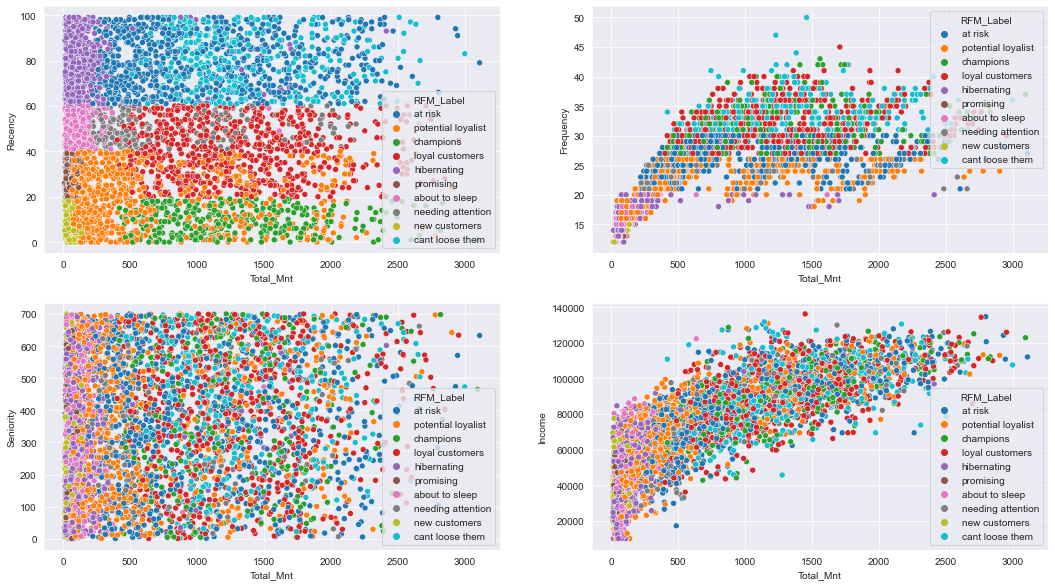

In [65]:
fig, axes = plt.subplots(2, 2, sharex=False, figsize=(18,10))
sns.scatterplot(ax=axes[0, 0], x='Total_Mnt', y='Recency', hue='RFM_Label', data=df_RFM_final)
sns.scatterplot(ax=axes[0, 1], x='Total_Mnt', y='Frequency', hue='RFM_Label', data=df_RFM_final)
sns.scatterplot(ax=axes[1, 0], x='Total_Mnt', y='Seniority', hue='RFM_Label', data=df_RFM_final)
sns.scatterplot(ax=axes[1, 1], x='Total_Mnt', y='Income', hue='RFM_Label', data=df_RFM_final)
plt.show()

#### 4.1.1.7 - Explore dimensions by cluster label

In [66]:
def plot_clusters_correlations(df, x="", dimensions="", color="", shape = None):
    """
        plot set of boxplot rows and cols based on input 
    """
    n_cols = 2
    n_rows = math.ceil(len(dimensions) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, sharex=False, figsize=(18, n_rows * 6))
    
    row = 0
    col = 0
    for dim in dimensions:
        
        sns.boxplot(ax=axes[row, col], x = x, y=dim, data = df)

        if col % 2:
            row += 1
            col = 0
        else:
            col += 1
        
    for ax in fig.axes:
        ax.tick_params(labelrotation=90)
        
    plt.show()
    
    return fig


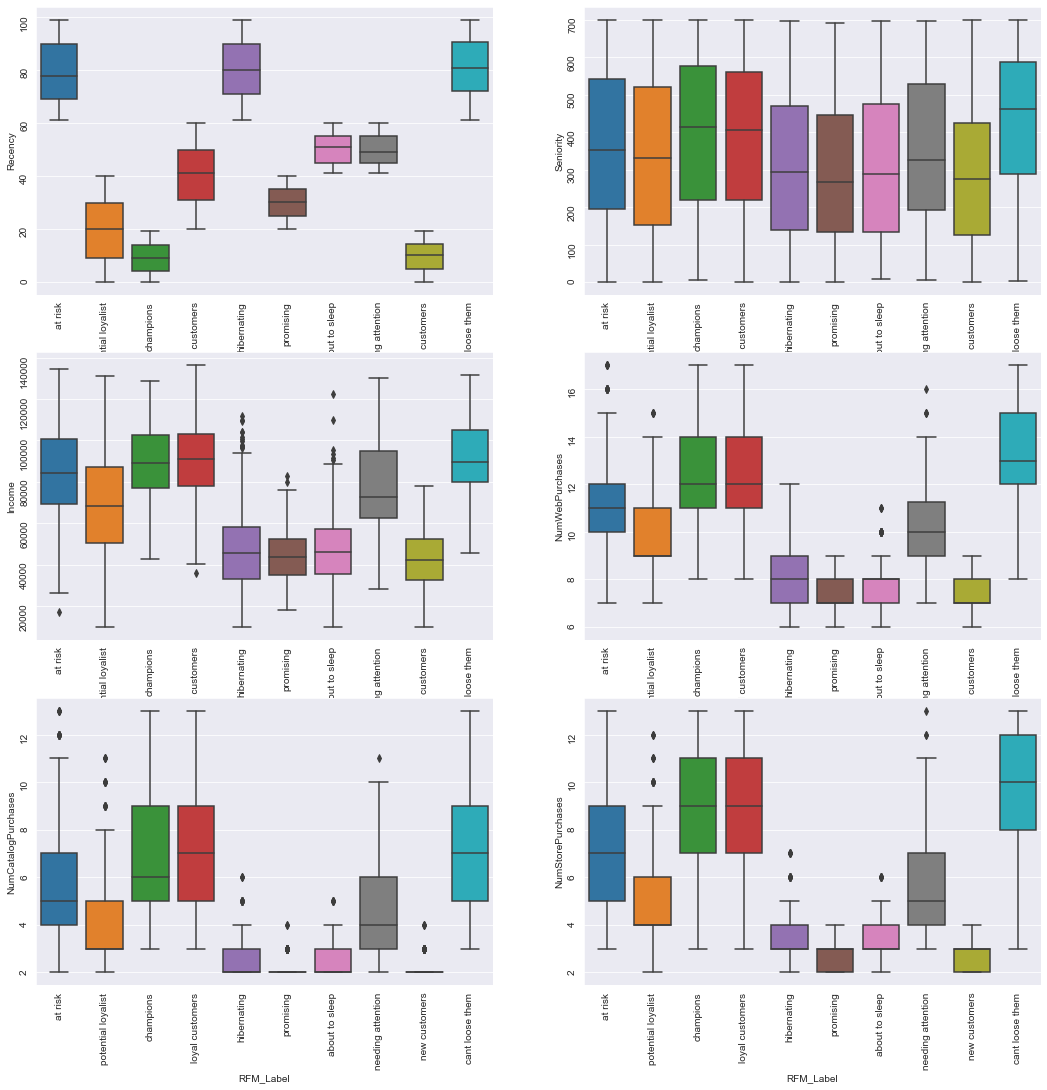

In [67]:
_fig = plot_clusters_correlations(df_RFM_final, 'RFM_Label', [
                                        'Recency', 
                                        'Seniority',
                                        #'Total_Mnt', 
                                        #'Frequency',
                                        'Income',
                                        'NumWebPurchases',
                                        'NumCatalogPurchases',
                                        'NumStorePurchases',
                                        #'Campaign Acceptance'
                                       ])

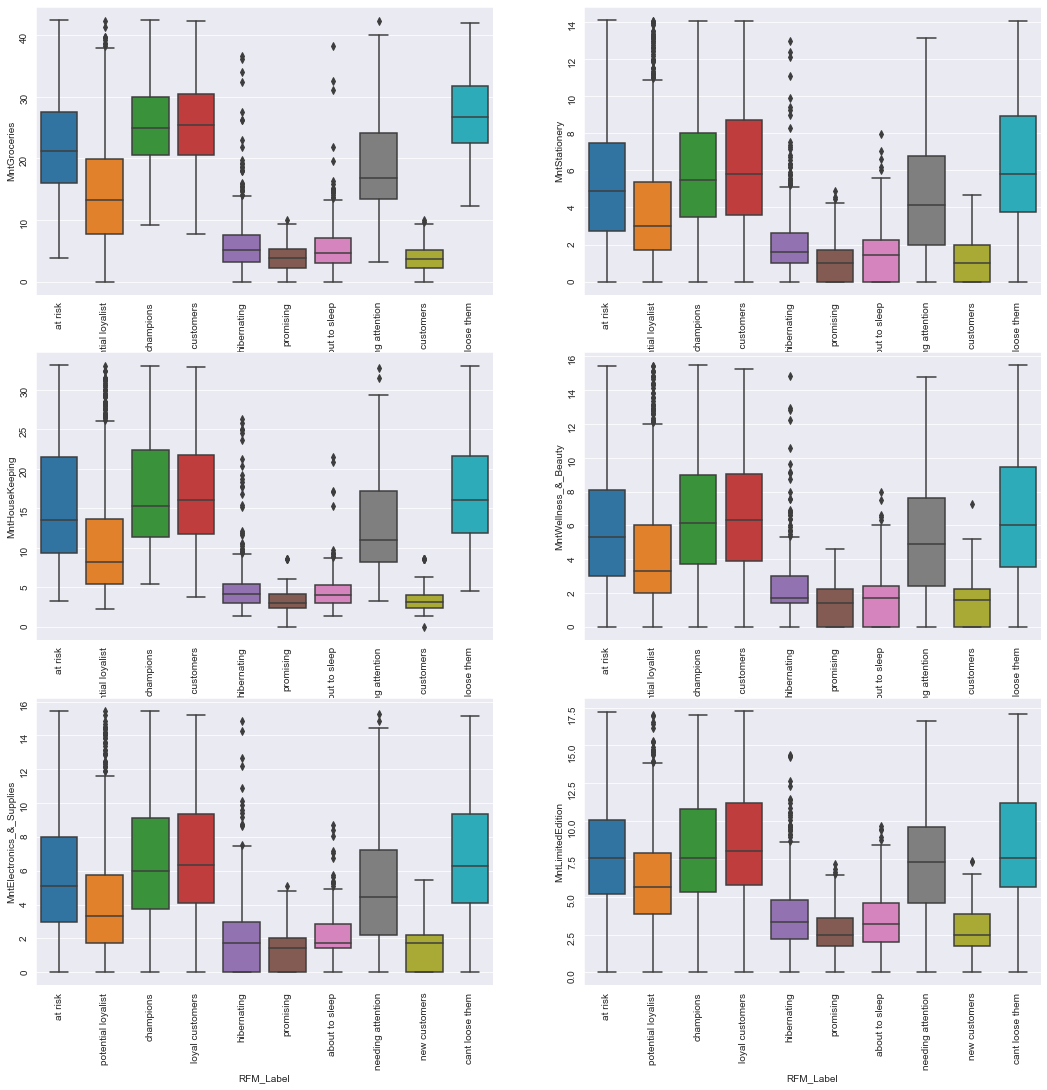

In [68]:
_fig = plot_clusters_correlations(df_RFM_final, 'RFM_Label', [
                                        'MntGroceries', 'MntStationery',
       'MntHouseKeeping', 'MntWellness_&_Beauty', 'MntElectronics_&_Supplies',
       'MntLimitedEdition'])

In [69]:
# Continuous Dimensions
# -------------------


agg_dict = {
    'Card_ID': 'count',
    'Recency': 'mean',
    'Freq': 'mean',
    'Total_Mnt': 'sum',
    'Seniority': 'mean',
    'Income': 'mean',
    'Age': 'mean',
}

df_temp = df_RFM_final.reset_index().groupby('RFM_Label').agg(agg_dict).sort_values(by='Recency').reset_index()
df_temp.rename({'RFM_Label': 'Label', 'Card_ID': 'Count'}, axis=1, inplace=True)
df_temp['Count_Share'] = df_temp['Count'] / df_temp['Count'].sum()
df_temp['Total_Mnt_Share'] = df_temp['Total_Mnt'] / df_temp['Total_Mnt'].sum()
df_temp['Total_Mnt'] = df_temp['Total_Mnt'] / df_temp['Count']

df_temp.head(15)



Label  Count    Recency       Freq    Total_Mnt   Seniority  \
0           champions    326   9.285276  31.168712  1250.662577  392.904908   
1       new customers    240   9.645833  13.566667    53.566667  293.145833   
2  potential loyalist    830  19.618072  21.010843   589.851807  339.474699   
3           promising    219  29.958904  13.447489    52.109589  292.273973   
4     loyal customers    701  40.449358  31.420827  1288.446505  390.369472   
5   needing attention    204  50.014706  23.661765   807.460784  345.534314   
6      about to sleep    408  50.536765  15.284314   106.529412  308.710784   
7             at risk    763  79.352556  25.959371  1049.897772  361.031455   
8         hibernating    778  80.107969  15.592545   125.398458  309.479434   
9     cant loose them    366  80.710383  33.901639  1354.002732  431.109290   

         Income        Age  Count_Share  Total_Mnt_Share  
0  88927.098160  49.226994     0.067425         0.118967  
1  42654.370833  44.391667     0.049638         0.003751  
2  68352.861446  47.181928     0.171665         0.142853  
3  44065.538813  44.442922     0.045295         0.003330  
4  90441.296719  49.269615     0.144984         0.263543  
5  76605.710784  48.578431     0.042192         0.048064  
6  46787.676471  44.370098     0.084385         0.012682  
7  84416.741809  49.104849     0.157808         0.233743  
8  46480.786632  45.026992     0.160910         0.028467  
9  91193.054645  48.896175     0.075698         0.144600

### 4.1.2. Synthesizing RFM results <a class="anchor" id="resultsrfm"></a>


- __6% of Champions Customers: Those who buy a lot, often and with higher totals.__  
    It is the type of customer for whom we have to sell the most expensive products. They do not need price incentives. But they need new products and loyalty programs to stay engaged

------

- __14% of loyal customers__  
    Active efforts should be put by the Brand into further cultivation of purchase will among such customers. Possible measures for this purpose include exclusive products and offers at regular intervals. Preferential treatment in customer service, as well as personalizing journeys and using this Target to test new products.

------

- __17% of customers with great potential to become Loyal__  
    They are the ones we should give incentives to become loyal to. We can offer exclusive products and promotions. As well as Customer Loyalty programs

------

- __15% of customers represent certain loss risks and need to be further observed__   
    Active measures can be taken to make them feel more engaged to the company, including aggresive price incentives and attractive promotion activities like holiday discounts and clearance sales or sending SMS to remind them of gift packages offered for returning customers.

### 4.1.2 - Clustering using K-Means  <a class="anchor" id="kmeans1"></a>

Using the same dataset used for RFM (Recency, Frequency and Monetary) 

In [70]:
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist

#### 4.1.2.1 - Prepare dataset

In [71]:
df_KMeans = (df_proc[['Recency', 'Freq', 'Total_Mnt']]
          .rename(columns={'Freq': 'Frequency', 'Total_Mnt': 'Monetary'})
          )
df_KMeans.head()

Recency  Frequency  Monetary
Card_ID                               
10003075       66         30    1466.0
10003076        6         22    1818.0
10003078       10         34    1189.0
10003079       26         36    1580.0
10003080       65         20      84.0

#### 4.1.2.2 -Distribution of Recency, Frequency and Monetary

Monetary distribution is right-skewed, showing that the majority of customers spent little in total . It has a long tail containing single customers who made a high spends in total.

In [72]:
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.displot(df_skew[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

check_skew(df_KMeans,'Recency')
check_skew(df_KMeans,'Frequency')
check_skew(df_KMeans,'Monetary')

Recency's: Skew: -0.010139279573791913, : SkewtestResult(statistic=-0.2882632356021267, pvalue=0.7731452469676405)
Frequency's: Skew: 0.21617725943406843, : SkewtestResult(statistic=6.076833251612253, pvalue=1.225791100589767e-09)
Monetary's: Skew: 0.8476134734066252, : SkewtestResult(statistic=21.089860872196688, pvalue=9.855097752961838e-99)


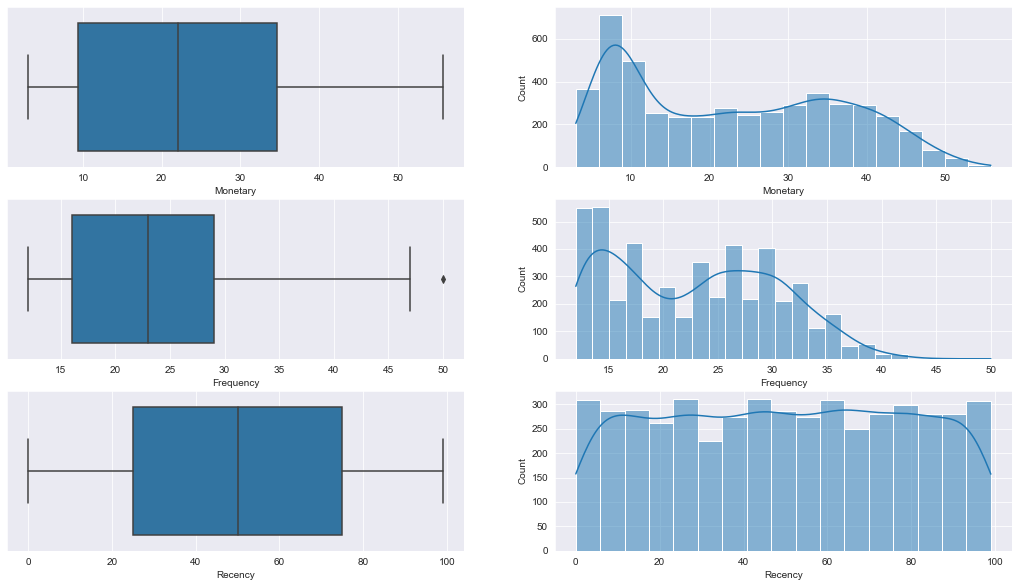

In [280]:
fig, axes = plt.subplots(3, 2, sharex=False, figsize=(18,10))
sns.boxplot(ax=axes[0, 0], x ='Monetary', data = df_RFM)
sns.histplot(ax=axes[0, 1], x = df_RFM['Monetary'], kde=True)
sns.boxplot(ax=axes[1, 0], x ='Frequency', data = df_RFM)
sns.histplot(ax=axes[1, 1], x = df_RFM['Frequency'], kde=True)
sns.boxplot(ax=axes[2, 0], x ='Recency', data = df_RFM)
sns.histplot(ax=axes[2, 1], x = df_RFM['Recency'], kde=True)
plt.show()

#### 4.1.2.3 - Apply SQRT to  Monetary 

In [283]:
df_KMeans['Monetary'] = df_KMeans['Monetary'].apply(np.sqrt).round(3)

Both frequency and monetary distributions are bimodal (with two different peaks - modes).  

It reveals that one group of customers has low frequency (small number of orders, around 16 per customer) and another group is much more "loyal" (with around 30 purchases per customer). 
When it comes to monetary, it follows similar pattern. Part of customers have only spent little amount of money but there is another (significant in size) group that have spent much more.

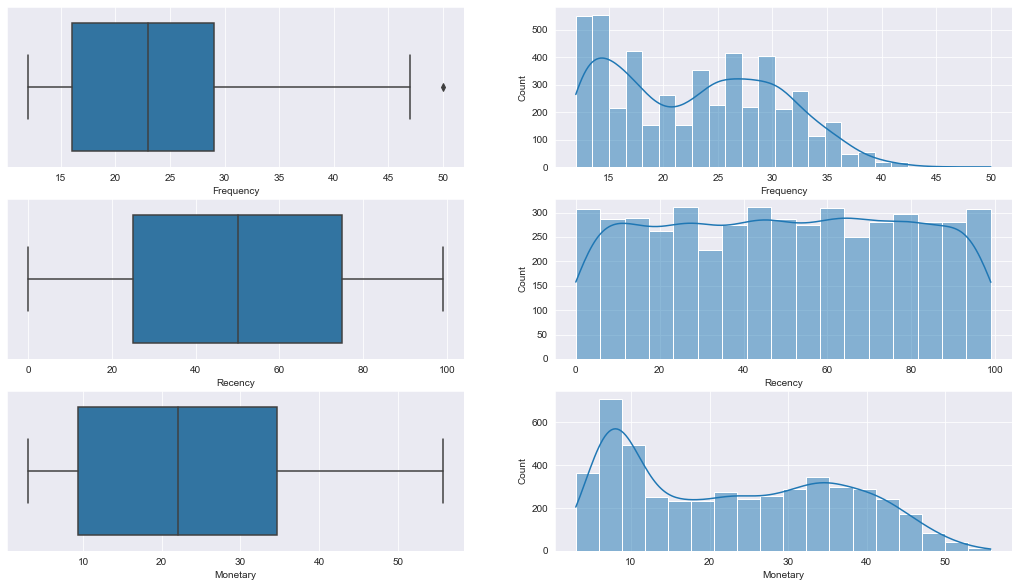

In [284]:
fig, axes = plt.subplots(3, 2, sharex=False, figsize=(18,10))
sns.boxplot(ax=axes[0, 0], x ='Frequency', data = df_KMeans)
sns.histplot(ax=axes[0, 1], x = df_KMeans['Frequency'], kde=True)

sns.boxplot(ax=axes[1, 0], x ='Recency', data = df_KMeans)
sns.histplot(ax=axes[1, 1], x = df_KMeans['Recency'], kde=True)

sns.boxplot(ax=axes[2, 0], x ='Monetary', data = df_KMeans)
sns.histplot(ax=axes[2, 1], x = df_KMeans['Monetary'], kde=True)
plt.show()


#### 4.1.2.4 - Scaling

In [76]:
scaleobj = StandardScaler()
scaled_data = scaleobj.fit_transform(df_KMeans)
df_KMeans_scaled = pd.DataFrame(scaled_data, index = df_KMeans.index, columns = df_KMeans.columns)
df_KMeans_scaled.head()

Recency  Frequency  Monetary
Card_ID                                
10003075  0.566062   0.933629  1.104033
10003076 -1.503774  -0.134354  1.617279
10003078 -1.365785   1.467621  0.700143
10003079 -0.813829   1.734616  1.270255
10003080  0.531565  -0.401350 -0.911041

#### 4.1.2.5 - Plot Elbow chart using sum of square distance and distortion

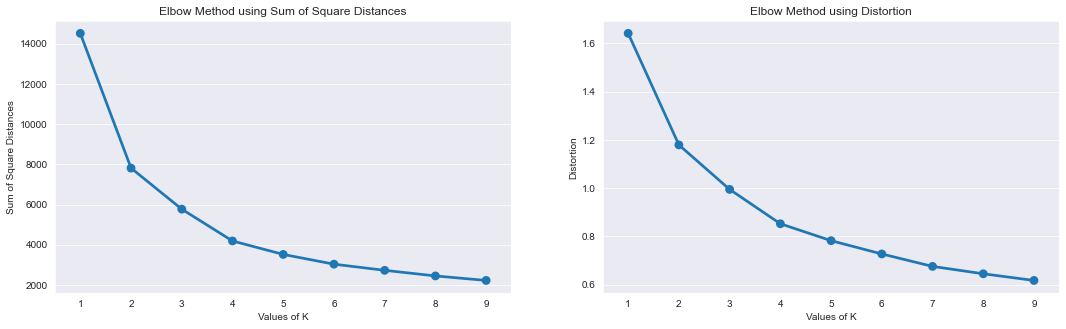

In [77]:
sum_of_sq_dist = {}
sum_of_sq_dist = {}
distortions = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    kmeans_pca = KMeans(n_clusters= k, init= 'k-means++', random_state = 100)
    kmeans_pca.fit(df_KMeans_scaled)
    sum_of_sq_dist[k] = kmeans_pca.inertia_
    
    distortions.append(sum(np.min(cdist(df_KMeans_scaled, kmeans_pca.cluster_centers_,
                                        'euclidean'), axis=1)) / df_KMeans_scaled.shape[0])

    mapping1[k] = sum(np.min(cdist(df_KMeans_scaled, kmeans_pca.cluster_centers_,
                                   'euclidean'), axis=1)) / df_KMeans_scaled.shape[0]
    mapping2[k] = kmeans_pca.inertia_


## PLOT ELBOW
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(18,5))
sns.pointplot(ax = axes[0], x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
axes[0].set_title('Elbow Method using Sum of Square Distances')
axes[0].set_xlabel('Values of K')
axes[0].set_ylabel('Sum of Square Distances')

sns.pointplot(ax = axes[1], x = list(K), y = distortions)
axes[1].set_title('Elbow Method using Distortion')
axes[1].set_ylabel('Distortion')
axes[1].set_xlabel('Values of K')

plt.show()


#### 4.1.2.6 - Testing K values for KMeans 

In [78]:
def kmeans(normalised_df, clusters_number, original_df):
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df)

    # Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = original_df.assign(Cluster = cluster_labels)
    
    
    return df_new, cluster_labels

In [79]:
df_k2, cluster_labels_k2 = kmeans(df_KMeans_scaled, 2, df_KMeans)
df_k3, cluster_labels_k3 = kmeans(df_KMeans_scaled, 3, df_KMeans)
df_k4, cluster_labels_k4 = kmeans(df_KMeans_scaled, 4, df_KMeans)
df_k5, cluster_labels_k5 = kmeans(df_KMeans_scaled, 5, df_KMeans)
df_k6, cluster_labels_k6 = kmeans(df_KMeans_scaled, 6, df_KMeans)

#### 4.1.2.7 - Check best K using Snake Plot

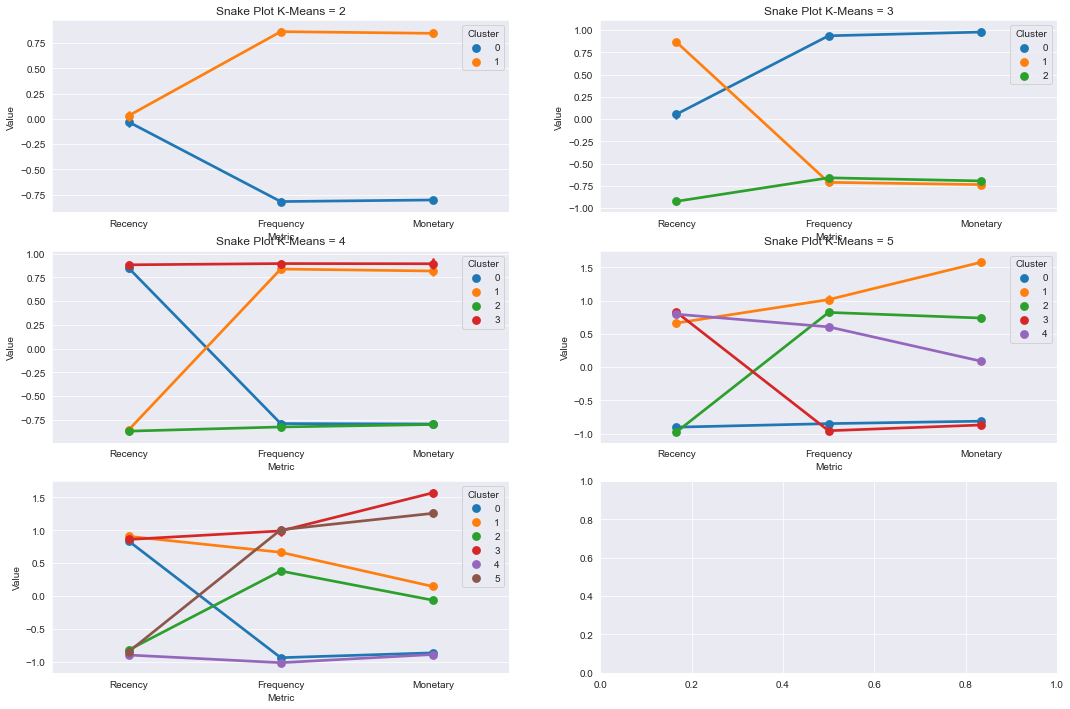

In [80]:
def snake_plot(normalised_df, df, df_rfm_original):

    normalised_df = pd.DataFrame(normalised_df, 
                                       index=df_KMeans.index, 
                                       columns=df_KMeans.columns)
    normalised_df['Cluster'] = df['Cluster']

    df_melt = pd.melt(normalised_df.reset_index(), 
                        id_vars=['Card_ID', 'Cluster'],
                        value_vars=['Recency', 'Frequency', 'Monetary'], 
                        var_name='Metric', 
                        value_name='Value')
    
    return df_melt

snake_k2 = snake_plot(df_KMeans_scaled, df_k2, df_KMeans)
snake_k3 = snake_plot(df_KMeans_scaled, df_k3, df_KMeans)
snake_k4 = snake_plot(df_KMeans_scaled, df_k4, df_KMeans)
snake_k5 = snake_plot(df_KMeans_scaled, df_k5, df_KMeans)
snake_k6 = snake_plot(df_KMeans_scaled, df_k6, df_KMeans)


fig, axes = plt.subplots(3, 2, sharex=False, figsize=(18,12))
sns.pointplot(ax=axes[0, 0], data=snake_k2, x='Metric', y='Value', hue='Cluster')
sns.pointplot(ax=axes[0, 1], data=snake_k3, x='Metric', y='Value', hue='Cluster')
sns.pointplot(ax=axes[1, 0], data=snake_k4, x='Metric', y='Value', hue='Cluster')
sns.pointplot(ax=axes[1, 1], data=snake_k5, x='Metric', y='Value', hue='Cluster')
sns.pointplot(ax=axes[2, 0], data=snake_k6, x='Metric', y='Value', hue='Cluster')

axes[0, 0].set_title('Snake Plot K-Means = 2')
axes[0, 1].set_title('Snake Plot K-Means = 3')
axes[1, 0].set_title('Snake Plot K-Means = 4')
axes[1, 1].set_title('Snake Plot K-Means = 5')

plt.show()

#### 4.1.2.8 - Check best K using PCA

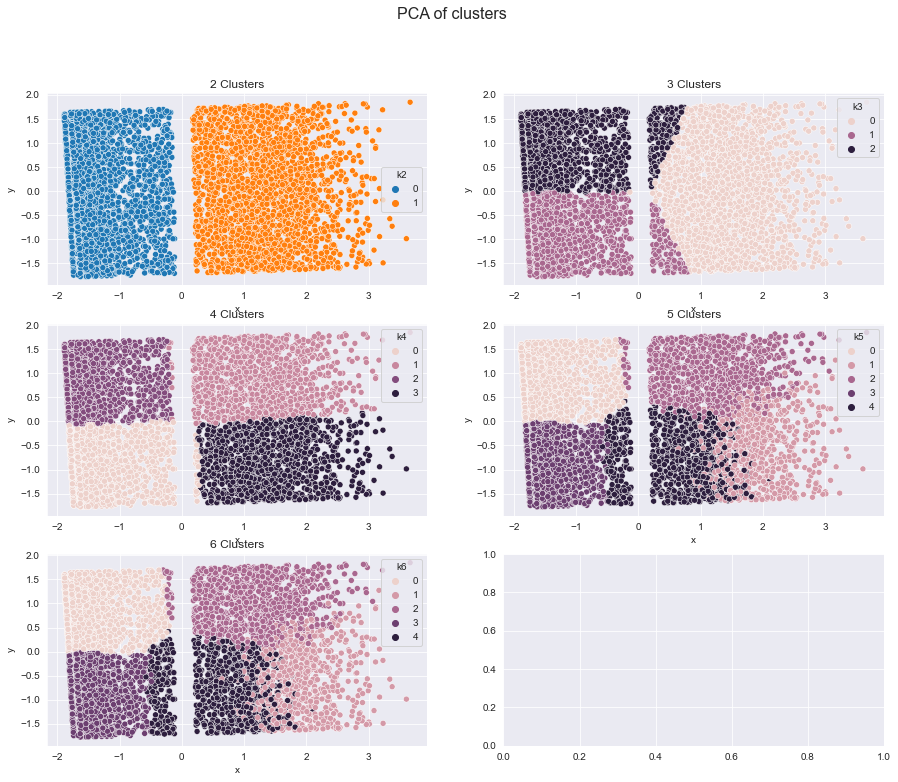

In [81]:
pca = PCA(n_components=2)
pca_array = pca.fit_transform(df_KMeans_scaled)

pca_data = pd.DataFrame(pca_array, columns=['x', 'y'], index=df_KMeans_scaled.index)
pca_data['k2'] = df_k2.Cluster
pca_data['k3'] = df_k3.Cluster
pca_data['k4'] = df_k4.Cluster
pca_data['k5'] = df_k5.Cluster
pca_data['k6'] = df_k5.Cluster


fig, ax = plt.subplots(3, 2, figsize=(15,12))
sns.scatterplot(x='x', y='y', hue='k2', data=pca_data, ax=ax[0, 0])
sns.scatterplot(x='x', y='y', hue='k3', data=pca_data, ax=ax[0, 1])
sns.scatterplot(x='x', y='y', hue='k4', data=pca_data, ax=ax[1, 0])
sns.scatterplot(x='x', y='y', hue='k5', data=pca_data, ax=ax[1, 1])
sns.scatterplot(x='x', y='y', hue='k6', data=pca_data, ax=ax[2, 0])


fig.suptitle('PCA of clusters', fontsize=16)
ax[0, 0].set_title('2 Clusters')
ax[0, 1].set_title('3 Clusters')
ax[1, 0].set_title('4 Clusters')
ax[1, 1].set_title('5 Clusters')
ax[2, 0].set_title('6 Clusters')

plt.show()

From the analysis of the Elbow Method, PCA and Snake Plot, there is an indication of 6 clusters as an ideal number. But when analyzing the Snake Plot there is a doubt if there are no Cluters that need to be merged. 

We will run Kmeans using 6 Clusters and analyze other dimensions to understand the behavior of these six groups

#### 4.1.2.9 - Run KMean Cluster for 6 Clusters


In [82]:
KMean_clust = KMeans(n_clusters= 6, random_state=100)
KMean_clust.fit(df_KMeans_scaled)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

##### *Add  KMean Cluster column to KMeans Scaled Dataframe*

In [89]:
df_KMeans_scaled['KMeans_Cluster'] = KMean_clust.labels_

colors = ["red", "green", "blue", "yellow", "gray", "magenta"]
df_KMeans_scaled['Cluster_Color'] = df_KMeans_scaled['KMeans_Cluster'].map(lambda p: colors[p])

print(df_KMeans_scaled.columns)
df_KMeans_scaled.head()

Index(['Recency', 'Frequency', 'Monetary', 'Cluster', 'KMeans_Cluster',
       'Cluster_Color'],
      dtype='object')


Recency  Frequency  Monetary  Cluster  KMeans_Cluster Cluster_Color
Card_ID                                                                       
10003075  0.566062   0.933629  1.104033        1               2          blue
10003076 -1.503774  -0.134354  1.617279        1               0           red
10003078 -1.365785   1.467621  0.700143        1               4          gray
10003079 -0.813829   1.734616  1.270255        1               0           red
10003080  0.531565  -0.401350 -0.911041        0               3        yellow

#### 4.1.2.10 - Plot Clusters

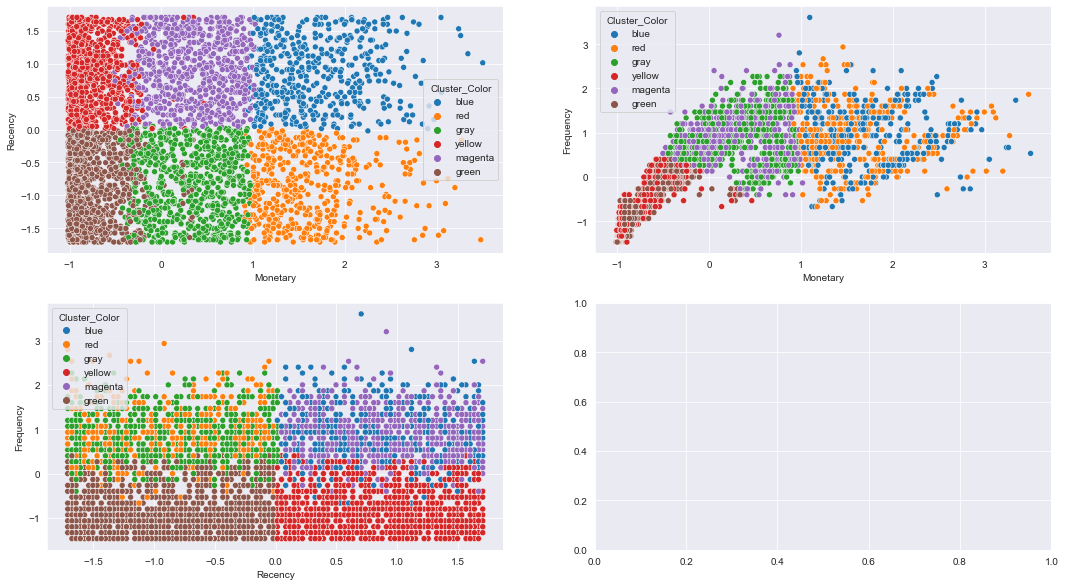

In [90]:
fig, axes = plt.subplots(2, 2, sharex=False, figsize=(18,10))
sns.scatterplot(ax=axes[0, 0], x='Monetary', y='Recency', hue='Cluster_Color', data=df_KMeans_scaled)
sns.scatterplot(ax=axes[0, 1], x='Monetary', y='Frequency', hue='Cluster_Color', data=df_KMeans_scaled)
sns.scatterplot(ax=axes[1, 0], x='Recency', y='Frequency', hue='Cluster_Color', data=df_KMeans_scaled)
plt.show()

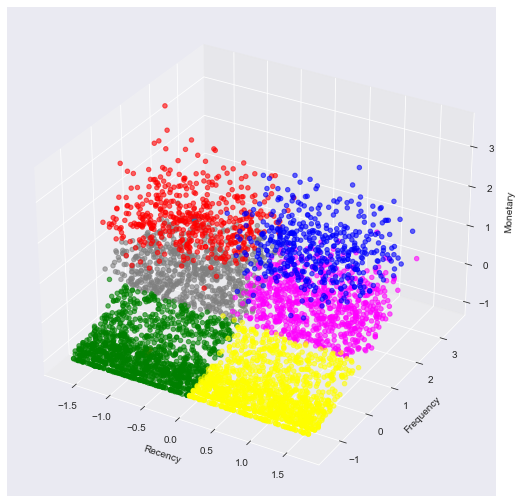

In [285]:
cluster0_RFM = df_KMeans_scaled[df_KMeans_scaled['KMeans_Cluster'] == 0]
cluster1_RFM = df_KMeans_scaled[df_KMeans_scaled['KMeans_Cluster'] == 1]

centroids_RFM = KMean_clust.cluster_centers_

centroid_0_R = centroids_RFM[0,0]
centroid_0_F = centroids_RFM[0,1]
centroid_0_M = centroids_RFM[0,2]

centroid_1_R = centroids_RFM[1,0]
centroid_1_F = centroids_RFM[1,1]
centroid_1_M = centroids_RFM[1,2]
 
fig = plt.figure(figsize=(18, 9))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_KMeans_scaled['Recency'], df_KMeans_scaled['Frequency'], df_KMeans_scaled['Monetary'], alpha=0.6, c=df_KMeans_scaled["Cluster_Color"])
ax.scatter(centroid_0_R,centroid_0_F,centroid_0_M, marker='X', s=50, label = '1')
ax.scatter(centroid_1_R,centroid_1_F,centroid_1_M, marker='X', s=100,  label = '2')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
#ax.legend();

plt.show()

#### 4.1.2.11 - Merge with raw dataset to plot some dimensions

In [93]:
df_KMeans_final = df_raw.merge(df_KMeans_scaled[['KMeans_Cluster', 'Cluster_Color']], left_index=True, right_index=True) 

print(df_KMeans_scaled.columns)
df_KMeans_final.head(3)

Index(['Recency', 'Frequency', 'Monetary', 'Cluster', 'KMeans_Cluster',
       'Cluster_Color'],
      dtype='object')


Education    Income  Region  Recency  MntGroceries  MntStationery  \
Card_ID                                                                       
10003075          1   90782.0       0       66     24.939928       8.366600   
10003076          2  113023.0       2        6     31.843367       3.872983   
10003078          2   93571.0       0       10     25.278449       9.380832   

          MntHouseKeeping  MntWellness_&_Beauty  MntElectronics_&_Supplies  \
Card_ID                                                                      
10003075        26.038433              3.316625                   7.141428   
10003076        25.357445              8.602325                   6.000000   
10003078        13.601471              8.000000                   7.280110   

          MntLimitedEdition  ...  NumWebVisitsMonth  Freq  Age  Seniority  \
Card_ID                      ...                                            
10003075           5.830952  ...                  4    30   40        240   
10003076           6.000000  ...                  1    22   28         74   
10003078          12.649111  ...                  5    34   39        344   

          Total_Mnt  Campaign Acceptance  Num_family  Gender  KMeans_Cluster  \
Card_ID                                                                        
10003075     1466.0                  0.2           2       0               2   
10003076     1818.0                  0.0           1       0               0   
10003078     1189.0                  0.0           2       0               4   

          Cluster_Color  
Card_ID                  
10003075           blue  
10003076            red  
10003078           gray  

[3 rows x 24 columns]

#### 4.1.2.12 - Plot some dimensions by cluster

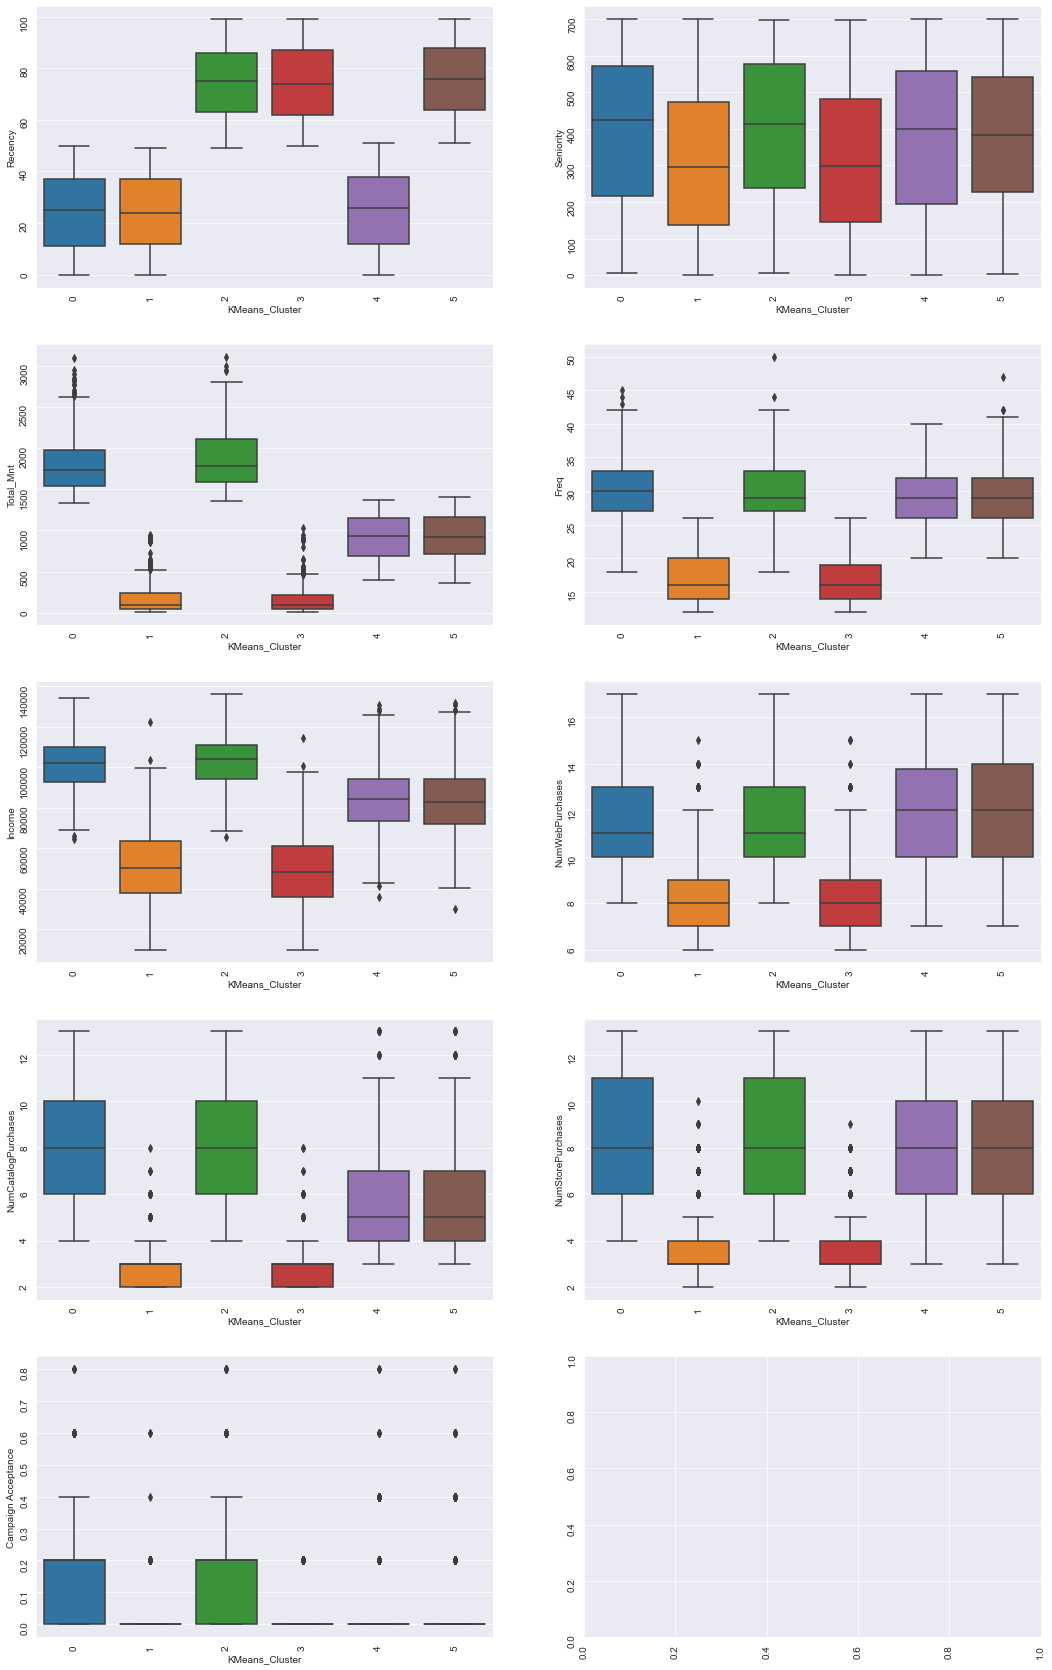

In [94]:
_fig = plot_clusters_correlations(df_KMeans_final, 'KMeans_Cluster', [
                                        'Recency', 
                                        'Seniority',
                                        'Total_Mnt', 
                                        'Freq',
                                        'Income',
                                        'NumWebPurchases',
                                        'NumCatalogPurchases',
                                        'NumStorePurchases',
                                        'Campaign Acceptance'
                                       ])


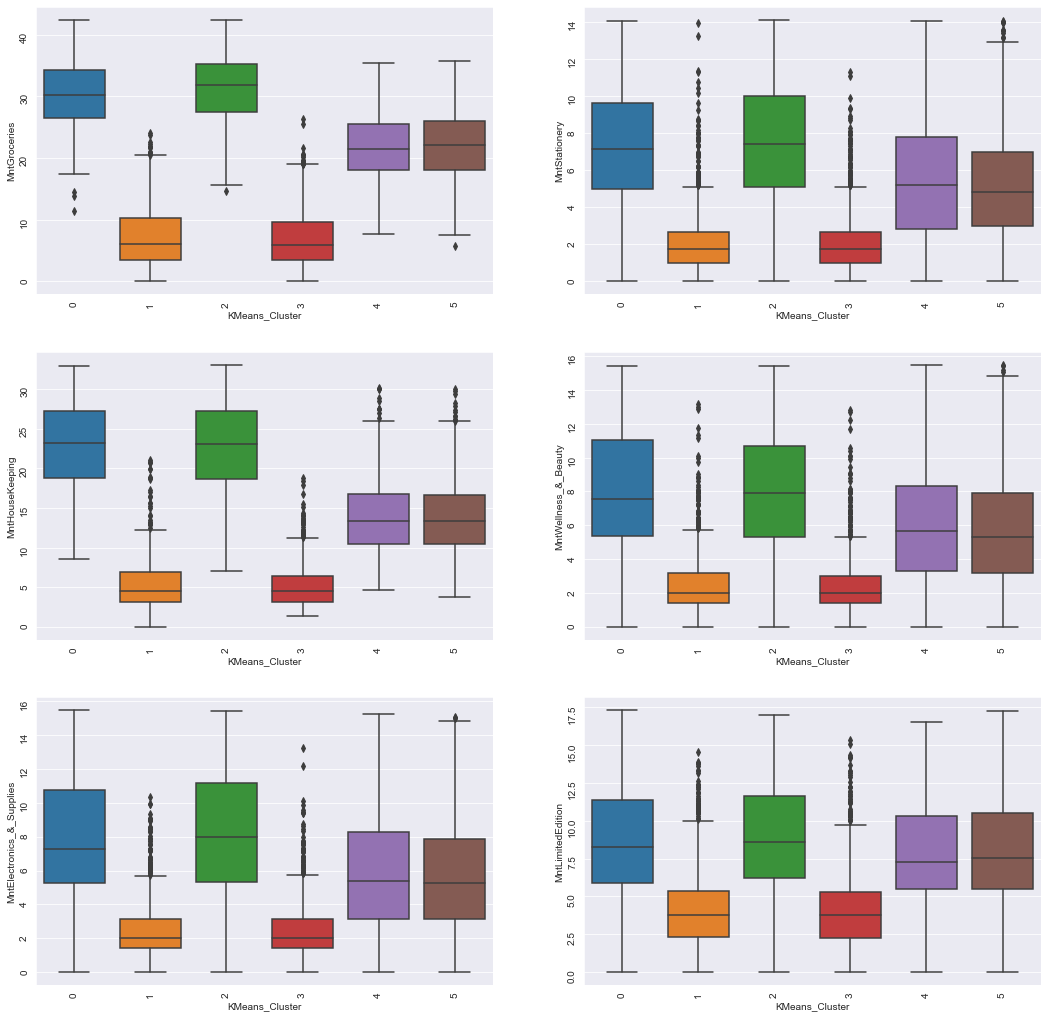

In [95]:
_fig = plot_clusters_correlations(df_KMeans_final, 'KMeans_Cluster', [
                                        'MntGroceries', 'MntStationery',
       'MntHouseKeeping', 'MntWellness_&_Beauty', 'MntElectronics_&_Supplies',
       'MntLimitedEdition'])

#### 4.1.2.13 - Group similar clusters

 
After testing different numbers of clusters, it became evident that customers are divided into three groups as similarities in Recency and Seniority. 

We decide to merge groups in 3 Clusters


In [120]:
df_KMeans_final_merged = df_KMeans_final.copy()

def group_cluster(value):
    
    #print(value)
    _cluster = value
    

    if value == 2:
        _cluster = 0
    elif value == 3:
        _cluster = 1
    elif value == 5:
        _cluster = 4
    else:
        _cluster = value
    """ """
        
    return f"Cluster_{_cluster}"

df_KMeans_final_merged["KMeans_Cluster"] = df_KMeans_final_merged["KMeans_Cluster"].apply(group_cluster)


agg_dict = {
    'Card_ID': 'count',
    'Recency': 'mean',
    'Freq': 'mean',
    'Total_Mnt': 'sum',
    'Seniority': 'mean',
    'Income': 'mean',
    'Num_family': 'mean',
    'Age': 'mean',
    'NumWebPurchases':  'mean',
    'NumWebPurchases':'mean',
    'NumCatalogPurchases':'mean',
    'NumStorePurchases':'mean',
    'Campaign Acceptance':'mean'
}

df_stats = df_KMeans_final_merged.reset_index().groupby('KMeans_Cluster').agg(agg_dict).sort_values(by='Recency').reset_index()
df_stats.rename({'RFM_Label': 'Label', 'Card_ID': 'Count'}, axis=1, inplace=True)
df_stats['Count_Share'] = df_stats['Count'] / df_stats['Count'].sum()
df_stats['Total_Mnt_Share'] = df_stats['Total_Mnt'] / df_temp['Total_Mnt'].sum()
df_stats['Total_Mnt'] = df_stats['Total_Mnt'] / df_stats['Count']

df_stats.head()

KMeans_Cluster  Count    Recency       Freq    Total_Mnt   Seniority  \
0      Cluster_1   2481  48.758968  16.876260   158.731963  315.667070   
1      Cluster_0    938  49.395522  29.760128  1832.933902  395.938166   
2      Cluster_4   1416  51.178672  29.273305   927.993644  376.959040   

          Income  Num_family        Age  NumWebPurchases  NumCatalogPurchases  \
0   49756.439742    2.918984  45.527207         8.470375             2.712213   
1  101922.396588    1.974414  48.839019        11.606610             8.087420   
2   83775.809322    2.520480  49.277542        12.066384             5.832627   

   NumStorePurchases  Campaign Acceptance  Count_Share  Total_Mnt_Share  
0           3.557840             0.019266     0.513133        58.972499  
1           8.468017             0.169510     0.194002       257.458966  
2           8.259181             0.061017     0.292865       196.773510

In [115]:
df_KMeans_final_merged[df_KMeans_final_merged["KMeans_Cluster"] == "Cluster_1"].describe().T

count          mean  std           min           25%  \
Count                  1.0   2481.000000  NaN   2481.000000   2481.000000   
Recency                1.0     48.758968  NaN     48.758968     48.758968   
Freq                   1.0     16.876260  NaN     16.876260     16.876260   
Total_Mnt              1.0    158.731963  NaN    158.731963    158.731963   
Seniority              1.0    315.667070  NaN    315.667070    315.667070   
Income                 1.0  49756.439742  NaN  49756.439742  49756.439742   
Num_family             1.0      2.918984  NaN      2.918984      2.918984   
Age                    1.0     45.527207  NaN     45.527207     45.527207   
NumWebPurchases        1.0      8.470375  NaN      8.470375      8.470375   
NumCatalogPurchases    1.0      2.712213  NaN      2.712213      2.712213   
NumStorePurchases      1.0      3.557840  NaN      3.557840      3.557840   
Campaign Acceptance    1.0      0.019266  NaN      0.019266      0.019266   
Count_Share            1.0      0.513133  NaN      0.513133      0.513133   
Total_Mnt_Share        1.0     58.972499  NaN     58.972499     58.972499   

                              50%           75%           max  
Count                 2481.000000   2481.000000   2481.000000  
Recency                 48.758968     48.758968     48.758968  
Freq                    16.876260     16.876260     16.876260  
Total_Mnt              158.731963    158.731963    158.731963  
Seniority              315.667070    315.667070    315.667070  
Income               49756.439742  49756.439742  49756.439742  
Num_family               2.918984      2.918984      2.918984  
Age                     45.527207     45.527207     45.527207  
NumWebPurchases          8.470375      8.470375      8.470375  
NumCatalogPurchases      2.712213      2.712213      2.712213  
NumStorePurchases        3.557840      3.557840      3.557840  
Campaign Acceptance      0.019266      0.019266      0.019266  
Count_Share              0.513133      0.513133      0.513133  
Total_Mnt_Share         58.972499     58.972499     58.972499

#### 4.1.2.14 - Test new merged clusters

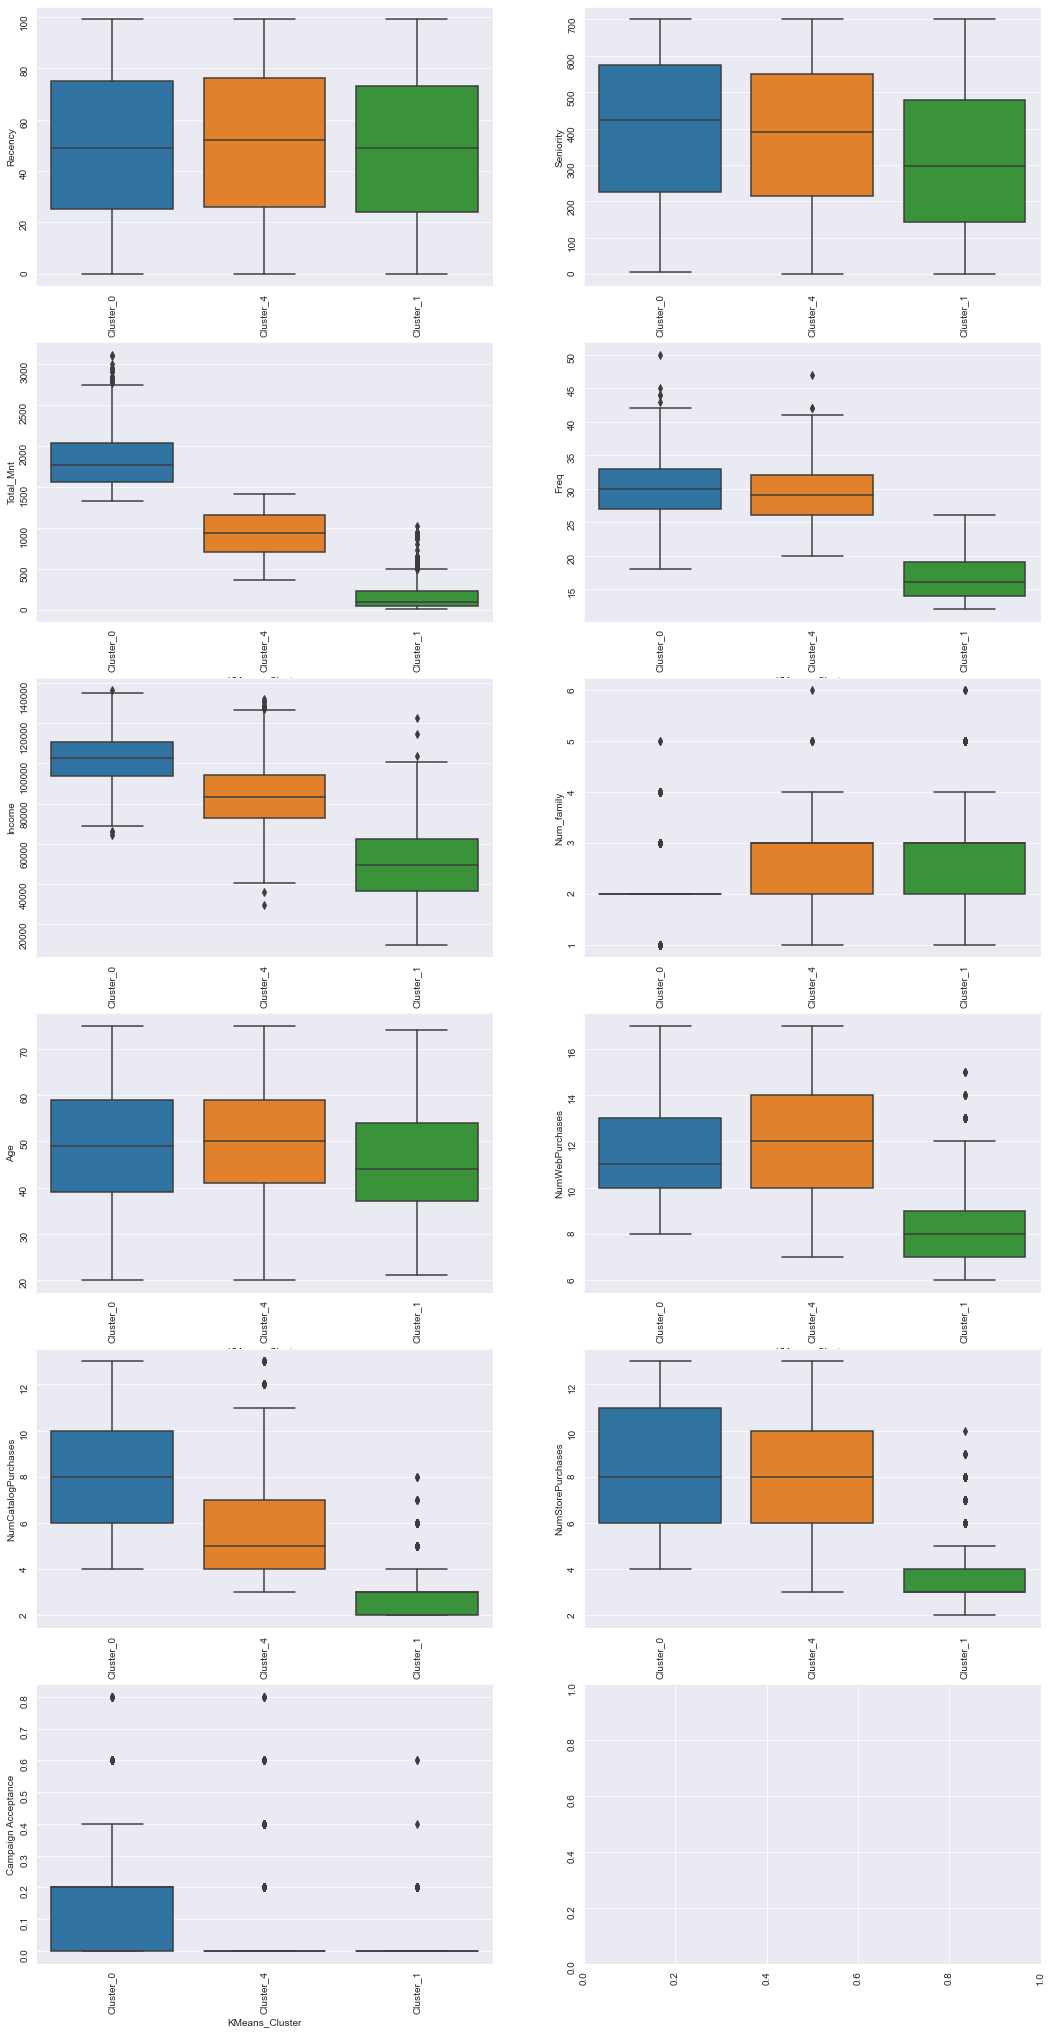

In [121]:
_fig = plot_clusters_correlations(df_KMeans_final_merged, 'KMeans_Cluster', [
                                        'Recency', 
                                        'Seniority',
                                        'Total_Mnt', 
                                        'Freq',
                                        'Income',
                                        'Num_family',
                                        'Age',
                                        'NumWebPurchases',
                                        'NumCatalogPurchases',
                                        'NumStorePurchases',
                                        'Campaign Acceptance'
                                       ])

### 4.1.4. Syntethizing K-Means results <a class="anchor" id="resultskmeans"></a>

After testing different numbers of clusters, it became evident that customers are divided into three groups as similarities in Recency and Seniority. 
But it has different behaviors in the amount of purchases, total spent and even in the type of favorite channel.

__Cluster 1 (2481 elements)__ 

    Is the largest cluster  
    Those who spend less, have less frequency, lower income and buy less  
 	
	On average they:
	- are part of a family of 3 elements
	- has a family income of 49k
	- has known the brand for less than a year. Average of 309 days.
	- spent a total of 158 in 16 purchases

---- 

__Cluster 2 (1416 elements)__  

	Those who spend moderately, have a medium income and make moderate purchases.

	On average they:
	- Are part of a family of 3 elements
	- has a family income of 83k
	- has known the brand for over a year. Average of 370 days.
	- Spent a total of 927 in 26 purchases
	
---- 

__Cluster 3 (938 elements)__ 

	Those who have a higher income, also make moderate purchases but spend more in total

	On average they:
	- Are part of a family of 2 elements
	- has a family income over to 100k
	- has known the brand for over a year. Average of 390 days.
	- Spent a total of 1820 in 30 purchases

### 4.1.5.Testing KNN with final KMeans 3 Clusters( Experimentation )<a class="anchor" id="knn"></a>

#### K-Nearest Neighbors (K-NN)

k-NN is a supervised algorithm used for classification. What this means is that we have some labeled data upfront which we provide to the model for it to understand the dynamics within that data i.e. train. It then uses those learnings to make inferences on the unseen data i.e. test. In the case of classification this labeled data is discrete in nature.  


__Steps__
- Decide on your similarity or distance metric.
- Split the original labeled dataset into training and test data.
- Pick an evaluation metric.
- Decide upon the value of k. Here k refers to the number of closest neighbors we will consider while doing the majority voting of target labels.
- Run k-NN a few times, changing k and checking the evaluation measure.
- In each iteration, k neighbors vote, majority vote wins and becomes the ultimate prediction
- Optimize k by picking the one with the best evaluation measure.
- Once you’ve chosen k, use the same training set and now create a new test set with the people’s ages and incomes that you have no labels for, and want to predict.

In [271]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score



In [124]:
df_KMeans_final_merged.columns

Index(['Education', 'Income', 'Region', 'Recency', 'MntGroceries',
       'MntStationery', 'MntHouseKeeping', 'MntWellness_&_Beauty',
       'MntElectronics_&_Supplies', 'MntLimitedEdition', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Freq', 'Age', 'Seniority', 'Total_Mnt',
       'Campaign Acceptance', 'Num_family', 'Gender', 'KMeans_Cluster',
       'Cluster_Color'],
      dtype='object')

In [145]:
df_KNN = (df_KMeans_final_merged.copy() 
          [['Recency', 'Freq', 'Total_Mnt', 'Income', 'Num_family', 'KMeans_Cluster']]
         )

#df_KNN

df_KNN.head()

Recency  Freq  Total_Mnt    Income  Num_family KMeans_Cluster
Card_ID                                                                
10003075       66    30     1466.0   90782.0           2      Cluster_0
10003076        6    22     1818.0  113023.0           1      Cluster_0
10003078       10    34     1189.0   93571.0           2      Cluster_4
10003079       26    36     1580.0   91852.0           2      Cluster_0
10003080       65    20       84.0   22386.0           4      Cluster_1

In [147]:
X = df_KNN.iloc[:, :-1].values
c = df_KNN.iloc[:, 5].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)


array(['Cluster_0', 'Cluster_0', 'Cluster_4', ..., 'Cluster_4',
       'Cluster_4', 'Cluster_0'], dtype=object)

In [148]:
scaleobj = StandardScaler()
scaleobj.fit(X_train)

X_train = scaleobj.transform(X_train)
X_test = scaleobj.transform(X_test)

In [160]:
error = []

neighbors = np.arange(1, 10)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Calculating error for K values between 1 and 10
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    pred_i = knn.predict(X_test)
    
    error.append(np.mean(pred_i != y_test))
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

##### Exploring Error and Accuracy

In [241]:
# Error 
df_error = pd.DataFrame(data = {'K': list(range(1, 10)),'error': error })
df_accuracy = pd.DataFrame(data = {'neighbors': list(neighbors), 'Testing Accuracy': test_accuracy,'Training accuracy': train_accuracy })

df_accuracy.head()

neighbors  Testing Accuracy  Training accuracy
0          1          0.953825           1.000000
1          2          0.948312           0.979610
2          3          0.958649           0.985225
3          4          0.953825           0.976359
4          5          0.961406           0.979610

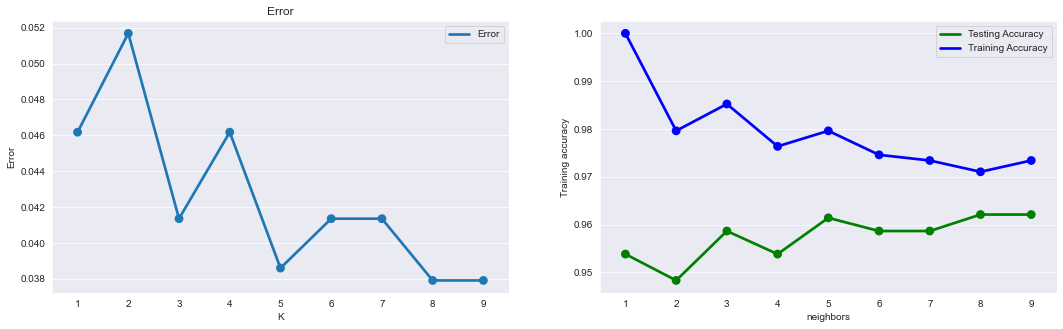

In [279]:
fig = plt.figure(figsize=(18, 5))
ax = fig.add_subplot(121)

sns.pointplot(data=df_error, x='K', y='error')
ax.set_title('Error')
ax.set_xlabel('K')
ax.set_ylabel('Error')
ax.legend(handles=ax.lines[::len(df_error)+1], labels=["Error"])

ax2 = fig.add_subplot(122)
sns.pointplot(data=df_accuracy, x='neighbors', y='Testing Accuracy', color='g', label='Accuracy')
sns.pointplot(data=df_accuracy, x='neighbors', y='Training accuracy', color='b', label='Accuracy')
ax2.legend(handles=ax2.lines[::len(df_accuracy)+1], labels=["Testing Accuracy","Training Accuracy"])
#ax2.legend();

plt.show()

We decide to use K=8 as gas the lower error rate and best Test Accuracy

In [268]:
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

#### Analyze performance of Classifiers

In [286]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   Cluster_0       0.95      0.95      0.95       278
   Cluster_1       0.98      0.98      0.98       739
   Cluster_4       0.94      0.94      0.94       434

    accuracy                           0.96      1451
   macro avg       0.96      0.96      0.96      1451
weighted avg       0.96      0.96      0.96      1451



In [287]:
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))


Accuracy: 0.96

              precision    recall  f1-score   support

   Cluster_0       0.95      0.95      0.95       278
   Cluster_1       0.98      0.98      0.98       739
   Cluster_4       0.94      0.94      0.94       434

    accuracy                           0.96      1451
   macro avg       0.96      0.96      0.96      1451
weighted avg       0.96      0.96      0.96      1451



In [278]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted  Cluster_0  Cluster_1  Cluster_4   All
True                                            
Cluster_0        264          0         14   278
Cluster_1          0        726         13   739
Cluster_4         13         15        406   434
All              277        741        433  1451

##### Hyperparameter tuning

Perform a exhaustive search over specified parameter values for an estimator.

GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method. Hence after using this function we get accuracy/loss for every combination of hyperparameters and we can choose the one with the best performance.

It which involves:

- Trying a bunch of different hyperparameter values
- Fitting all of them separately
- Checking how well each performs
- Choosing the best performing one
- Using cross-validation every time



In [264]:
from sklearn.model_selection import GridSearchCV

In [276]:
#the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1, 50)}

knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

#### Analyse  GridSearchCV results

In [266]:
knn_cv.best_score_

0.927197518097208

In [267]:
knn_cv.best_params_

{'n_neighbors': 3}

#### Results

Using the K Means result dataset, which already contains the Custer Label, as input, we can say that it is possible to generate a classification model to indentify the customer Cluster with accuracy of 92% using KNeighborsClassifier with a n_neighbors = 3 of and using the dimensions Recency Freq, Total_Mnt, Income, Num_family from the dataset

### 4.1.5. PCA + K-Means ( Experimentation )<a class="anchor" id="pca"></a>

#### 4.1.3.1 - Prepare data

- Subset
- Transform Categorical to Number
- Apply SQRT in  to fix skew

In [ ]:
# Subset
df_KMeans_PCA = (df_proc[['Recency', 'Freq', 'Total_Mnt', 
                 'Income',  
                 'Age', 
                 'Gender', 
                 'Education', 
                 'Region'
                ]]
          .rename(columns={'Freq': 'Frequency', 'Total_Mnt': 'Monetary'})
          )

### Transform variables
df_KMeans['Monetary'] = df_KMeans['Monetary'].apply(np.sqrt).round(3)
df_KMeans_PCA.head()

#### 4.1.3.2 - Scaling

In [246]:

scaleobj = StandardScaler()
scaled_Data = scaleobj.fit_transform(df_KMeans_PCA)

df_KMeans_PCA_scaled = pd.DataFrame(scaled_Data, index = df_KMeans_PCA.index, columns = df_KMeans_PCA.columns)
df_KMeans_PCA_scaled.head()

Recency  Frequency  Monetary    Income       Age    Gender  \
Card_ID                                                                 
10003075  0.566062   0.933629  1.104033  0.772965 -0.616273 -0.702286   
10003076 -1.503774  -0.134354  1.617279  1.593868 -1.633779 -0.702286   
10003078 -1.365785   1.467621  0.700143  0.875905 -0.701066 -0.702286   
10003079 -0.813829   1.734616  1.270255  0.812458 -0.361897 -0.702286   
10003080  0.531565  -0.401350 -0.911041 -1.751494  0.486025 -0.702286   

          Education    Region  
Card_ID                        
10003075  -0.293497 -1.248042  
10003076   0.854608  1.208914  
10003078   0.854608 -1.248042  
10003079   0.854608  1.208914  
10003080   0.854608 -1.248042

#### 4.1.3.3 - Dimensionality reduction using PCA

Principal component analysis (PCA) is a technique that transforms a dataset of many features into principal components that "summarize" the variance that underlies the data

In [247]:
pca = PCA()
pca.fit(df_KMeans_PCA_scaled)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

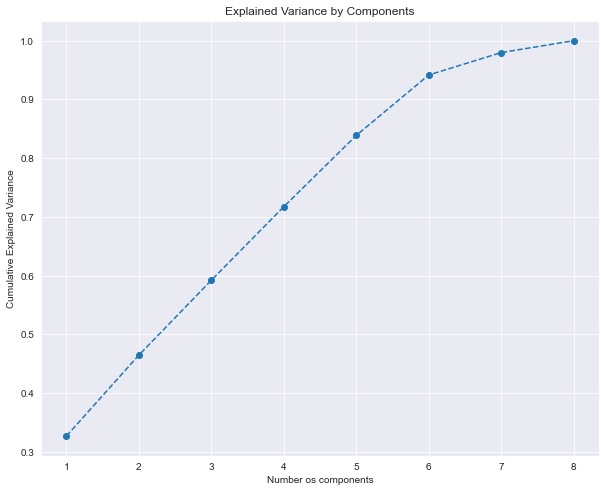

In [248]:
plt.figure(figsize = (10,8))
plt.plot(range(1,9), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.xlabel("Number os components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Components")
plt.show()

#### 4.1.3.4 - Will go for 5 componentes that express more than 80% of data variance

In [249]:
pca = PCA(n_components=5)
pca.fit(df_KMeans_PCA_scaled)
scores_pca = pca.transform(df_KMeans_PCA_scaled)

df_pca_components = pd.DataFrame(pca.components_, columns = df_KMeans_PCA_scaled.columns)
df_pca = pd.DataFrame(data = scores_pca, columns = [f'component{x}' for x in range(1, 6)])

df_pca.head(10)

component1  component2  component3  component4  component5
0    1.430201    0.608199    0.421095   -0.349775    1.636123
1    1.529181    1.134734    0.330522   -1.163180   -1.388798
2    1.641446   -0.075022    1.680632   -1.012772    0.318134
3    2.170481    0.500017   -0.288469   -0.932366   -1.140385
4   -1.497953   -1.595436   -0.016080   -0.423399    1.156195
5    0.173137   -0.329335   -0.780441   -0.304988    0.635479
6    2.117664    0.279399    0.183425   -0.186821    1.761451
7    0.471590    0.104009   -1.156977   -0.044739    1.156327
8   -1.961938   -0.175563    0.756578    1.139437   -0.747193
9   -2.034735   -1.370394   -0.153235   -0.929217   -0.363060

#### 4.1.3.5 - Analyze PCA Results

In [250]:
def get_important_features(transformed_features, components_, columns):
    """
    determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    # Sort each column by length. These are the origina columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print("Features by importance:\n", important_features)

    
print(f"By analysing the Features by importance Total_Spent, Purchases , Income and ")
get_important_features(scores_pca, pca.components_, df_KMeans_PCA_scaled.columns.values)

By analysing the Features by importance Total_Spent, Purchases , Income and 
Features by importance:
 [(2.5033035119518443, 'Monetary'), (2.465788495620355, 'Education'), (2.439749901764011, 'Income'), (2.3758611228500275, 'Frequency'), (2.2510736363774173, 'Age'), (0.9249318550472069, 'Region'), (0.14379568130402517, 'Recency'), (0.06802661603290562, 'Gender')]


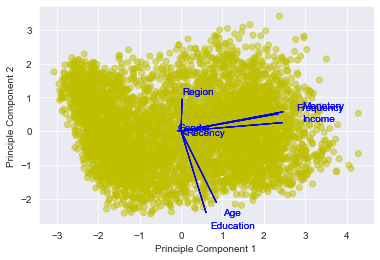

In [128]:
def draw_vectors(transformed_features, components_, columns):
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    ax = plt.axes()

    for i in range(num_columns):
    # Use an arrow to project each original feature as a
    # labeled vector on your principal component axes
        plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
        plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)

    return ax

x = draw_vectors(scores_pca, pca.components_, df_KMeans_PCA_scaled.columns.values)
T_df = pd.DataFrame(scores_pca)
T_df.columns = [f'component{x}' for x in range(1, 6)]

T_df['color'] = 'y'
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
#plt.zlabel('Principle Component 3')
plt.scatter(T_df['component1'], T_df['component2'], color=T_df['color'], alpha=0.5)
plt.show()

### 4.1.6. Synthetizing PCA results <a class="anchor" id="resultspca"></a>

#### 4.1.3.6 - Plot Elbow chart using sum of square distance and distortion

__PS:__ Using scores_pca as KMeans input

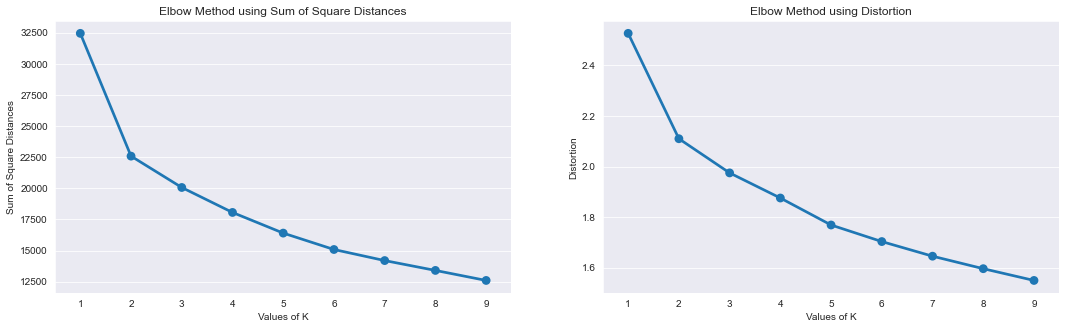

In [129]:
sum_of_sq_dist = {}

sum_of_sq_dist = {}
distortions = []
#inertias = []
mapping1 = {}
mapping2 = {}

K = range(1, 10)

for k in K:
    kmeans_pca = KMeans(n_clusters= k, init= 'k-means++', random_state = 100)
    kmeans_pca.fit(scores_pca)
    sum_of_sq_dist[k] = kmeans_pca.inertia_
    
    distortions.append(sum(np.min(cdist(scores_pca, kmeans_pca.cluster_centers_,
                                        'euclidean'), axis=1)) / scores_pca.shape[0])
    
    
## PLOT ELBOW
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(18,5))
sns.pointplot(ax = axes[0], x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
axes[0].set_title('Elbow Method using Sum of Square Distances')
axes[0].set_xlabel('Values of K')
axes[0].set_ylabel('Sum of Square Distances')

sns.pointplot(ax = axes[1], x = list(K), y = distortions)
axes[1].set_title('Elbow Method using Distortion')
axes[1].set_ylabel('Distortion')
axes[1].set_xlabel('Values of K')

plt.show()

#### 4.1.3.7 -  Apply KMeans using K=2 

In [140]:
KMean_clust = KMeans(n_clusters= 2)
KMean_clust.fit(scores_pca)

df_KMeans_PCA_scaled['KMeans_Cluster'] = KMean_clust.labels_
df_KMeans_PCA_scaled.head()

Recency  Frequency  Monetary    Income       Age    Gender  \
Card_ID                                                                 
10003075  0.566062   0.933629  1.104033  0.772965 -0.616273 -0.702286   
10003076 -1.503774  -0.134354  1.617279  1.593868 -1.633779 -0.702286   
10003078 -1.365785   1.467621  0.700143  0.875905 -0.701066 -0.702286   
10003079 -0.813829   1.734616  1.270255  0.812458 -0.361897 -0.702286   
10003080  0.531565  -0.401350 -0.911041 -1.751494  0.486025 -0.702286   

          Education    Region  KMeans_Cluster Cluster_Color  
Card_ID                                                      
10003075  -0.293497 -1.248042               1         green  
10003076   0.854608  1.208914               1         green  
10003078   0.854608 -1.248042               1         green  
10003079   0.854608  1.208914               1         green  
10003080   0.854608 -1.248042               0        orange

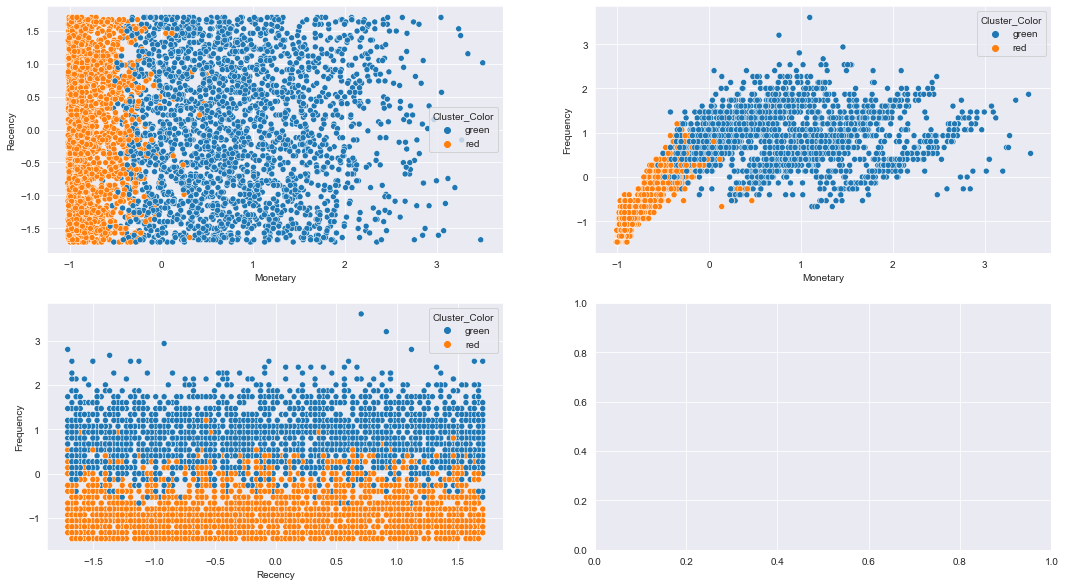

In [149]:
colors = ["red", "green", "blue", "yellow", "orange", "gray", "magenta"]
df_KMeans_PCA_scaled['Cluster_Color'] = df_KMeans_PCA_scaled['KMeans_Cluster'].map(lambda p: colors[p])


fig, axes = plt.subplots(2, 2, sharex=False, figsize=(18,10))
sns.scatterplot(ax=axes[0, 0], x='Monetary', y='Recency', hue='Cluster_Color', data=df_KMeans_PCA_scaled)
sns.scatterplot(ax=axes[0, 1], x='Monetary', y='Frequency', hue='Cluster_Color', data=df_KMeans_PCA_scaled)
sns.scatterplot(ax=axes[1, 0], x='Recency', y='Frequency', hue='Cluster_Color', data=df_KMeans_PCA_scaled)
plt.show()


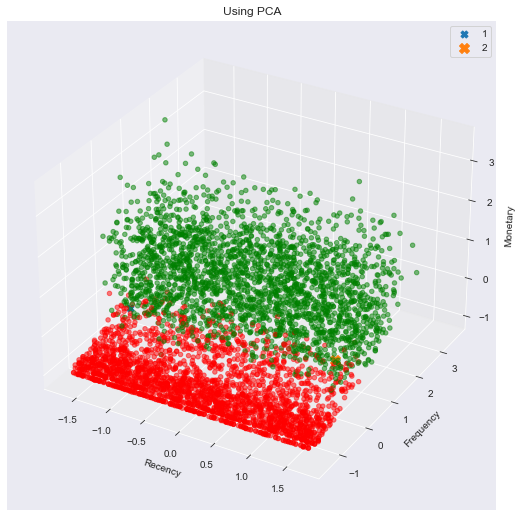

In [142]:
cluster0_RFM = df_KMeans_PCA_scaled[df_KMeans_PCA_scaled['KMeans_Cluster'] == 0]
cluster1_RFM = df_KMeans_PCA_scaled[df_KMeans_PCA_scaled['KMeans_Cluster'] == 1]


centroids_RFM = KMean_clust.cluster_centers_

centroid_0_R = centroids_RFM[0,0]
centroid_0_F = centroids_RFM[0,1]
centroid_0_M = centroids_RFM[0,2]

centroid_1_R = centroids_RFM[1,0]
centroid_1_F = centroids_RFM[1,1]
centroid_1_M = centroids_RFM[1,2]

#Plot 3D 
fig = plt.figure(figsize=(18, 9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_KMeans_PCA_scaled['Recency'], df_KMeans_PCA_scaled['Frequency'], df_KMeans_PCA_scaled['Monetary'], alpha=0.5, c=df_KMeans_PCA_scaled["Cluster_Color"])
ax.scatter(centroid_0_R,centroid_0_F,centroid_0_M, marker='X', s=50, label = '1')
ax.scatter(centroid_1_R,centroid_1_F,centroid_1_M, marker='X', s=100,  label = '2')
ax.set_title('Using PCA')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.legend();
plt.show()

#### 4.1.3.8 - Comparing PCS with no PCA

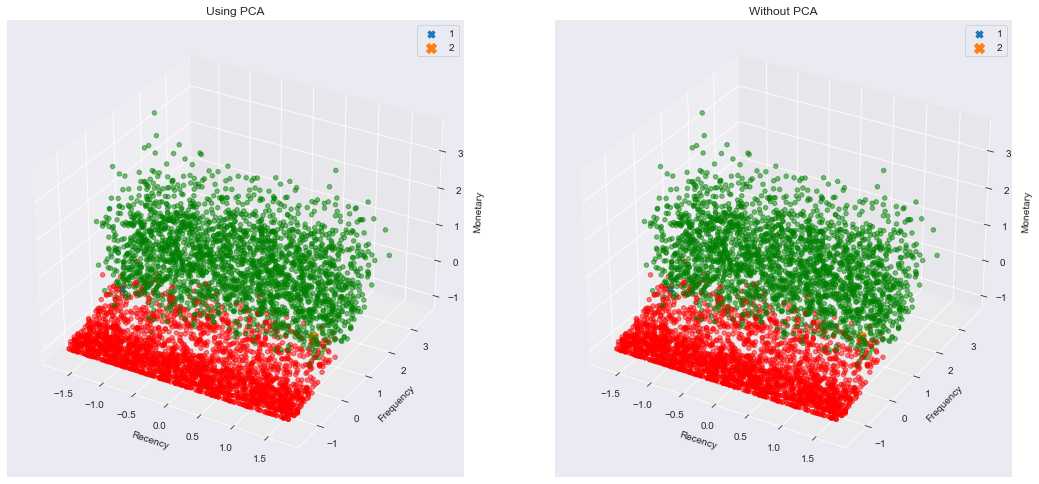

In [143]:
fig = plt.figure(figsize=(18, 9))
ax = fig.add_subplot(121, projection='3d')

ax.scatter(df_KMeans_PCA_scaled['Recency'], df_KMeans_PCA_scaled['Frequency'], df_KMeans_PCA_scaled['Monetary'], alpha=0.5, c=df_KMeans_PCA_scaled["Cluster_Color"])
ax.scatter(centroid_0_R,centroid_0_F,centroid_0_M, marker='X', s=50, label = '1')
ax.scatter(centroid_1_R,centroid_1_F,centroid_1_M, marker='X', s=100,  label = '2')
ax.set_title('Using PCA')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.legend();


ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(df_KMeans_scaled['Recency'], df_KMeans_scaled['Frequency'], df_KMeans_scaled['Monetary'], alpha=0.5, c=df_KMeans_PCA_scaled["Cluster_Color"])
ax2.scatter(centroid_0_R,centroid_0_F,centroid_0_M, marker='X', s=50, label = '1')
ax2.scatter(centroid_1_R,centroid_1_F,centroid_1_M, marker='X', s=100,  label = '2')
ax2.set_title('Without PCA')
ax2.set_xlabel('Recency')
ax2.set_ylabel('Frequency')
ax2.set_zlabel('Monetary')
ax2.legend();

plt.show()

#### 4.1.3.9 - Merge with raw dataset to plot some dimensions

In [144]:
df_KMeans_final = df_raw.merge(df_KMeans_PCA_scaled[['KMeans_Cluster', 'Cluster_Color']], left_index=True, right_index=True) 
df_KMeans_final.head(3)

Education    Income  Region  Recency  MntGroceries  MntStationery  \
Card_ID                                                                       
10003075          1   90782.0       0       66     24.939928       8.366600   
10003076          2  113023.0       2        6     31.843367       3.872983   
10003078          2   93571.0       0       10     25.278449       9.380832   

          MntHouseKeeping  MntWellness_&_Beauty  MntElectronics_&_Supplies  \
Card_ID                                                                      
10003075        26.038433              3.316625                   7.141428   
10003076        25.357445              8.602325                   6.000000   
10003078        13.601471              8.000000                   7.280110   

          MntLimitedEdition  ...  NumWebVisitsMonth  Freq  Age  Seniority  \
Card_ID                      ...                                            
10003075           5.830952  ...                  4    30   40        240   
10003076           6.000000  ...                  1    22   28         74   
10003078          12.649111  ...                  5    34   39        344   

          Total_Mnt  Campaign Acceptance  Num_family  Gender  KMeans_Cluster  \
Card_ID                                                                        
10003075     1466.0                  0.2           2       0               1   
10003076     1818.0                  0.0           1       0               1   
10003078     1189.0                  0.0           2       0               1   

          Cluster_Color  
Card_ID                  
10003075          green  
10003076          green  
10003078          green  

[3 rows x 24 columns]

#### 4.1.3.11 - Explore Merged Dataset to check stats about the clusters

Cluster 0

In [145]:
df_KMeans_final[df_KMeans_final["KMeans_Cluster"] == 0].describe().T

count          mean           std      min  \
Education                  2449.0      1.158432      0.891254      0.0   
Income                     2449.0  48412.567579  16214.539298  10000.0   
Region                     2449.0      1.017967      0.815798      0.0   
Recency                    2449.0     49.110657     28.796779      0.0   
MntGroceries               2449.0      7.068233      4.603439      0.0   
MntStationery              2449.0      1.940589      1.755750      0.0   
MntHouseKeeping            2449.0      5.235924      2.776456      0.0   
MntWellness_&_Beauty       2449.0      2.225848      1.923334      0.0   
MntElectronics_&_Supplies  2449.0      2.208886      1.852495      0.0   
MntLimitedEdition          2449.0      4.221477      2.612868      0.0   
NumDealsPurchases          2449.0      2.228256      1.372198      1.0   
NumWebPurchases            2449.0      8.485504      1.618133      6.0   
NumCatalogPurchases        2449.0      2.688853      0.861984      2.0   
NumStorePurchases          2449.0      3.519804      1.307234      2.0   
NumWebVisitsMonth          2449.0      6.363414      1.746444      0.0   
Freq                       2449.0     16.922417      3.975582     12.0   
Age                        2449.0     44.994283     10.924539     21.0   
Seniority                  2449.0    325.585137    198.971652      1.0   
Total_Mnt                  2449.0    154.717436    151.147150      9.0   
Campaign Acceptance        2449.0      0.019763      0.060780      0.0   
Num_family                 2449.0      2.926909      0.836249      1.0   
Gender                     2449.0      0.341772      0.474401      0.0   
KMeans_Cluster             2449.0      0.000000      0.000000      0.0   

                                    25%           50%           75%  \
Education                      0.000000      1.000000      2.000000   
Income                     36320.000000  48736.000000  60211.000000   
Region                         0.000000      1.000000      2.000000   
Recency                       24.000000     49.000000     74.000000   
MntGroceries                   3.464102      5.830952      9.695360   
MntStationery                  1.000000      1.732051      2.645751   
MntHouseKeeping                3.162278      4.472136      6.557439   
MntWellness_&_Beauty           1.414214      2.000000      3.162278   
MntElectronics_&_Supplies      1.414214      2.000000      3.162278   
MntLimitedEdition              2.236068      3.741657      5.385165   
NumDealsPurchases              1.000000      2.000000      3.000000   
NumWebPurchases                7.000000      8.000000      9.000000   
NumCatalogPurchases            2.000000      3.000000      3.000000   
NumStorePurchases              3.000000      3.000000      4.000000   
NumWebVisitsMonth              5.000000      7.000000      8.000000   
Freq                          14.000000     16.000000     19.000000   
Age                           37.000000     44.000000     53.000000   
Seniority                    153.000000    313.000000    492.000000   
Total_Mnt                     51.000000     90.000000    221.000000   
Campaign Acceptance            0.000000      0.000000      0.000000   
Num_family                     2.000000      3.000000      3.000000   
Gender                         0.000000      0.000000      1.000000   
KMeans_Cluster                 0.000000      0.000000      0.000000   

                                    max  
Education                      2.000000  
Income                     91740.000000  
Region                         2.000000  
Recency                       99.000000  
MntGroceries                  27.549955  
MntStationery                 11.532563  
MntHouseKeeping               21.095023  
MntWellness_&_Beauty          12.845233  
MntElectronics_&_Supplies     13.266499  
MntLimitedEdition             17.204651  
NumDealsPurchases             10.000000  
NumWebPurchases               16.000000  


Cluster 1

In [146]:
df_KMeans_final[df_KMeans_final["KMeans_Cluster"] == 1].describe().T

count          mean           std           min  \
Education                  2386.0      1.355407      0.838441      0.000000   
Income                     2386.0  91832.817687  16214.319772  43537.000000   
Region                     2386.0      1.013831      0.812518      0.000000   
Recency                    2386.0     50.084241     29.186425      0.000000   
MntGroceries               2386.0     25.274514      6.843035      8.774964   
MntStationery              2386.0      6.061793      3.530320      0.000000   
MntHouseKeeping            2386.0     17.270544      6.900756      3.741657   
MntWellness_&_Beauty       2386.0      6.550178      3.836604      0.000000   
MntElectronics_&_Supplies  2386.0      6.554733      3.924371      0.000000   
MntLimitedEdition          2386.0      8.218521      3.654286      0.000000   
NumDealsPurchases          2386.0      2.410729      2.155145      0.000000   
NumWebPurchases            2386.0     11.821878      2.384550      7.000000   
NumCatalogPurchases        2386.0      6.701174      2.556033      3.000000   
NumStorePurchases          2386.0      8.317267      2.732737      3.000000   
NumWebVisitsMonth          2386.0      4.093462      2.309415      0.000000   
Freq                       2386.0     29.251048      4.528717     18.000000   
Age                        2386.0     49.601844     12.194678     20.000000   
Seniority                  2386.0    373.418273    203.398650      1.000000   
Total_Mnt                  2386.0   1277.553227    539.663036    268.000000   
Campaign Acceptance        2386.0      0.102598      0.168958      0.000000   
Num_family                 2386.0      2.303018      0.840764      1.000000   
Gender                     2386.0      0.318525      0.466002      0.000000   
KMeans_Cluster             2386.0      1.000000      0.000000      1.000000   

                                    25%           50%            75%  \
Education                      1.000000      2.000000       2.000000   
Income                     80118.500000  91713.000000  104075.750000   
Region                         0.000000      1.000000       2.000000   
Recency                       25.000000     50.000000      75.000000   
MntGroceries                  20.149442     24.979992      30.099834   
MntStationery                  3.605551      5.656854       8.544004   
MntHouseKeeping               11.661904     16.340135      22.605309   
MntWellness_&_Beauty           3.872983      6.164414       9.273618   
MntElectronics_&_Supplies      3.872983      6.164414       9.273618   
MntLimitedEdition              5.656854      7.681146      10.677078   
NumDealsPurchases              1.000000      1.000000       3.000000   
NumWebPurchases               10.000000     12.000000      13.000000   
NumCatalogPurchases            5.000000      6.000000       8.000000   
NumStorePurchases              6.000000      8.000000      11.000000   
NumWebVisitsMonth              2.000000      4.000000       6.000000   
Freq                          26.000000     29.000000      32.000000   
Age                           41.000000     50.000000      59.000000   
Seniority                    200.250000    382.000000     554.000000   
Total_Mnt                    853.000000   1215.000000    1645.750000   
Campaign Acceptance            0.000000      0.000000       0.200000   
Num_family                     2.000000      2.000000       3.000000   
Gender                         0.000000      0.000000       1.000000   
KMeans_Cluster                 1.000000      1.000000       1.000000   

                                     max  
Education                       2.000000  
Income                     136213.000000  
Region                          2.000000  
Recency                        99.000000  
MntGroceries                   42.414620  
MntStationery                  14.106736  
MntHouseKeeping                33.060551  
MntWellness_&_Beauty           15.459625  
MntElectronics_

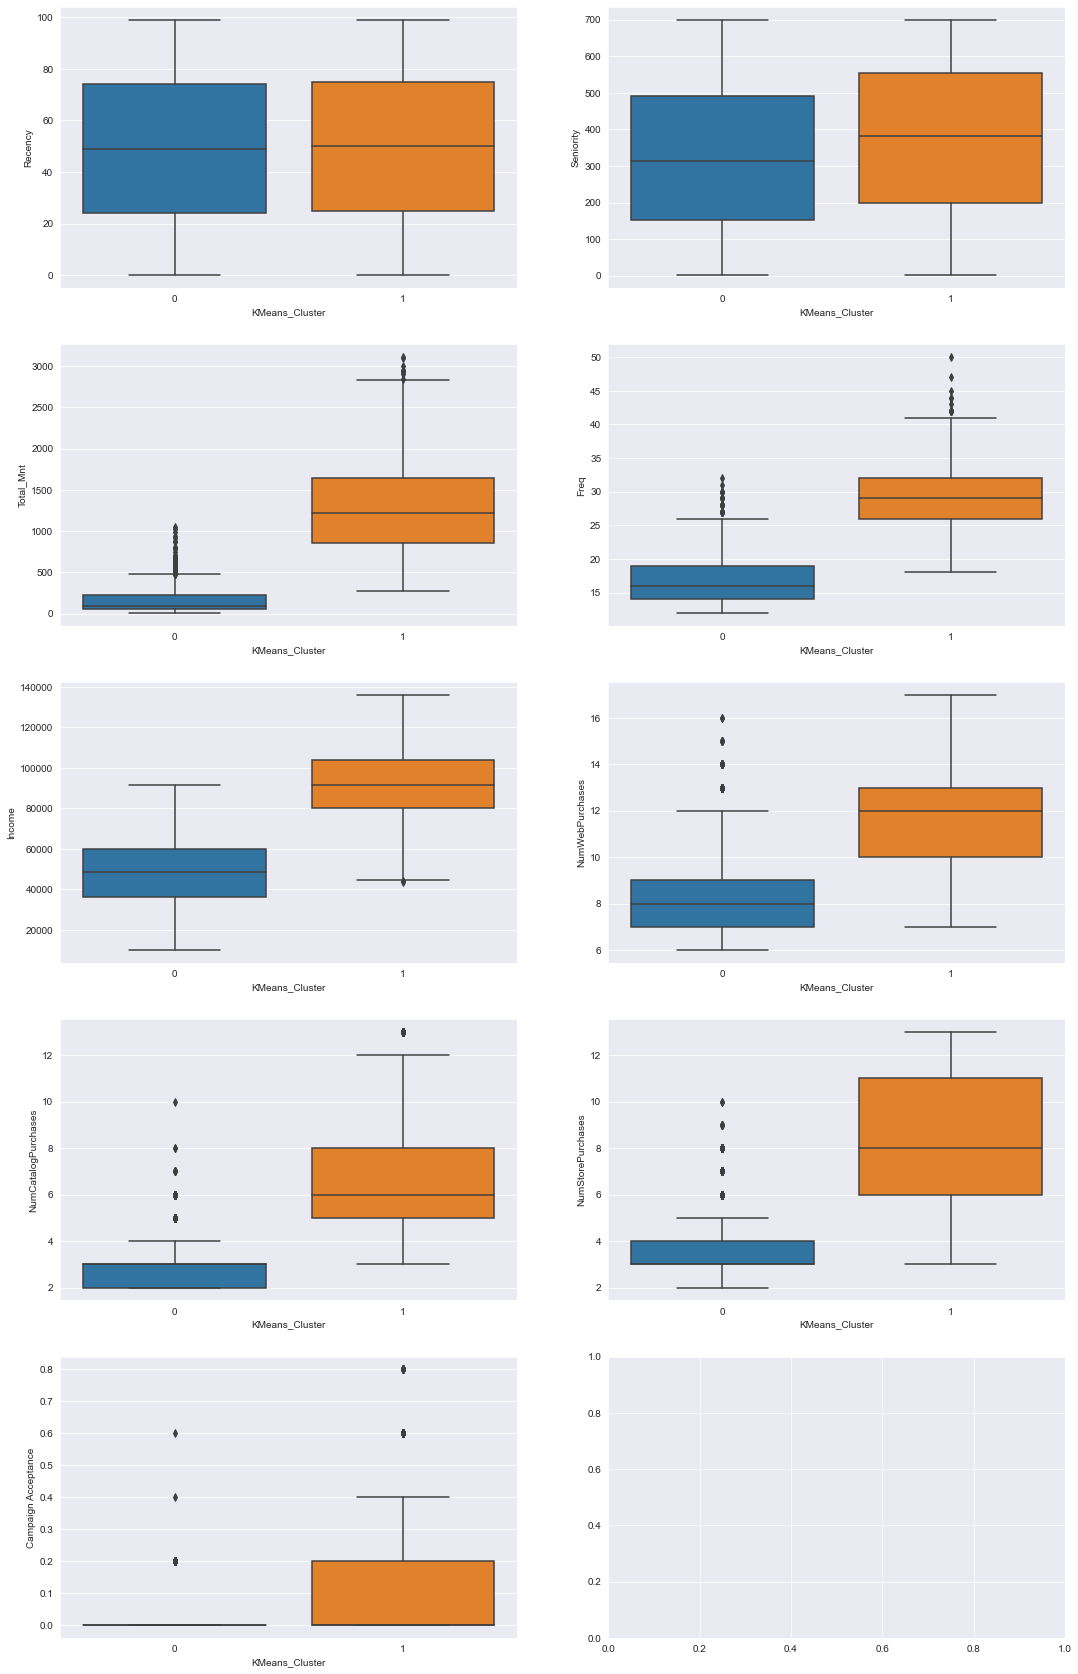

In [147]:
_fig = plot_clusters_correlations(df_KMeans_final, 'KMeans_Cluster', [
                                        'Recency', 
                                        'Seniority',
                                        'Total_Mnt', 
                                        'Freq',
                                        'Income',
                                        'NumWebPurchases',
                                        'NumCatalogPurchases',
                                        'NumStorePurchases',
                                        'Campaign Acceptance'
                                       ])


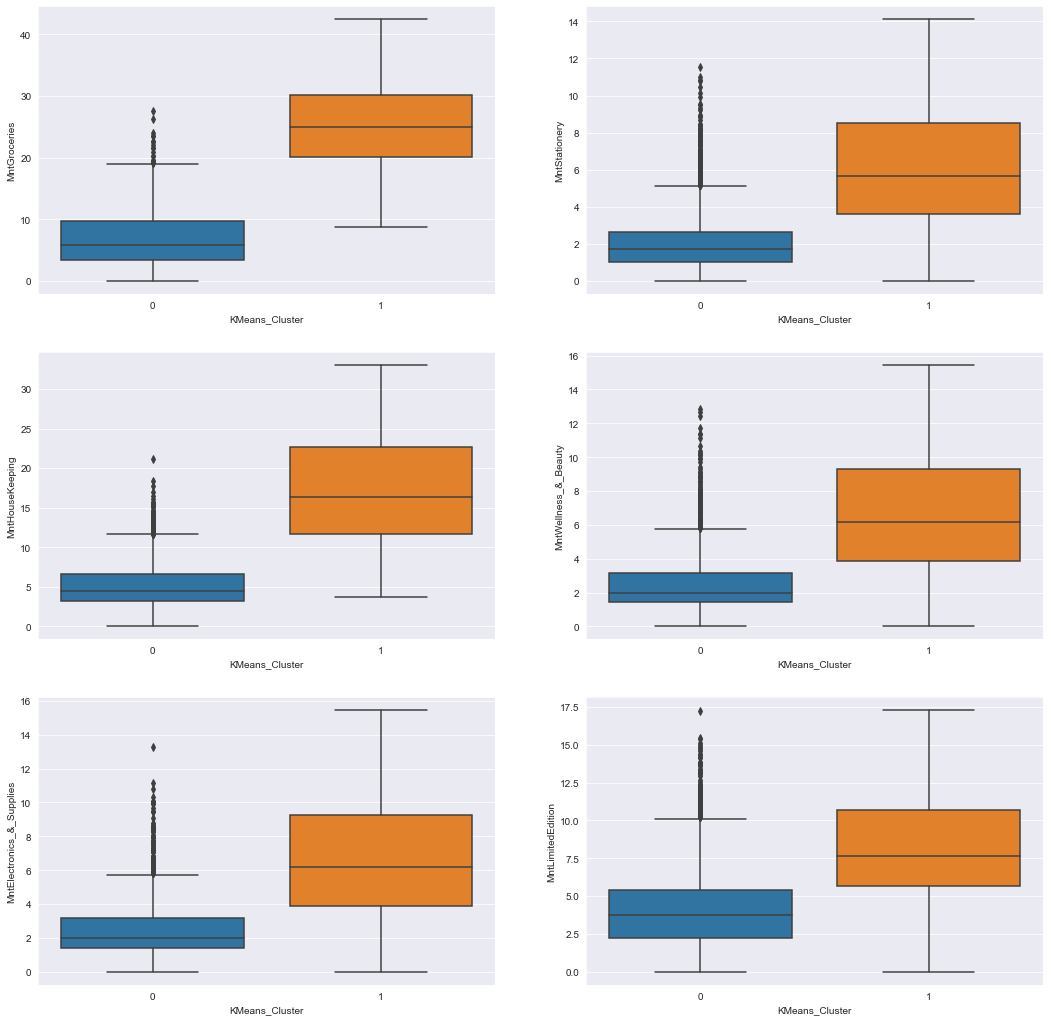

In [148]:
_fig = plot_clusters_correlations(df_KMeans_final, 'KMeans_Cluster', [
                                        'MntGroceries', 'MntStationery',
       'MntHouseKeeping', 'MntWellness_&_Beauty', 'MntElectronics_&_Supplies',
       'MntLimitedEdition'])

#### 4.1.3.13 - Synthesizing results for PCA + KMeans

The clusters are balanced in number (2453 and 2381) and recency (average of 50 days since last purchase)

__Cluster 0 (2386 elements)__

    Those who spend less have average income and buy less 
 	
	On average they:
	- are part of a family of 3 elements
	- has a family income of 48k
	- has known the brand for less than a year. Average of 325 days.
	- spent a total of 155 in 16 purchases

-----


__Cluster 1 (2449 elements):__  
	
    Those who spend more, have a higher income and make more purchases  
	Those who, although they have a low level of acceptance of fields, are more likely to accept  

	On average they:
	- Are part of a family of 2 elements
	- has a family income of 92k
	- has known the brand for over a year. Average of 373 days.
	- Spent a total of 1280 in 29 purchases

## 4.2. Product Usage Perspective <a class="anchor" id="product"></a>

- In this section, the customer segmentation based on the product usage is explored.
- The company sells products from 5 major categories: Groceries, Stationery, Housekeeping, Wellness & Beauty and Electronics & Supplies. These categories can additionally be divided into Basic collection and Limited Edition collection.
- The above mentioned variables are used to analyse the customers based on the products they purchase.

__Step 1:__ Filter the necessary columns for the Product Usage Perspective analysis. 

In [116]:
df_prod = df_proc[['MntGroceries', 'MntStationery', 'MntHouseKeeping', 'MntWellness_&_Beauty',  
                   'MntElectronics_&_Supplies', 'MntLimitedEdition']].copy()
df_prod = df_prod.rename({'MntWellness_&_Beauty': 'MntWellness', 'MntElectronics_&_Supplies': 'MntElectronics'}, axis=1)

df_prod.head()

MntGroceries  MntStationery  MntHouseKeeping  MntWellness  \
Card_ID                                                               
10003075     24.939928       8.366600        26.038433     3.316625   
10003076     31.843367       3.872983        25.357445     8.602325   
10003078     25.278449       9.380832        13.601471     8.000000   
10003079     28.390139       7.483315        18.708287     7.348469   
10003080      5.656854       1.000000         5.385165     1.414214   

          MntElectronics  MntLimitedEdition  
Card_ID                                      
10003075        7.141428           5.830952  
10003076        6.000000           6.000000  
10003078        7.280110          12.649111  
10003079        7.348469          16.124515  
10003080        0.000000           4.472136

__Step 2:__ Visualize the boxplots and histplots of the 6 variables to check in any inconsistency stands out.

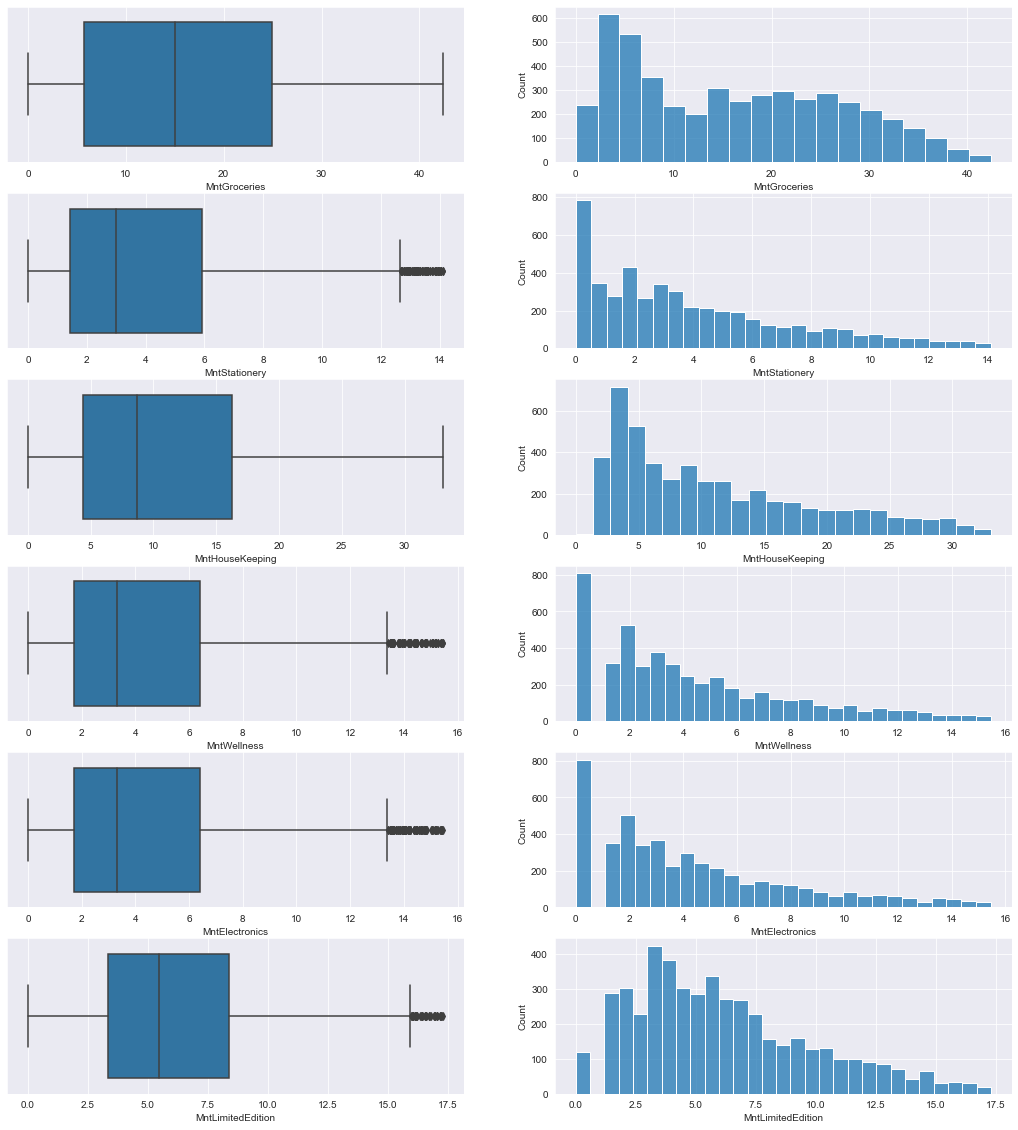

In [117]:
fig, axes = plt.subplots(6, 2, sharex=False, figsize=(18,20))

sns.boxplot(ax=axes[0, 0], x = 'MntGroceries', data = df_prod)
sns.histplot(ax=axes[0, 1], x=df_prod['MntGroceries'], kde=False)

sns.boxplot(ax=axes[1, 0], x = 'MntStationery', data = df_prod)
sns.histplot(ax=axes[1, 1], x=df_prod['MntStationery'], kde=False)

sns.boxplot(ax=axes[2, 0], x = 'MntHouseKeeping', data = df_prod)
sns.histplot(ax=axes[2, 1], x=df_prod['MntHouseKeeping'], kde=False)

sns.boxplot(ax=axes[3, 0], x = 'MntWellness', data = df_prod)
sns.histplot(ax=axes[3, 1], x=df_prod['MntWellness'], kde=False)

sns.boxplot(ax=axes[4, 0], x = 'MntElectronics', data = df_prod)
sns.histplot(ax=axes[4, 1], x=df_prod['MntElectronics'], kde=False)

sns.boxplot(ax=axes[5, 0], x = 'MntLimitedEdition', data = df_prod)
sns.histplot(ax=axes[5, 1], x=df_prod['MntLimitedEdition'], kde=False)

plt.show()

__Step 3:__ Standardize the data using `StandardScaler()` and convert it back to the dataframe.

In [118]:
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(df_prod)

df_prod = pd.DataFrame(Scaled_Data, index = df_prod.index, columns = df_prod.columns)
df_prod.head()

MntGroceries  MntStationery  MntHouseKeeping  MntWellness  \
Card_ID                                                               
10003075      0.822740       1.270376         1.863858    -0.280743   
10003076      1.461834      -0.029316         1.778463     1.141711   
10003078      0.854079       1.563723         0.304295     0.979617   
10003079      1.142147       1.014903         0.944676     0.804281   
10003080     -0.962413      -0.860271        -0.726009    -0.792708   

          MntElectronics  MntLimitedEdition  
Card_ID                                      
10003075        0.743643          -0.096889  
10003076        0.439183          -0.051769  
10003078        0.780635           1.722927  
10003079        0.798869           2.650538  
10003080       -1.161236          -0.459567

__Step 4__: Try identifying the right number of clusters based on the results of the K-means inertia graph (Elbow Method).

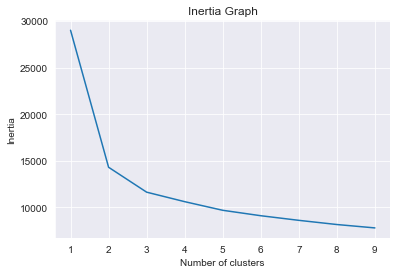

In [119]:
# Create a 'KMeans' instance called 'model' with 'k' clusters.
# Fit the model to the data.
# Append the value of the 'inertia' attribute of 'model' to the list 'inertias'.
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot().

ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    
    model.fit(df_prod)
    
    inertias.append(model.inertia_)
     
plt.plot(ks, inertias)

plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("Inertia Graph")

plt.xticks(ks)

plt.show()

It is observed that 3 seems to be a good number of clusters, since this is the point where the inertia begins to decrease slower. Nonetheless, it is always good practice to measure the quality of clustering with different numbers of clusters and check if the nearest values can be better solutions. So, the possibility of 4 clusters is also tested, keeping in mind that lower values are better.

### 4.2.1. K-Means with three clusters <a class="anchor" id="kmeans2"></a>

__Step 1__: Run the K-means algorithm with K=3.

In [120]:
# Create a 'KMeans' instance called 'model_k3' to find '3' clusters.
# Use the .fit() method to fit the model to the dataframe df_prod.
# Create a new column in the dataframe named label, which will store the cluster number that each observation belongs to.

model_k3 = KMeans(n_clusters=3, random_state = 100)

df_prod_k3 = df_prod.copy()

model_k3.fit(df_prod_k3)

df_prod_k3['label'] = model_k3.labels_

__Step 2__: Using `.mean()`, obtain the centroid value for each cluster or with `.describe()`, obtain the descriptive statistics that summarize the central tendency, dispersion and shape for each cluster.

In [121]:
df_prod_k3.groupby(['label']).mean().transpose()

label                     0         1         2
MntGroceries       0.573331  0.863603 -0.858526
MntStationery     -0.000530  1.226829 -0.701589
MntHouseKeeping    0.163558  1.258240 -0.823857
MntWellness       -0.011383  1.220380 -0.691000
MntElectronics    -0.025714  1.225605 -0.684881
MntLimitedEdition  0.461282  0.729828 -0.710766

In [122]:
df_prod_k3.groupby(['label']).describe().transpose()

label                              0            1            2
MntGroceries      count  1392.000000  1253.000000  2190.000000
                  mean      0.573331     0.863603    -0.858526
                  std       0.767062     0.666187     0.455750
                  min      -1.279096    -1.032574    -1.486103
                  25%      -0.012866     0.411144    -1.179063
                  50%       0.537908     0.854079    -0.987565
                  75%       1.132346     1.343156    -0.689733
                  max       2.427362     2.440480     1.216106
MntStationery     count  1392.000000  1253.000000  2190.000000
                  mean     -0.000530     1.226829    -0.701589
                  std       0.675356     0.858457     0.378753
                  min      -1.149502    -1.149502    -1.149502
                  25%      -0.384269     0.561611    -1.149502
                  50%      -0.029316     1.235556    -0.740468
                  75%       0.434680     1.842324    -0.502762
                  max       2.462989     2.930600     1.217954
MntHouseKeeping   count  1392.000000  1253.000000  2190.000000
                  mean      0.163558     1.258240    -0.823857
                  std       0.563982     0.767829     0.259172
                  min      -0.985398    -0.588626    -1.401295
                  25%      -0.253724     0.689498    -1.025102
                  50%       0.066445     1.273524    -0.876773
                  75%       0.471288     1.859038    -0.691940
                  max       2.457606     2.744413     0.521011
MntWellness       count  1392.000000  1253.000000  2190.000000
                  mean     -0.011383     1.220380    -0.691000
                  std       0.680087     0.868609     0.391221
                  min      -1.173292    -1.173292    -1.173292
                  25%      -0.365951     0.570763    -1.173292
                  50%      -0.063708     1.188170    -0.707174
                  75%       0.395896     1.871381    -0.412124
                  max       2.726535     2.987104     1.188170
MntElectronics    count  1392.000000  1253.000000  2190.000000
                  mean     -0.025714     1.225605    -0.684881
                  std       0.667618     0.889100     0.379344
                  min      -1.161236    -1.161236    -1.161236
                  25%      -0.406792     0.567414    -1.161236
                  50%      -0.061454     1.179367    -0.699235
                  75%       0.394091     1.880028    -0.507868
                  max       2.777081     2.962410     1.239392
MntLimitedEdition count  1392.000000  1253.000000  2190.000000
                  mean      0.461282     0.729828    -0.710766
                  std       0.892039     0.971314     0.466793
                  min      -1.653213    -1.653213    -1.653213
                  25%      -0.167136    -0.007886    -1.056390
                  50%       0.361893     0.595788    -0.767981
                  75%       1.081773     1.401681    -0.401306
                  max       2.923294     2.962046     0.850600

__Step 3__: Check clusters distribution on a scatter plot.

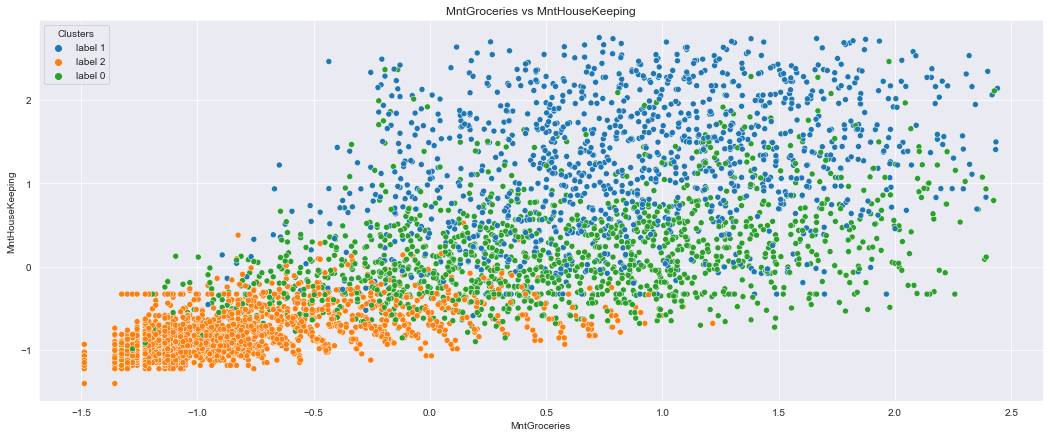

In [123]:
Clusters = ["label 0", "label 1", "label 2"]
df_prod_k3['Clusters'] = df_prod_k3['label'].map(lambda p: Clusters[p])

fig, axes = plt.subplots(sharex=False, figsize=(18,7))

sns.scatterplot(ax=axes, x= 'MntGroceries', y='MntHouseKeeping', hue='Clusters', data=df_prod_k3)

plt.title("MntGroceries vs MntHouseKeeping")

plt.show()

__Step 4__: Check the distance between the different clusters using `euclidean distances`.

In [124]:
dists = euclidean_distances(model_k3.cluster_centers_)
dists

array([[0.        , 2.43858706, 2.40535273],
       [2.43858706, 0.        , 4.52220769],
       [2.40535273, 4.52220769, 0.        ]])

We can conclude that:
- The nearest cluster to Cluster 0 is Cluster 2.
- The nearest cluster to Cluster 1 is Cluster 0.
- The nearest cluster to Cluster 2 is Cluster 0.
- Cluster 1 and Cluster 2 are the more distant ones.

__Step 5__: Create a dataframe that will be composed by the customers of each cluster, and plot the histograms that will show the distribution of the variable 'MntGroceries' for each cluster, using `sns.histplot()`.

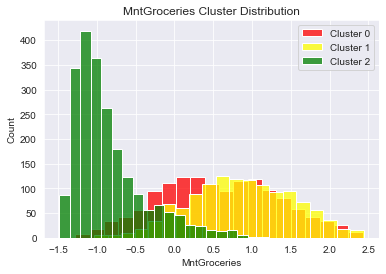

In [125]:
cluster0 = df_prod_k3[df_prod_k3.label==0]
cluster1 = df_prod_k3[df_prod_k3.label==1]
cluster2 = df_prod_k3[df_prod_k3.label==2]

# Plot the data regarding cluster 0, 1 and 2, and define the color and label.
sns.histplot(cluster0['MntGroceries'],color='red',label='Cluster 0', bins = 20)
sns.histplot(cluster1['MntGroceries'],color='yellow',label='Cluster 1', bins = 20)
sns.histplot(cluster2['MntGroceries'],color='green',label='Cluster 2', bins = 20)

plt.legend()
plt.title("MntGroceries Cluster Distribution")
plt.show()

__Step 6__: Obtain the coordinates of the centroids using the `.cluster_centers_` and assign them to centroids.

In [126]:
centroids = model_k3.cluster_centers_
centroids

array([[ 5.70443123e-01,  7.64472464e-04,  1.65275535e-01,
        -9.83926841e-03, -2.21278633e-02,  4.58093403e-01],
       [ 8.66348852e-01,  1.22957283e+00,  1.25928914e+00,
         1.22294192e+00,  1.22539989e+00,  7.34201988e-01],
       [-8.58373120e-01, -7.02057759e-01, -8.24002768e-01,
        -6.91507081e-01, -6.85067080e-01, -7.11272164e-01]])

__Step 7__: Extract the individual values by using the results stored in centroids, and plot the clusters distribution on a scatter plot.

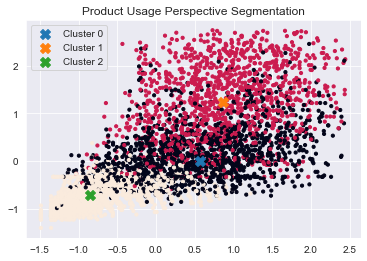

In [127]:
# Save the centroid values concerning the variables MntGroceries, MntHouseKeeping and Stationery.
centroid_0_MntGroceries = centroids[0,0]
centroid_0_MntHouseKeeping = centroids[0,1]
centroid_0_Stationery = centroids[0,2]
centroid_1_MntGroceries = centroids[1,0]
centroid_1_MntHouseKeeping = centroids[1,1]
centroid_1_Stationery = centroids[1,2]
centroid_2_MntGroceries = centroids[2,0]
centroid_2_MntHouseKeeping = centroids[2,1]
centroid_2_Stationery = centroids[2,2]

# Plot df_prod_k3['MntGroceries'] and df_prod_k3['MntHouseKeeping']. 
# Define the parameter c=df_prod['label'] to color each cluster and s=10 to define the size of the points.
# Plot the centroids and use 'X' as a mark and s=100 to define the size.
plt.scatter(df_prod_k3.MntGroceries, df_prod_k3.MntHouseKeeping, c=df_prod_k3.label, s=10)
plt.scatter(centroid_0_MntGroceries, centroid_0_MntHouseKeeping, marker='X', s=100, label='Cluster 0')
plt.scatter(centroid_1_MntGroceries, centroid_1_MntHouseKeeping, marker='X', s=100, label='Cluster 1')
plt.scatter(centroid_2_MntGroceries, centroid_2_MntHouseKeeping, marker='X', s=100, label='Cluster 2')

plt.title("Product Usage Perspective Segmentation")
plt.legend()
plt.show()

__Step 8__: For better visualization, plot the above distribution in a 3D plot.

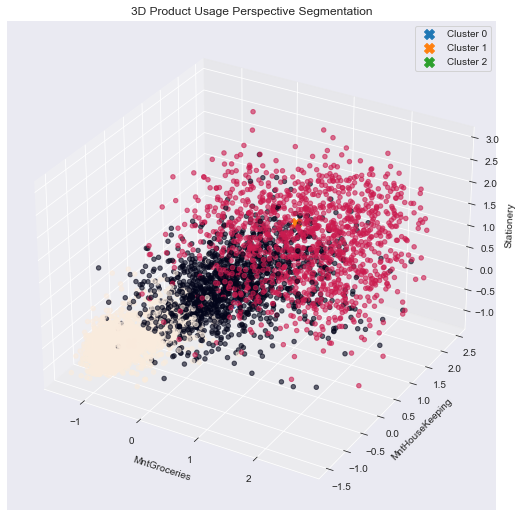

In [128]:
fig = plt.figure(figsize=(18, 9))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_prod['MntHouseKeeping'], df_prod['MntGroceries'], df_prod['MntStationery'], alpha=0.6, c=df_prod_k3.label)
ax.scatter(centroid_0_MntGroceries,centroid_0_MntHouseKeeping,centroid_0_Stationery, marker='X', s=100, label = 'Cluster 0')
ax.scatter(centroid_1_MntGroceries,centroid_1_MntHouseKeeping,centroid_1_Stationery, marker='X', s=100,  label = 'Cluster 1')
ax.scatter(centroid_2_MntGroceries,centroid_2_MntHouseKeeping,centroid_2_Stationery, marker='X', s=100,  label = 'Cluster 2')

ax.set_xlabel('MntGroceries')
ax.set_ylabel('MntHouseKeeping')
ax.set_zlabel('Stationery')
ax.legend();

plt.title("3D Product Usage Perspective Segmentation")
plt.show()

__Step 9__: Check the clusters' boxplots for each of the 6 categories.

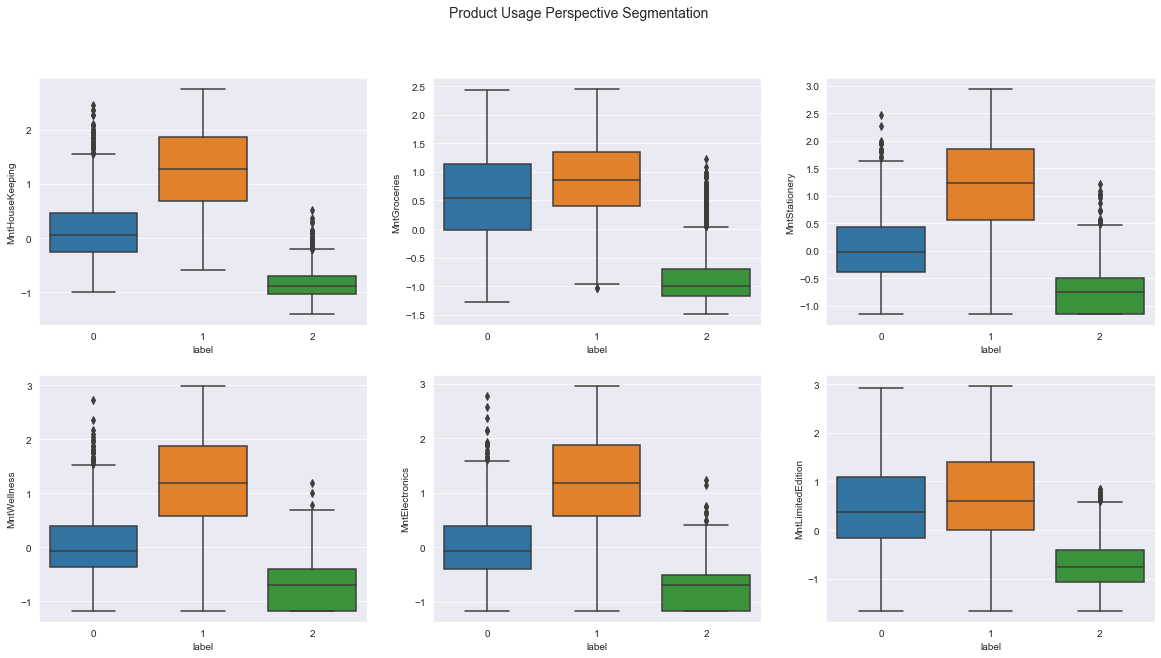

In [129]:
fig, ax = plt.subplots(figsize=(20, 10)) 
fig.suptitle("Product Usage Perspective Segmentation", fontsize=14)

plt.subplot(2,3,1)
sns.boxplot(x='label', y="MntHouseKeeping",data=df_prod_k3)

plt.subplot(2,3,2)
sns.boxplot(x='label', y="MntGroceries",data=df_prod_k3)

plt.subplot(2,3,3)
sns.boxplot(x='label', y="MntStationery",data=df_prod_k3)

plt.subplot(2,3,4)
sns.boxplot(x='label', y="MntWellness",data=df_prod_k3)

plt.subplot(2,3,5)
sns.boxplot(x='label', y="MntElectronics",data=df_prod_k3)

plt.subplot(2,3,6)
sns.boxplot(x='label', y="MntLimitedEdition",data=df_prod_k3)

plt.show()

__Step 10__: Concatenate different perspectives with other dataframe variables, in order to obtain a "full-overview" of the customers.

In [130]:
df_prod_final = pd.concat([df_proc, df_prod_k3['label']], axis=1)
df_prod_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4835 entries, 10003075 to 10013073
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Education                  4835 non-null   int8   
 1   Income                     4835 non-null   float64
 2   Region                     4835 non-null   int8   
 3   Recency                    4835 non-null   int64  
 4   MntGroceries               4835 non-null   float64
 5   MntStationery              4835 non-null   float64
 6   MntHouseKeeping            4835 non-null   float64
 7   MntWellness_&_Beauty       4835 non-null   float64
 8   MntElectronics_&_Supplies  4835 non-null   float64
 9   MntLimitedEdition          4835 non-null   float64
 10  NumDealsPurchases          4835 non-null   int64  
 11  NumWebPurchases            4835 non-null   int64  
 12  NumCatalogPurchases        4835 non-null   int64  
 13  NumStorePurchases          4835 non-n

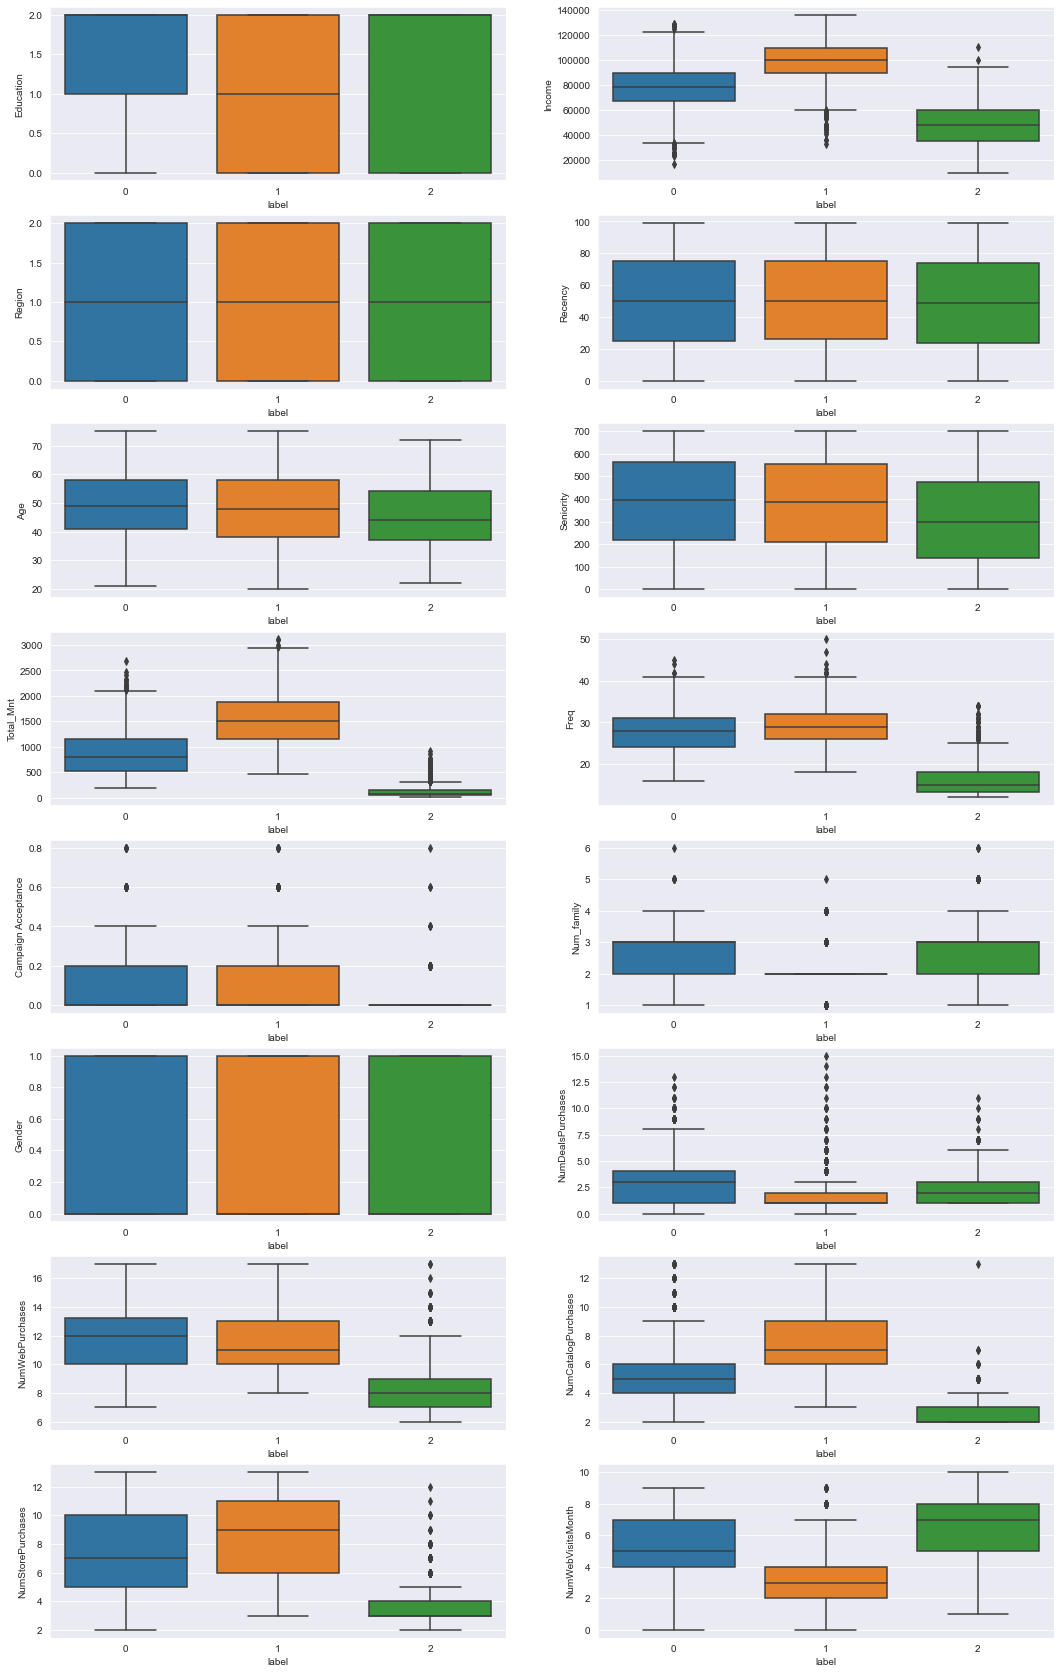

In [131]:
fig, axes = plt.subplots(8, 2, sharex=False, figsize=(18, 30))

sns.boxplot(ax=axes[0, 0], x = 'label', y = 'Education', data = df_prod_final)
sns.boxplot(ax=axes[0, 1], x = 'label', y = 'Income', data = df_prod_final)
sns.boxplot(ax=axes[1, 0], x = 'label', y = 'Region', data = df_prod_final)
sns.boxplot(ax=axes[1, 1], x = 'label', y = 'Recency', data = df_prod_final)
sns.boxplot(ax=axes[2, 0], x = 'label', y = 'Age', data = df_prod_final)
sns.boxplot(ax=axes[2, 1], x = 'label', y = 'Seniority', data = df_prod_final)
sns.boxplot(ax=axes[3, 0], x = 'label', y = 'Total_Mnt', data = df_prod_final)
sns.boxplot(ax=axes[3, 1], x = 'label', y = 'Freq', data = df_prod_final)
sns.boxplot(ax=axes[4, 0], x = 'label', y = 'Campaign Acceptance', data = df_prod_final)
sns.boxplot(ax=axes[4, 1], x = 'label', y = 'Num_family', data = df_prod_final) 
sns.boxplot(ax=axes[5, 0], x = 'label', y = 'Gender', data = df_prod_final)

sns.boxplot(ax=axes[5, 1], x = 'label', y = 'NumDealsPurchases', data = df_prod_final)
sns.boxplot(ax=axes[6, 0], x = 'label', y = 'NumWebPurchases', data = df_prod_final)
sns.boxplot(ax=axes[6, 1], x = 'label', y = 'NumCatalogPurchases', data = df_prod_final)
sns.boxplot(ax=axes[7, 0], x = 'label', y = 'NumStorePurchases', data = df_prod_final)
sns.boxplot(ax=axes[7, 1], x = 'label', y = 'NumWebVisitsMonth', data = df_prod_final)
            
plt.show()

In [132]:
df_prod_final.groupby(['label']).mean().transpose()

label                                 0             1             2
Education                      1.380029      1.181963      1.218721
Income                     78199.065374  98701.590583  48013.373973
Region                         1.033764      1.033520      0.994521
Recency                       50.225575     50.130088     48.879452
MntGroceries                  22.245835     25.381332      6.779033
MntStationery                  3.972509      8.216037      1.548636
MntHouseKeeping               12.479144     21.208851      4.604857
MntWellness_&_Beauty           4.317540      8.894652      1.792151
MntElectronics_&_Supplies      4.257092      8.948311      1.785867
MntLimitedEdition              7.922205      8.928344      3.530988
NumDealsPurchases              3.146552      1.697526      2.147032
NumWebPurchases               11.844109     11.448524      8.290411
NumCatalogPurchases            5.365661      7.578611      2.561187
NumStorePurchases              7.459770      8.524342      3.378995
NumWebVisitsMonth              5.341236      3.193136      6.353881
Freq                          27.816092     29.249002     16.377626
Age                           49.233477     48.073424     45.557991
Seniority                    384.389368    375.007981    312.045205
Total_Mnt                    883.982040   1533.185156    125.826941
Campaign Acceptance            0.078736      0.112530      0.019452
Num_family                     2.600575      2.016760      2.975342
Gender                         0.323994      0.320830      0.339726

### 4.2.2. K-Means with four clusters <a class="anchor" id="kmeans3"></a>

 Run the K-means algorithm with K=4, repeating the steps on sections 4.2.1.

In [133]:
# Create a 'KMeans' instance called 'model_k4' to find '4' clusters.
# Use the .fit() method to fit the model to the dataframe df_prod.
# Create a new column in the dataframe named label, which will store the cluster number that each observation belongs to.

model_k4 = KMeans(n_clusters=4, random_state = 100)

df_prod_k4 = df_prod.copy()

model_k4.fit(df_prod_k4)

df_prod_k4['label'] = model_k4.labels_

In [134]:
df_prod_k4.groupby(['label']).mean().transpose()

label                     0         1         2         3
MntGroceries      -0.880477  0.400455  0.767152  1.010287
MntStationery     -0.702970 -0.155520  1.438739  0.548175
MntHouseKeeping   -0.831635 -0.065448  1.205484  1.032110
MntWellness       -0.689259 -0.208091  1.344326  0.686342
MntElectronics    -0.688699 -0.157089  1.437057  0.513264
MntLimitedEdition -0.739393  0.647207  1.087997 -0.063896

In [135]:
dists = euclidean_distances(model_k4.cluster_centers_)
dists

array([[0.        , 2.22885691, 4.84261645, 3.5268597 ],
       [2.22885691, 0.        , 3.07116782, 1.95779592],
       [4.84261645, 3.07116782, 0.        , 1.86676692],
       [3.5268597 , 1.95779592, 1.86676692, 0.        ]])

We can conclude that:

- The nearest cluster to Cluster 0 is Cluster 1.
- The nearest cluster to Cluster 1 is Cluster 3.
- The nearest cluster to Cluster 2 is Cluster 3.
- All clusters are beginnng to be very close to each other, with distances below 2.

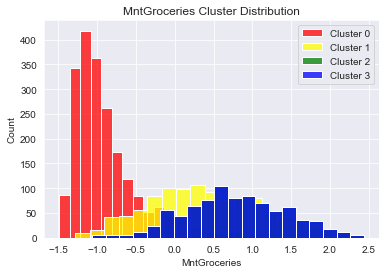

In [136]:
cluster0 = df_prod_k4[df_prod_k4.label==0]
cluster1 = df_prod_k4[df_prod_k4.label==1]
cluster2 = df_prod_k4[df_prod_k4.label==2]
cluster3 = df_prod_k4[df_prod_k4.label==3]

# Plot the data regarding cluster 0, 1, 2 and 3, and define the color and label.
sns.histplot(cluster0['MntGroceries'],color='red',label='Cluster 0', bins = 20)
sns.histplot(cluster1['MntGroceries'],color='yellow',label='Cluster 1', bins = 20)
sns.histplot(cluster2['MntGroceries'],color='green',label='Cluster 2', bins = 20)
sns.histplot(cluster2['MntGroceries'],color='blue',label='Cluster 3', bins = 20)

plt.legend()
plt.title("MntGroceries Cluster Distribution")
plt.show()

In [137]:
centroids = model_k4.cluster_centers_
centroids

array([[-0.88047722, -0.70296999, -0.83163477, -0.68925903, -0.68869868,
        -0.73939341],
       [ 0.40180127, -0.15406279, -0.06363405, -0.20670418, -0.15828963,
         0.64561483],
       [ 0.76653296,  1.43881728,  1.20572641,  1.34358854,  1.43888357,
         1.08848043],
       [ 1.01115521,  0.54994081,  1.03380145,  0.6895386 ,  0.51667032,
        -0.06350069]])

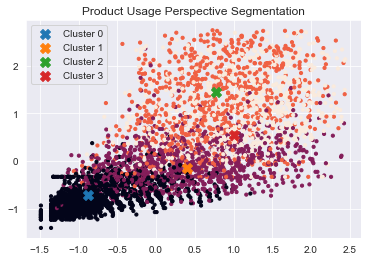

In [138]:
# Save the centroid values concerning the variables MntGroceries, MntHouseKeeping and Stationery.
centroid_0_MntGroceries = centroids[0,0]
centroid_0_MntHouseKeeping = centroids[0,1]
centroid_0_Stationery = centroids[0,2]
centroid_1_MntGroceries = centroids[1,0]
centroid_1_MntHouseKeeping = centroids[1,1]
centroid_1_Stationery = centroids[1,2]
centroid_2_MntGroceries = centroids[2,0]
centroid_2_MntHouseKeeping = centroids[2,1]
centroid_2_Stationery = centroids[2,2]
centroid_3_MntGroceries = centroids[3,0]
centroid_3_MntHouseKeeping = centroids[3,1]
centroid_3_Stationery = centroids[3,2]

# Plot df_prod_k4['MntGroceries'] and df_prod_k4['MntHouseKeeping']. 
# Define the parameter c=df_prod['label'] to color each cluster and s=10 to define the size of the points.
# Plot the centroids and use 'X' as a mark and s=100 to define the size.
plt.scatter(df_prod_k4.MntGroceries, df_prod_k4.MntHouseKeeping, c=df_prod_k4.label, s=10)
plt.scatter(centroid_0_MntGroceries, centroid_0_MntHouseKeeping, marker='X', s=100, label='Cluster 0')
plt.scatter(centroid_1_MntGroceries, centroid_1_MntHouseKeeping, marker='X', s=100, label='Cluster 1')
plt.scatter(centroid_2_MntGroceries, centroid_2_MntHouseKeeping, marker='X', s=100, label='Cluster 2')
plt.scatter(centroid_3_MntGroceries, centroid_3_MntHouseKeeping, marker='X', s=100, label='Cluster 3')

plt.title("Product Usage Perspective Segmentation")
plt.legend()
plt.show()

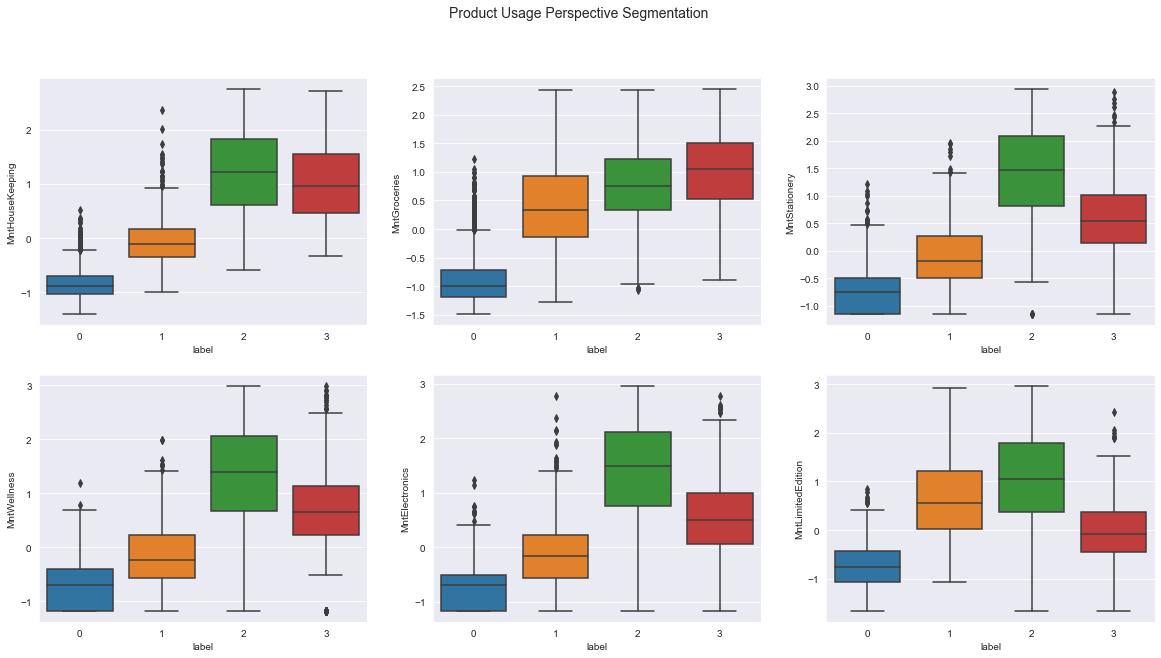

In [139]:
fig, ax = plt.subplots(figsize=(20, 10)) 
fig.suptitle("Product Usage Perspective Segmentation", fontsize=14)

plt.subplot(2,3,1)
sns.boxplot(x='label', y="MntHouseKeeping",data=df_prod_k4)

plt.subplot(2,3,2)
sns.boxplot(x='label', y="MntGroceries",data=df_prod_k4)

plt.subplot(2,3,3)
sns.boxplot(x='label', y="MntStationery",data=df_prod_k4)

plt.subplot(2,3,4)
sns.boxplot(x='label', y="MntWellness",data=df_prod_k4)

plt.subplot(2,3,5)
sns.boxplot(x='label', y="MntElectronics",data=df_prod_k4)

plt.subplot(2,3,6)
sns.boxplot(x='label', y="MntLimitedEdition",data=df_prod_k4)

plt.show()

Taking into consideration the above results, maybe it does not make sense to keep 4 different clusters, since the clusters start to present very similar behaviours, and consequently overlap when plotting the results.

The results will be discussed based only on 3 clusters.

### 4.2.3. Synthesizing results <a class="anchor" id="results2"></a>

Analysing the results for 3 clusters, we can observe the distinct customer behaviour depending on the cluster they belong to.

Cluster 0:
- Contains 1392 individuals.
- This is the cluster where customers spent moderately in all the categories, when compared to cluster 1 and 2. Nonetheless, they still spend large quantities on Groceries and Limited Edition items.
- These are also the customers, that on average, buy more products through Web and Deals.

Cluster 1:
- Contains 1253 individuals.
- These are the customers that spend more money in every category. 
- In this cluster, the number of family members is a little less than on the other clusters.
- This is the cluster where, on average, the customers also have higher incomes.

Cluster 2:
- Contains 2190 individuals.
- The customers in this cluster are the ones that spend less in every category and also, the ones that buy with less frequency.
- It is also where the average customer's income is lower.
- Curiously, it is where the individuals visit the Website more often.

## 4.3. Channels Perspective <a class="anchor" id="channels"></a>

- In this section, the customer segmentation based on the channels from which they buy the products from, is explored. 
- The company sells products from 3 different channels: Web, Store or via Catalog. 
- The deals purchases are excluded, since they do not represent a purchase channel
- Althought the number of Web visits per month is related to the channel activity, they were not included in the clustering, because they do not not relate to purchase frequency. Nevertheless, these 2 variables are used to analyze the customers' behaviour in regards to their prefered purchase channel.

__Step 1:__ Filter the necessary columns for the Product Usage Perspective analysis. 

In [140]:
df_channels = df_proc[['NumWebPurchases','NumCatalogPurchases',
                'NumStorePurchases']].copy()

__Step 2__: Try identifying the right number of clusters based on the results of the K-means inertia graph (Elbow Method).

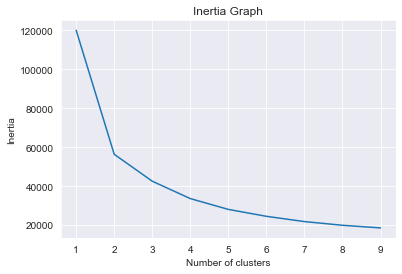

In [141]:
# Create a 'KMeans' instance called 'model' with 'k' clusters.
# Fit the model to the data.
# Append the value of the 'inertia' attribute of 'model' to the list 'inertias'.
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot().

ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)

    model.fit(df_channels)

    inertias.append(model.inertia_)
 
plt.plot(ks, inertias)

plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("Inertia Graph")

plt.xticks(ks)

plt.show()

It is observed that 2 or 3 seem to be good cluster numbers, since this is the point where the inertia begins to decrease slower. Both possibilities were tested and evaluated.

### 4.3.1. K-Means with two clusters <a class="anchor" id="kmeans4"></a>

__Step 1__: Run the K-means algorithm with K=2.

In [142]:
# Create a 'KMeans' instance called 'model_k2' to find '2' clusters.
# Use the .fit() method to fit the model to the dataframe df_prod.
# Create a new column in the dataframe named label, which will store the cluster number that each observation belongs to.

model_k2 = KMeans(n_clusters = 2, random_state = 90)

df_channel_k2 = df_channels.copy()

model_k2.fit(df_channel_k2)

df_channel_k2['label'] = model_k2.labels_

__Step 2__: Using `.mean()`, obtain the centroid value for each cluster.

In [143]:
df_channel_k2.groupby(['label']).mean().transpose()

label                        0         1
NumWebPurchases      11.981116  8.485927
NumCatalogPurchases   6.758015  2.809226
NumStorePurchases     8.537110  3.528538

__Step 3__: Check the distance between the different clusters using `euclidean distances`.

In [144]:
dists = euclidean_distances(model_k2.cluster_centers_)
dists

array([[0.        , 7.27305618],
       [7.27305618, 0.        ]])

__Step 4__: Obtain the coordinates of the centroids using the `.cluster_centers_` and assign them to centroids.

In [145]:
centroids = model_k2.cluster_centers_
centroids

array([[11.98154657,  6.75746924,  8.53954306],
       [ 8.48690895,  2.8112544 ,  3.52833138]])

__Step 5__: Extract the individual values by using the results stored in centroids, and plot the clusters distribution on a scatter plot.

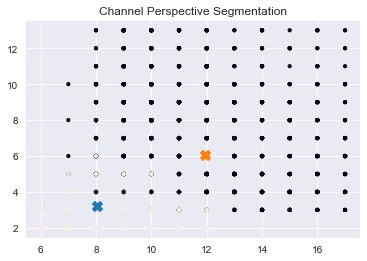

In [155]:
# Save the centroid values concerning the variables Web and Cat.
centroid_0_Web = centroids[0,0]
centroid_1_Web = centroids[1,0]
centroid_0_Cat = centroids[0,2]
centroid_1_Cat = centroids[1,2]

# Plot df_channel_k2['NumWebPurchases'] and df_channel_k2['NumCatalogPurchases']. 
# Define the parameter c=df_channel['label'] to color each cluster and s=10 to define the size of the points.
# Plot the centroids and use 'X' as a mark and s=100 to define the size.
plt.scatter(df_channel_k2.NumWebPurchases, df_channel_k2.NumCatalogPurchases, c=df_channel_k2.label, s=10)
plt.scatter(centroid_0_Web, centroid_0_Cat, marker='X', s=100)
plt.scatter(centroid_1_Web, centroid_1_Cat, marker='X', s=100)

plt.title("Channel Perspective Segmentation")
plt.show()

__Step 6__: Create a dataframe that will be composed by the customers of each cluster, and plot the histograms that will show the distribution of the variable 'NumCatalogPurchases' for each cluster, using `sns.histplot()`.

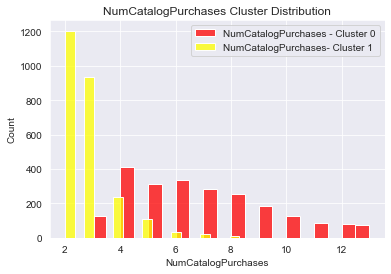

In [147]:
var = 'NumCatalogPurchases'

cluster0 = df_channel_k2[df_channel_k2.label==0]
cluster1 = df_channel_k2[df_channel_k2.label==1]
sns.histplot(cluster0[var],color='red',label= var + ' - Cluster 0', bins = 20)
sns.histplot(cluster1[var],color='yellow',label=var + '- Cluster 1', bins = 20)

plt.legend()
plt.title("NumCatalogPurchases Cluster Distribution")
plt.show()

### 4.3.2. K-Means with three clusters <a class="anchor" id="kmeans5"></a>

__Step 1__: Run the K-means algorithm with K=3.

In [148]:
# Create a 'KMeans' instance called 'model_k3' to find '3' clusters.
# Use the .fit() method to fit the model to the dataframe df_prod.
# Create a new column in the dataframe named label, which will store the cluster number that each observation belongs to.

model_k3 = KMeans(n_clusters = 3, random_state = 100)

df_channel_k3 = df_channels.copy()

model_k3.fit(df_channel_k3)

df_channel_k3['label'] = model_k3.labels_

__Step 2__: Using `.mean()`, obtain the centroid value for each cluster.

In [149]:
df_channel_k3.groupby(['label']).mean().transpose()

label                       0          1          2
NumWebPurchases      8.046339  11.935780  11.650738
NumCatalogPurchases  2.558851   5.629096   7.351868
NumStorePurchases    3.236330   6.048493  10.643788

Standard Deviations in the three variables are not high across clusters, which we can interpret as having achieved a small intra-cluster distance between observations in each cluster.

__Step 3__: Check the distance between the different clusters using `euclidean distances`.

In [150]:
dists = euclidean_distances(model_k3.cluster_centers_)
dists

array([[0.        , 5.70240519, 9.53755178],
       [5.70240519, 0.        , 4.91793148],
       [9.53755178, 4.91793148, 0.        ]])

__Step 4__: Extract the individual values by using the results stored in centroids, and plot the clusters distribution on a scatter plot.

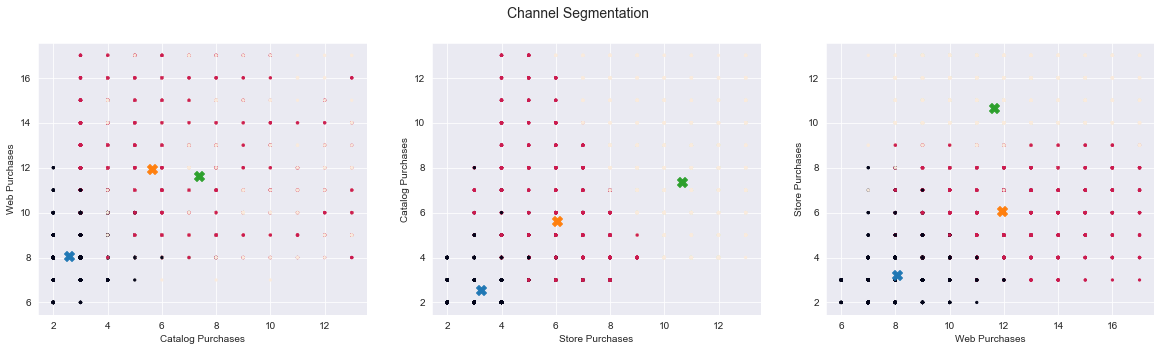

In [157]:
# Save the centroid values concerning the variables NumWebPurchases, NumCatalogPurchases and NumStorePurchases.

cluster0 = df_channel_k3[df_channel_k3.label==0]
cluster1 = df_channel_k3[df_channel_k3.label==1]
cluster2 = df_channel_k3[df_channel_k3.label==2]
centroids = model_k3.cluster_centers_

centroid_0_NumWebPurchases = centroids[0,0]
centroid_1_NumWebPurchases = centroids[1,0]
centroid_2_NumWebPurchases = centroids[2,0]

centroid_0_NumCatalogPurchases = centroids[0,1]
centroid_1_NumCatalogPurchases = centroids[1,1]
centroid_2_NumCatalogPurchases = centroids[2,1]

centroid_0_NumStorePurchases = centroids[0,2]
centroid_1_NumStorePurchases = centroids[1,2]
centroid_2_NumStorePurchases = centroids[2,2]

# Plot df_channel_k3['NumCatalogPurchases'] and df_channel_k3['NumWebPurchases']. 
# Define the parameter c=df_channel['label'] to color each cluster and s=10 to define the size of the points.
# Plot the centroids and use 'X' as a mark and s=100 to define the size.

size = 100
fig, ax = plt.subplots(figsize=(20, 5)) 
fig.suptitle('Channel Segmentation', fontsize=14)
plt.subplot(1,3,1)
plt.scatter(df_channel_k3.NumCatalogPurchases, df_channel_k3.NumWebPurchases, c=df_channel_k3.label, s=5)
plt.scatter(centroid_0_NumCatalogPurchases, centroid_0_NumWebPurchases, marker='X', s=size)
plt.scatter(centroid_1_NumCatalogPurchases, centroid_1_NumWebPurchases, marker='X', s=size)
plt.scatter(centroid_2_NumCatalogPurchases, centroid_2_NumWebPurchases, marker='X', s=size)
plt.xlabel('Catalog Purchases')
plt.ylabel('Web Purchases')

plt.subplot(1,3,2)
plt.scatter(df_channel_k3.NumStorePurchases, df_channel_k3.NumCatalogPurchases,  c=df_channel_k3.label, s=5)
plt.scatter(centroid_0_NumStorePurchases, centroid_0_NumCatalogPurchases, marker='X', s=size)
plt.scatter(centroid_1_NumStorePurchases, centroid_1_NumCatalogPurchases, marker='X', s=size)
plt.scatter(centroid_2_NumStorePurchases, centroid_2_NumCatalogPurchases, marker='X', s=size)
plt.xlabel('Store Purchases')
plt.ylabel('Catalog Purchases')

plt.subplot(1,3,3)
plt.scatter(df_channel_k3.NumWebPurchases, df_channel_k3.NumStorePurchases, c=df_channel_k3.label, s=5)
plt.scatter(centroid_0_NumWebPurchases, centroid_0_NumStorePurchases, marker='X', s=size)
plt.scatter(centroid_1_NumWebPurchases, centroid_1_NumStorePurchases, marker='X', s=size)
plt.scatter(centroid_2_NumWebPurchases, centroid_2_NumStorePurchases, marker='X', s=size)
plt.xlabel('Web Purchases')
plt.ylabel('Store Purchases');

Taking into consideration the above results, It was decided to proceed with 3 clusters for the channel perspective. Although the purchase frequency behaviour can be well described with 2 clusters, 3 clusters give extra insights, like the fact that there are customers who have twice as much frequency for the Web than for the Store channel. 

__Step 5__: Concatenate different perspectives with other dataframe variables. Check the clusters' boxplots.

In [152]:
final_df = pd.concat([df, df_channel_k3['label']], axis=1)

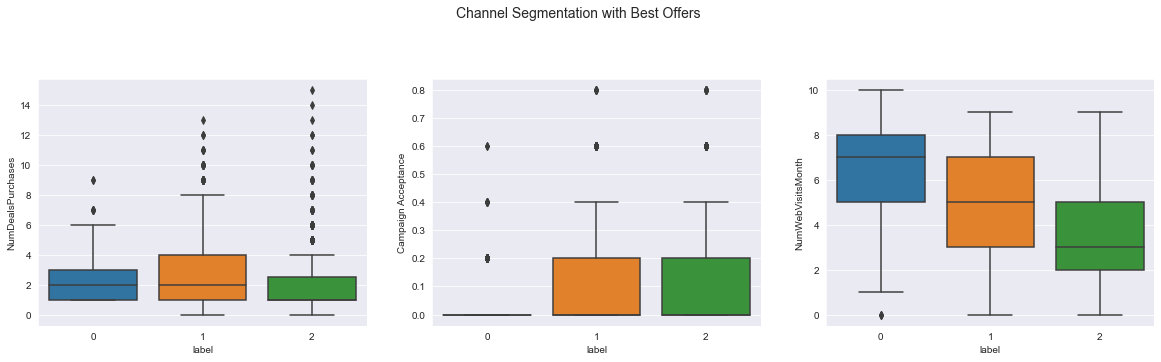

In [161]:
fig, ax = plt.subplots(figsize=(20, 10)) 
fig.suptitle('Channel Segmentation with Best Offers', fontsize=14)

plt.subplot(2,3,1)
sns.boxplot(x='label', y="NumDealsPurchases",data=final_df)

plt.subplot(2,3,2)
sns.boxplot(x='label', y="Campaign Acceptance",data=final_df)

plt.subplot(2,3,3)
sns.boxplot(x='label', y="NumWebVisitsMonth",data=final_df)

plt.show()

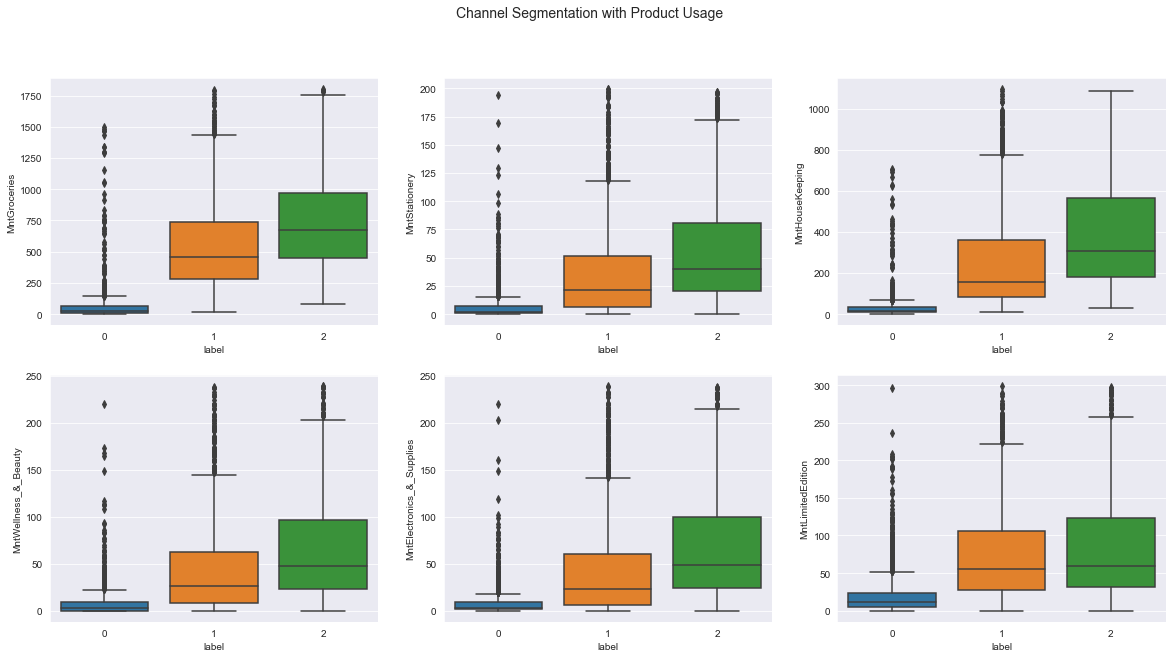

In [160]:
fig, ax = plt.subplots(figsize=(20, 10)) 
fig.suptitle('Channel Segmentation with Product Usage', fontsize=14)

plt.subplot(2,3,1)
sns.boxplot(x='label', y="MntGroceries",data=final_df)

plt.subplot(2,3,2)
sns.boxplot(x='label', y="MntStationery",data=final_df)

plt.subplot(2,3,3)
sns.boxplot(x='label', y="MntHouseKeeping",data=final_df)

plt.subplot(2,3,4)
sns.boxplot(x='label', y="MntWellness_&_Beauty",data=final_df)

plt.subplot(2,3,5)
sns.boxplot(x='label', y="MntElectronics_&_Supplies",data=final_df);

plt.subplot(2,3,6)
sns.boxplot(x='label', y="MntLimitedEdition",data=final_df);

### 4.3.3. Synthesizing results <a class="anchor" id="results3"></a>

Analysing the results for 3 clusters, we can observe the following: 

Cluster 0: 

- Contains 2158 individuals. 
- These are the customers who buy the least from all channels.  
- Nevertheless, this group prefers to use the Web. 
 
Cluster 1  

- Contains 1526 individuals. 
- In this cluster, the customers buy more frequently from the Web and moderately from the Store and the Catalog.  
- The preference for the Web channel is clear here (they buy twice as frequently from the Web than from their second favourite channel - the Store). 

Cluster 2: 

- Contains 1551 individuals 
- These are the customers who buy frequently from the three channels, despite preferring the Store and the Web over the Catalog, having the same purchase frequency for both. 

All customer segments prefer the Web over the other channels to make their purchases. 

From de above results, it is observed that customers are not receptive to campaigns (there are very few who have accepted more than half of them), and 75% of the customers accepted only one campaign. Those who have the least acceptance rate are in Cluster 0, with the overwhelming majority rejecting every single campaign. Clusters 1 and 2 act in a similar fashion, with small acceptance rates. The mean number of DealPurchases across clusters is not different. 

Customers in Cluster 0 are the ones who visit the Web more often, on average. This group, however, is the one who spends the least across all product categories and buys least frequently from all channels. Customers in Clusters 1 and 2 have a similar behaviour in terms of qualitative product preference. However, and this holds for all product categories, customers in Cluster 2 spend more than those in Cluster 1. 

In sum, the group of customers who buy more frequently from the Store and the Web are the big spenders. Interestingly, these are the customers who least visit the Web. In contrast, customers who visit the Web more often are not who buy more frequently from that channel (or any other). In addition, they do not accept campaigns, and they spend the least (by a considerable margin) in all product categories. 

# 5. Marketing Plan <a class="anchor" id="marketingplan"></a>